In [1]:
import en_core_web_sm

nlp = en_core_web_sm.load()
doc = nlp('I have seen the handsome boy with an apple')

for tok in doc:
    print(tok.text, tok.lemma_, tok.pos_, tok.tag_, tok.dep_, tok.shape_,
         tok.is_alpha, tok.is_stop)

I -PRON- PRON PRP nsubj X True True
have have AUX VBP aux xxxx True True
seen see VERB VBN ROOT xxxx True False
the the DET DT det xxx True True
handsome handsome ADJ JJ amod xxxx True False
boy boy NOUN NN dobj xxx True False
with with ADP IN prep xxxx True True
an an DET DT det xx True True
apple apple NOUN NN pobj xxxx True False


In [ ]:
import networkx as nx
g1 = nx.DiGraph() #방향 그래프

g1.add_node('a')
g1.add_node(1)
g1.add_node('b') #방향 그래프에 노드 추가

print('Node : ', g1.nodes())
g1.add_edge(1, 'a')
g1.add_edge(1, 'b')
print('Edge : ', g1.edges())

from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d1 = to_pydot(g1)
d1.set_dpi(400)
d1.set_rankdir('LR')
d1.set_margin(1)
Image(d1.create_png(), width = 300)

In [2]:
import re
import pandas as pd
import bs4
import requests
import spacy
import en_core_web_sm
from spacy import displacy

nlp = en_core_web_sm.load()

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

candidate_sentences = pd.read_csv('wiki2.csv')

def get_entities(sent): #주어와 목적어를 return 
    ent1= ""
    ent2 = ""
    prv_tok_dep = ""
    prv_tok_text = ""
    prefix = ""
    modifier = ""
    print(nlp(sent))
    for tok in nlp(sent): #해당 문장 token화 시킴
        if tok.dep_ != 'punct': #구두점 아닌경우만 진행
            if tok.dep_ == "compound": #해당 토큰이 복합어 일경우
                pretix = tok.text
                if prv_tok_dep == "compound": #전의 토큰도 복합어일경우 합침
                    prefix = prv_tok_text + " " + tok.text
            if tok.dep_.endswith("mod") == True: #해당 토큰이 수식어
                modifier = tok.text
                if prv_tok_dep == "compound":
                    modifier = prv_tok_text + " " + tok.text
            if tok.dep_.find("subj") == True : #해당 토큰이 주어일경우
                ent1 = modifier + " " + prefix + " " + tok.text #수식어 + 접두사 + 내용
                prefix = ""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""
            if tok.dep_.find("obj") == True: #목적어 일경우
                ent2 = modifier + " " + prefix + " " + tok.text #수식어와 현재토큰 결합
            
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
            
    return [ent1.strip(), ent2.strip()]

In [3]:
entity_pairs = []
for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

  0%|          | 11/4318 [00:00<01:26, 49.69it/s]

confused and frustrated, connie decides to leave on her own.
later, a woman’s scream is heard in the distance.
christian is then paralyzed by an elder.
the temple is set on fire.
outside, the cult wails with him.
it's a parable of a woman's religious awakening—
c. mackenzie, and craig vincent joined the cast.
later, craig di francia and action bronson were revealed to have joined the cast.
sebastian maniscalco and paul ben-victor were later revealed as being part of the cast.
we just tried to make the film.
we went through all these tests and things  


  1%|          | 24/4318 [00:00<01:18, 54.66it/s]

m global was also circling to bid for the film's international sales rights.
canadian musician robbie robertson supervised the soundtrack.
it features both original and existing music tracks.
it is the worst reviewed film in the franchise.
but she injures quicksilver and accidentally kills mystique before flying away.
military forces tasked with her arrest.
the train is attacked by vuk and her d'bari forces.
kota eberhardt portrays telepath selene gallio,
singer did not return to direct the sequel, x-men:
the last stand, which was written by penn and simon kinberg.
jessica chastain was also potentially being considered for the same character.
mauro fiore served as cinematographer.
filming was completed on october 14, 2017.


  1%|          | 36/4318 [00:00<01:16, 55.73it/s]

the soundtrack was released digitally on june 7.
the album was released digitally on august 2, 2019.
the film is distributed by walt disney studios motion pictures.
it ended up debuting to just $103.7 million internationally and $136.5 million worldwide.
the film stars kyle chandler, vera farmiga, millie bobby brown, bradley whitford, sally hawkins, charles dance, thomas middleditch, aisha hinds, o'shea jackson jr., david strathairn, ken watanabe, and zhang ziyi.
it is dedicated to executive producer yoshimitsu banno and original godzilla suit
vivienne graham approach former employee dr.
emma frees and awakens monster zero, which kills several monarch members, including dr.
disillusioned, madison disowns her mother.through mythological texts, dr.
joe morton appears as an older dr.
godzilla, rodan, mothra, and king ghidorah were credited as themselves.
when asked about his reaction to being asked to direct, dougherty stated, 'yes.'


  1%|          | 42/4318 [00:00<01:17, 55.31it/s]

we're empathizing with godzilla.
legendary's only mandate was to include monarch, rodan, mothra, and king ghidorah.
ten writers contributed to building on the treatment.
the script took a year to come together.
dougherty also changed, revised, and improved lines during filming and post-production.
due to this, the film became an ensemble piece.
it can't just look like big dinosaurs.
other actors perform the body.
production designer scott chambliss managed all the art directors.
the single was released on may 13, 2019.

all tracks are written by bear mccreary, except where noted.
the score is also conducted by mccreary.



  1%|▏         | 54/4318 [00:00<01:21, 52.55it/s]

on december 10, 2018, the film's first teaser poster and ccxp trailer were released.
in april 2019, the main theatrical poster was released online.
the film was originally scheduled to be released on june 8, 2018.
the collectible tickets were offered in two sizes: standard  and godzilla-sized .
the 4k release includes hdr10, hdr10
the retail exclusives will also include limited special clear files.
such heroes are ready with one-liners, puns, and dry quips.
it was action with a science fiction twist.
currently, action films requiring extensive stunt work and special effects tend to be expensive.
examples include the indiana jones franchise and many superhero films.
themes or elements often prevalent in typical action-horror films


  2%|▏         | 66/4318 [00:01<01:18, 54.08it/s]

paul blart: mall cop is a recent spoof of this trend .
they are usually the films' primary appeal and entertainment value and are often the method of storytelling, character expression, and development.
both had many roles.
the producer also supervises the pre-production, production, and post-production stages of filmmaking.
finally, the producer will oversee the marketing and distribution.
the line producer can be credited as produced by in certain cases.
however, most producers start in a college, university or film school.
some film directors started as screenwriters, cinematographers, producers, film editors or actors.
other film directors have attended a film school.
directors use different approaches.
some directors also take on additional roles, such as producing, writing or editing.
some film schools are equipped with sound stages and post-production facilities.


  2%|▏         | 78/4318 [00:01<01:18, 53.92it/s]

a full degree course can be designed for up to five years of studying.
the german film and television academy berlin consequently cooperates with the berlin/brandenburg tv station rbb  and arte.
la femis in paris, tel aviv university, and vancouver film school.
the national film awards is the most prominent film award ceremonies in india.
the awards were first presented in 1954.
the national film awards are presented in two main categories: feature films and non-feature films.
he returns home and enters sophie's apartment.
a mass riot breaks out in gotham.
arthur is imprisoned at arkham state hospital.
after his film war dogs premiered in august 2016.
we're not even doing joker, but the story of becoming joker.
and then we'd reshoot that three weeks later.


  2%|▏         | 92/4318 [00:01<01:13, 57.60it/s]

that month, dante pereira-olson and douglas hodge joined the cast.
it is scheduled to be released theatrically by warner bros.
it's really been eye-opening for me.
i can't wait to see it.
they did it.
i can't wait to see it.
they did it.
film is a 1965 short film written by samuel beckett, his only screenplay.
a second draft was produced by 22 may and a 40-leaf shooting script followed thereafter.
both beckett and the director alan schneider were interested in zero mostel and jack macgowran.
beckett then suggested buster keaton.
this being his only visit to the united states.
david rayner clark directed max wall.


  2%|▏         | 105/4318 [00:01<01:10, 59.37it/s]

suddenly, the camera  shifts violently to the left.
the couple look at each other and the man
the camera cuts to the vestibule.
the camera gives us a brief close-up.
she descends slowly and with fumbling feet.
she closes her eyes and collapses.
his coat tails are seen flying up the stairs.
although stated simply, the mechanics needed to execute these tasks are laborious .
he ignores them and sits.
he still has the eye patch.
he half starts from the chair, then stiffens.
“esse est percipi aut percipere” .
but he can't get away from himself.


  3%|▎         | 118/4318 [00:02<01:10, 59.77it/s]

but e is also self, not merely o’s self but the self of any person or people,
e is, so to speak, o's blind eye.
beckett's script has been interpreted in various ways.
the viewers are being asked to consider the work structurally and dramatically rather than emotionally or philosophically.
however, for this particular project, beckett became personally involved.
four directors worked on the series: chris columbus, alfonso cuarón, mike newell, and david yates.
he went out and bought the book, becoming an instant fan.
david heyman was confirmed to produce the film.
their only previous acting experience was in school plays.
barron was later appointed producer on the last four films.
other executive producers include tanya seghatchian and lionel wigram.
but he expressed real passion.
all the directors have been supportive of each other.


  3%|▎         | 132/4318 [00:02<01:07, 61.80it/s]

the production designer for all eight films is stuart craig.
the  definitely wasn't there originally, and so we were able to add that substantial piece.
the harry potter series has had four composers.
desplat returned to score harry potter and the deathly hallows
– part 2 in 2011.
they came up trumps.
as the director shouts cut for the very last time.
harry potter is an orphaned boy brought up by his unkind muggle  aunt and uncle.
however, part 2 was released in 2d and 3d cinemas as originally planned.
by january 2017, johns and berg reported to emmerich.
principal photography began on august 1, 2011.
, with david ayer confirmed as director.
affleck as bruce wayne / batman and miller as barry allen


  3%|▎         | 146/4318 [00:02<01:06, 62.39it/s]

justice league was released worldwide on november 17, 2017.
aquaman was announced in october.
pre-production began in august.
the villain mister mind is introduced in a mid-credits scene.
that same month, the sequel was officially announced at san diego comic-con.
pre-production had begun by early december 2017.
that same month, pedro pascal was also cast in a key role.
other filming locations include the warner bros.
wonder woman 1984 is scheduled to be released on june 5, 2020.
the initial script was drafted by berlanti, geoff johns, chris brancato, michael green and marc guggenheim.
dan mazeau was brought on as co-writer.
in march 2018, john francis daley and jonathan goldstein were hired to co-direct.
miller revealed that the plot will involve the speed force multiverse.
pre-production is scheduled to begin by january 2020.


  4%|▎         | 160/4318 [00:02<01:08, 60.91it/s]

the flash is expected to be released sometime in 2021.
through emmerich and producer peter safran, who were receptive.
pre-production is expected to begin in 2020.
aquaman 2 is scheduled to be released on december 16, 2022.
suicide squad occurred shortly after batman v superman.
by january 2017, johns and berg reported to emmerich.
principal photography began on august 1, 2011.
, with david ayer confirmed as director.
affleck as bruce wayne / batman and miller as barry allen
justice league was released worldwide on november 17, 2017.
aquaman was announced in october.
pre-production began in august.
the villain mister mind is introduced in a mid-credits scene.


  4%|▍         | 174/4318 [00:02<01:06, 62.48it/s]

that same month, the sequel was officially announced at san diego comic-con.
pre-production had begun by early december 2017.
that same month, pedro pascal was also cast in a key role.
other filming locations include the warner bros.
wonder woman 1984 is scheduled to be released on june 5, 2020.
the initial script was drafted by berlanti, geoff johns, chris brancato, michael green and marc guggenheim.
dan mazeau was brought on as co-writer.
in march 2018, john francis daley and jonathan goldstein were hired to co-direct.
miller revealed that the plot will involve the speed force multiverse.
pre-production is scheduled to begin by january 2020.
the flash is expected to be released sometime in 2021.
through emmerich and producer peter safran, who were receptive.
pre-production is expected to begin in 2020.


  4%|▍         | 181/4318 [00:03<01:10, 58.92it/s]

aquaman 2 is scheduled to be released on december 16, 2022.
suicide squad occurred shortly after batman v superman.
jim reacts angrily but freddie apologises and the two chat and share a kiss.
they agree and are given a last-minute slot.
may confirmed in april 2011 that the production was moving forward.
whishaw left the project seven months later.
i never ceased to be astonished by this man.
discussions began about replacing him.
fletcher received an executive producer credit.
a vinyl release followed on 8 february 2019.
; with a digital version released 22 january.
instead, it's simply referred to as a life-threatening illness.


  4%|▍         | 194/4318 [00:03<01:11, 57.46it/s]

it is fox's fourth highest-grossing film, and their fifth highest outside of north america.
new markets included france , mexico , germany  and australia .
it is the most successful musical film ever released in south korea.
they jumped to conclusions.
horror may also overlap with the fantasy, supernatural fiction, and thriller genres.
prevalent elements include ghosts, extraterrestrials, vampires, werewolves, demons, satanism, evil clowns, gore, torture, vicious animals, evil witches, monsters, giant monsters, zombies, cannibalism, psychopaths, natural, ecological or man-made disasters, and serial killers.
it is the filmmaker's third film adaptation of the faust legend.
this was the birth of trick films.
trick films were silent films designed to feature innovative special effects.
l'inferno was directed by three artists; francesco bertolini, adolfo padovan, and giuseppe de liguoro.
the series is also a close cousin to the surrealist movement.


  5%|▍         | 206/4318 [00:03<01:14, 55.46it/s]

the film is split into five stories: the apparition, the hand, the black cat , the suicide club  and der spuk .
it is also a leading example of early german expressionism.
f. w. murnau arguably made the first vampire-themed movie, nosferatu .
it was an unauthorized adaptation of bram stoker's gothic horror novel dracula.
this helped popularized the expressionism style in filmmaking.
they would become the leading innovators of the german expressionist movement.
his exaggerated smile was the inspiration for dc comics' the joker. .
the film was poorly received by audiences and critics.
this extraordinarily rich and innovative silent classic  is a dickensian ghost story and a deeply moving morality tale, as well as a showcase for groundbreaking special effects.
it was a sound remake of the studio's earlier film, the cat and the canary from three years ago.
the film was generally well received by critics.


  5%|▌         | 219/4318 [00:03<01:10, 57.93it/s]

frankenstein's assistant accidentally gives the creature a murderer's abnormal brain.
the first one is murders in the rue morgue.
it's a mystery horror story starring boris karloff.
the first one was in july.
it was a murder-mystery film called the secret of the blue room.
it stars both boris karloff and bela lugosi.
it was the first of six movies
universal pictures paired the two iconic actors together.
peter ruric  wrote the screenplay.
the science-fiction/horror film was the first sequel to the 1931 hit frankenstein.
actress elsa lanchester portrayed the monster's bride.
he continued by writing,
these radiation effects also begin to slowly drive him mad.


  5%|▌         | 231/4318 [00:04<01:13, 55.72it/s]

the film was called dracula's daughter and stars gloria holden in the title role.
in the intervening decades, criticism has been deeply divided.
the film was night key, a science fiction crime thriller starring boris karloff.
the phantom creeps was universal pictures' 112th serial and 44th to have sound.
other studios followed universal's lead.
through this way, the audience's fright factor is enhanced.
film director and producer william castle is considered the king of the film gimmick.
the 1950s is also well known for creature feature or giant monster movies.
the fly is a 1958 american science fiction-horror film starring vincent price.
the film has become a cult classic and is often referenced in popular culture.
the phrase twilight zone, is used today to describe surreal experiences.


  6%|▌         | 243/4318 [00:04<01:13, 55.65it/s]

the 1970s was an era dominated by american horror films.
don't look now , a independent british-italian film directed by nicolas roeg, was also notable.
murder and violence were no longer the main themes of horror films.
poltergeist is ranked the 20th scariest movie ever made by the chicago film critics association.
the changeling is a 1980 canadian supernatural psychological horror film directed by peter medak.
its influence and inspiration can still be seen in films today.
my bloody valentine  is a slasher film dealing with valentine's day fiction.
in the philippines, the first shake, rattle & roll  was released.
several science fiction action horror movies were released in the 1980s, notably aliens  and predator .
is a dark fantasy horror film, which is the directorial debut of special effects artist stan winston.
event horizon  is a british-american science fiction horror film directed by paul
monster horror was quite popular in the 1990s.


  6%|▌         | 257/4318 [00:04<01:09, 58.57it/s]

tremors  is
the first installment of the tremors franchise.
by contrast, valentine  was a conventional horror film.
the others  was hugely successful, winning and being further nominated for many awards.
it was written, directed, and scored by alejandro amenábar.
comic book adaptations like the blade series, constantine , and hellboy  also became box office successes.
some pronounced trends have marked horror films.
films from non-english language countries have become successful.
another notable film is the orphanage , a spanish horror film and the debut feature of spanish filmmaker
cold prey is a 2006 norwegian slasher film directed by roar uthaug.
the others  proved to be a successful example of a psychological horror film.
the latter film spawned a sequel: 28 weeks later .
prometheus  and alien: covenant  address extraterrestrial themes.
verónica is a 2017 spanish horror film loosely based on real events.


  6%|▌         | 264/4318 [00:04<01:09, 58.08it/s]

a sequel, happy death day 2u, was released in february 2019.
themes or elements often prevalent in typical action-horror films
this category also fuses the fantasy genre.
holiday horror depicts horror events which are set during a holiday or holiday season.
it is set during christmas, halloween, valentine's day, april fools' day, or thanksgiving.
examples include: silent night, deadly night, black christmas, halloween, my bloody valentine, home sweet home, april fool's day, valentine, trick 'r treat, krampus, and all through the house.
examples include: frankenstein, species, mimic, alien, the fly, the thing, the blob, apollo 18, event horizon, and resident evil.
common themes include vengeful ghosts, witches, the devil, and demonic possession.
examples include: the ring, the grudge, the amityville horror, it, the omen, the exorcist, paranormal activity, poltergeist, the blair witch project, the conjuring, hereditary, sinister, and suspiria.
this genre may sometimes overlap with the sc

  6%|▋         | 277/4318 [00:04<01:11, 56.14it/s]

it was most popular in 1964 and 1965.
examples include unfriended, friend request, and the den.
one of the most noticeable side effects is sleeplessness.
many early horror films created great social and legal controversy.
however, horror movies do not always present positive endings.
also, satirical comedy-drama & the plot is often concerned with an illicit love affair or some other scandal.
others include duck soup  and national lampoon's animal house .
such films are sometimes known as splatstick, a portmanteau of the words splatter and slapstick.
military and service comedies include good morning, vietnam, m*a*s*h, forrest gump, and more.
a film is a thin layer of coating, skin.
today it has become the first international platform for film commerce.
it should be a simple meeting between friends.
the 1968 festival was halted on 19 may.


  7%|▋         | 290/4318 [00:05<01:09, 57.55it/s]

in 2007 thierry frémaux became general delegate.
the festival has become an important showcase for european films.
jill forbes and sarah street argue in european cinema:
however, the curse of the black pearl became both a critical and commercial success.
the second film was also the first disney theatrical feature film with the computer-generated walt disney pictures logo.
village roadshow studios and port douglas were officially confirmed as filming locations.
suddenly, the market became flooded with musicals, revues, and operettas.
many comedies  included their own musical numbers.
however, the sequel grease 2  bombed at the box-office.
chicago was also the first musical since oliver!
original ones included across the universe , moulin rouge! , idlewild  and yesterday .
other animated musical films include rio, trolls, sing, smallfoot and uglydolls.



  7%|▋         | 302/4318 [00:05<01:10, 57.16it/s]

the first indian sound film, ardeshir irani's alam ara , was a major commercial success.
however, colour did not become a popular feature until the late 1950s.
le jayenge , raja hindustani , dil to pagal hai , pyaar to hona
since the 1990s, the three biggest bollywood movie stars have been the three khans: aamir khan, shah rukh khan, and salman khan.
juvenile stars appear and top the box-office.
the american films greatly impacted aleksandrov, particularly the musicals.
the first successful blend of a social message and entertainment was aleksandrov's circus .
another of aleksandrov's more-popular films was the bright path .
the music was limited to orlova's singing.
here, work provided the spectacle.
the other director of musical films was ivan pyryev.
all starred his wife, marina ladynina.
it is the most unusual of its type.


  7%|▋         | 316/4318 [00:05<01:06, 59.93it/s]

short was an abbreviation for either term.
they are usually funded by film grants, nonprofit organizations, sponsor, or personal funds.
it was made for individual viewing only.
griffith's the birth of a nation.
short comedies were especially popular, and typically came in a serial or series .
animated cartoons came principally as short subjects.
short films had become a medium for student, independent and specialty work.
despite being popular, they also declined in this period.
a few animated shorts continue within mainstream commercial distribution.
shortstv was the first television channel dedicated to short films.
such movies can also be distributed via the internet.
it is the second film in the it film series.
juno rinaldi portrays the adult gretta.


  8%|▊         | 330/4318 [00:05<01:04, 62.02it/s]

ideally, we would start prep in march.
part one is only about the kids.
sophia lillis chose jessica chastain and finn wolfhard
the town hall exterior was used as the derry library.
the visual effects were provided by atomic arts and method studios.
all music is composed by benjamin wallfisch.

it chapter two
it is the second film in the it film series.
juno rinaldi portrays the adult gretta.
ideally, we would start prep in march.
part one is only about the kids.
sophia lillis chose jessica chastain and finn wolfhard
the town hall exterior was used as the derry library.
the visual effects were provided by atomic arts and method studios.


  8%|▊         | 344/4318 [00:05<01:04, 61.41it/s]

all music is composed by benjamin wallfisch.

it chapter two
the notion of how long a feature film should be has varied according to time and place.
the first narrative feature film was the 60-minute the story of the kelly gang .
early features were mostly documentary-style films of noteworthy events.
early italian features were the inferno  , quo vadis? , the last days of pompeii , and cabiria .
1913 also saw china's first feature film, zhang shichuan's nan fu
the songs were written by edgar yip harburg  and harold arlen .
the musical score and the incidental music were composed by stothart.
h. cannon had submitted a brief four-page outline.
this part was initially written for betty jaynes.
instead, another contract player, frank morgan, was cast on september 22.


  8%|▊         | 358/4318 [00:06<01:05, 60.06it/s]

gale sondergaard was originally cast as the wicked witch.
filming halted while a replacement for him was found.
all the oz sequences were filmed in three-strip technicolor.
arnold gillespie was the special effects director for the film.
to develop the tornado scene was especially costly.
dorothy's house was recreated by using a small maquete.
the cowardly lion's costume was made from real lion skin and fur.
the film is widely noted for its musical selections and soundtrack.
haley rerecorded ebsen's solo parts later.
some musical pieces filmed were deleted in the editing process.
this was a reprise of ding-dong!
the witch is dead, and a number of smaller dialogue sequences.


  8%|▊         | 365/4318 [00:06<01:06, 59.68it/s]

the film's first sneak preview was held in san bernardino, california.

the film opened nationwide on august 25, 1939.
it was re-released by warner bros.
the restoration job was given to prime focus world.
the film is scheduled to be released on ultra hd
the 2d version still retains its g rating.
not since disney's snow white and the seven dwarfs has anything quite so fantastic succeeded half so well.
film daily wrote: .mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0
roughly 40 identifiable major differences exist between the original book and the mgm interpretation.
it was directed by sam raimi, and starred james franco, mila kunis, rachel weisz and michelle williams.
it was a commercial success and received a mixed critical reception.
adrian, mgm's chief costume designer, was responsible for the final design.


  9%|▊         | 377/4318 [00:06<01:11, 55.13it/s]

the film version was remade in 1982, and there have been other adaptations.
example include police story, the dark knight, baby driver, master, collateral, and heat.
the genre was pioneered by mehboob khan's aurat  and mother india .
other examples include gunga jumna , sholay  and bandit queen .
they may include honor killings, initiations, unprotected sex, fights, word play and punch lines, cryptic storytelling, love scenes and blood feuds.
examples include 12 angry men and a time to kill.
it stars revalina sayuthi temat, reza rahadian, agus kuncoro, endhita, rio dewanto, and hengky sulaeman.
rika is menuk's friend and is involved with the unsuccessful muslim actor surya .
meanwhile, surya and doni  are competing for rika's affections.
the individual characters are based on people bramantyo has known or read about.


  9%|▉         | 389/4318 [00:06<01:10, 55.55it/s]

the film reportedly cost rp 5 billion  to produce.
bramantyo contacted the main cast members directly.
made-for-tv movie musicals have also become popular.
there was no point in making the movie if it wasn't her.
principal photography began on june 13, 2012.
the first trailer was released the following day, on november 13.
the final trailer was released on march 18, 2014.
in north america, maleficent is the eighth-highest-grossing 2014 film.
its largest opening weekends were in china , mexico  and russia and the cis .
the film, however, ended up grossing double the amount projected.
everyone else, even aurora, fades in her presence.
it gives her agency.


  9%|▉         | 402/4318 [00:06<01:09, 56.27it/s]

it gives her power.
we were very conscious, the writer and i, that  was a metaphor for rape.
principal photography concluded on august 24, 2018.

director godfrey reggio edited his films koyaanisqatsi and powaqqatsi based on composer philip glass's music.
the artistic merits of film music are frequently debated.
production music is therefore a very convenient medium for media producers –
apm, the largest us library, has over 250,000 tracks.

will she have the strength to go on?
it is hard to tell where garland stops and zellweger starts... go and see this film.
she deserves every tear.
examples include killers, knight and day, mr. & mrs.
smith, this means war and the bounty hunter.


 10%|▉         | 414/4318 [00:07<01:13, 53.16it/s]

the title is a cynical reference to that image.
unfortunately, the charges brought against mr.
sala  were something we had to seriously factor into that release.
the film was temporarily banned for screening in brazil.
on 5 july 2012, this decision was overturned.
dragan bjelogrlić criticized the film: shallow and plain wrong
that's a metaphor for something unacceptable.
and i will never watch it again.
you don't want to see serbian film.
i would never want on my conscience.
nota is a 2018 indian tamil political thriller film directed by anand shankar.


 10%|▉         | 426/4318 [00:07<01:12, 53.72it/s]

the film was a failure at the box office.
varun subramanyam  is a video game designer living in the uk.
and he being remained as house arrest.
varun then gains the name rowdy
the next day she is found dead, having taken 23 sleeping pills.
the dam opens, thus killing many lives.
vinothan and his friend then have a heated argument.
the emotional drama between the characters is quite weak.
the film was a failure at the box office.

i is a 2015 indian tamil-language film written and directed by s. shankar.
the soundtrack and film score were composed by a. r. rahman.
production design was handled by t. muthuraj.


 10%|█         | 439/4318 [00:07<01:10, 55.26it/s]

principal photography commenced on 15 july 2012.
lingesan  is a bodybuilder from chennai, whose main ambition is to become mr.
he is infatuated with diya , a leading supermodel.
the shoot initially does not go well as lingesan is shy and awkward around diya.
the plan proves successful but diya soon tells lingesan the truth.
hurt, he focouses on modelling instead of her.
lingesan's condition worsens, with his face and body deforming, and eventually he becomes a hunchback.
he is then beaten up by them and tied up, but manages to escape later.  
they decide to live a secluded life together.
additional stunt direction and supervision was done by anl arasu.
additional prosthetic makeup was done by christien tinsley and dominie till.
later, asin's name was suggested along with chopra.


 10%|█         | 451/4318 [00:07<01:07, 57.19it/s]

the film is scheduled to release on 14 january 2015.
she saw, to relive the experience over and over again.
the media rights included satellite rights and ringtones.
in crores final domestic net collections were 136, domestic gross 150 and worldwide 240 crores.
karma  is a 2015 thai horror-drama film directed by kanittha kwanyu.
atlee kumar is an director in tamil film industry..
kumar's next directorial project, theri,  became the second-highest-grossing tamil film of 2016.
atlee kumar is an director in tamil film industry..
kumar's next directorial project, theri,  became the second-highest-grossing tamil film of 2016.
increasingly, film festivals show some films outdoors.
some festivals focus on a specific film-maker or genre  or subject matter .
the most prestigious film festivals in the world are generally considered to be cannes, berlin, and venice.


 11%|█         | 463/4318 [00:08<01:07, 57.09it/s]

the venice film festival is the oldest film festival in the world.
australia's first and longest running film festival is the melbourne international film festival , followed by the sydney film festival .
north america's first and longest running short film festival is the yorkton film festival, established in 1947.
the sundance film festival, tribeca film festival, south by southwest, new york film festival, woodstock film festival, montreal world film festival, and vancouver international film festival are also major north american festivals.
ann arbor film festival started in 1963.
the biggest independent film festival in the uk is raindance film festival.
a few film festivals have focused on highlighting specific issues/ subjects.
these festivals have included both mainstream and independent films.
some examples include health-related film festivals and human rights films festivals.
the regina international film festival and awards  founded by john thimothy,
toronto's hot docs foun

 11%|█         | 469/4318 [00:08<01:08, 55.92it/s]

corto international film festival is the largest competitive film festival in mexico.
it is arguable the most important film festival in chile.
its focus is on latin american cinema.
many film festivals are dedicated exclusively to animation.
notable festivals include the hong kong international film festival , busan international film festival , and kathmandu international mountain film festival.
they are also considered the three most prestigious film festivals in the world.

the franchise also includes short films, a television series, live shows, and theme park attractions.
it is distributed by universal pictures.
two final films are planned, and are set to be released in 2020, and 2021, respectively.
considered a soft reboot as emphasis on car culture was toned down, the fourth movie, fast & furious, was a unilateral commercial success.
additionally, visual effects company weta digital was hired to re-create walker's likeness.
ultimately, the film was delayed, and released in apri

 11%|█         | 481/4318 [00:08<01:10, 54.51it/s]

the cast appear via a pepper's ghost hologram.
additionally, parkour athletes, and stunts requiring both drivers and parkour practitioners, also featured.
the following list is sourced from the tour's website.
the game sold moderately and opened to mixed reviews.
these models were designed by renowned diecast designer eric tscherne.
the franchise also includes short films, a television series, live shows, and theme park attractions.
it is distributed by universal pictures.
two final films are planned, and are set to be released in 2020, and 2021, respectively.
considered a soft reboot as emphasis on car culture was toned down, the fourth movie, fast & furious, was a unilateral commercial success.
additionally, visual effects company weta digital was hired to re-create walker's likeness.
ultimately, the film was delayed, and released in april 2015.
the cast appear via a pepper's ghost hologram.


 11%|█▏        | 494/4318 [00:08<01:06, 57.08it/s]

additionally, parkour athletes, and stunts requiring both drivers and parkour practitioners, also featured.
the following list is sourced from the tour's website.
the game sold moderately and opened to mixed reviews.
these models were designed by renowned diecast designer eric tscherne.
a dual voting system was developed in 1956.
the filmfare awards were first introduced in 1954.
the people’s choice award for best short film was presented to khamakha.
so the ceremony was pushed to the next year.
there were two reasons were given for this change.
the theme that year was a hundred years in the future.
meena kumarimohammed rafiasha bhoslekishore
a dual voting system was developed in 1956.
the filmfare awards were first introduced in 1954.
the people’s choice award for best short film was presented to khamakha.


 12%|█▏        | 508/4318 [00:08<01:02, 60.75it/s]

so the ceremony was pushed to the next year.
there were two reasons were given for this change.
the theme that year was a hundred years in the future.
meena kumarimohammed rafiasha bhoslekishore
the batman series is the fifth-highest-grossing film series in north america.
the film introduced the bat's cave and the grandfather clock entrance.
robert lowery played batman, while johnny duncan played robin.
the film was directed by leslie
in the late 1970s, batman's popularity was waning.
holden died in 1981 and
nine rewrites were performed by nine separate writers.
nicholson's final salary is reported to be as high as $50 million.
rewrites were performed by warren skaaren, charles mckeown and jonathan gems.
filming started at warner bros.


 12%|█▏        | 522/4318 [00:09<01:01, 61.56it/s]

felt the film should have made more money.
arnold schwarzenegger starred as mr.
would then greenlight whichever idea suited them the most.
he approached warner bros.
aronofsky and miller intended to reboot the batman franchise
joss whedon pitched in december 2002, warner bros.
it was also listed at no.
the dark knight rises is intended to complete nolan's batman trilogy.
tom hardy was cast as bane and anne hathaway plays selina kyle.
charles roven is also set to produce the film.
batman's history with killer croc is also briefly referenced.
the film was scheduled to start shooting in early 2019.
the calotype process produced paper negatives.


 12%|█▏        | 536/4318 [00:09<01:03, 59.24it/s]

the first transparent plastic roll film followed in 1889.
it was made from highly flammable nitrocellulose , now usually called nitrate film.
early photographic plates and films were usefully sensitive only to blue, violet and ultraviolet light.
however, all of these were glass-based plate products.
the first practical and commercially successful color film was the lumière autochrome, a glass plate product introduced in 1907.
it was expensive and not sensitive enough for hand-held snapshot use.
the film had some 278 patents.
photographic lenses and equipment are designed around the film to be used.
this was no longer acceptable when using color film.
the filters used were different for the different film types.
some subject matter is tolerant of very heavy exposure.
most automatic cameras instead try to achieve a particular average density.


 13%|█▎        | 548/4318 [00:09<01:04, 58.30it/s]

a fourth naming standard is gost, developed by the russian standards authority.
common film speeds include iso 25, 50, 64, 100, 160, 200, 400, 800, 1600, 3200, and 6400.
instead, expensive lenses made of quartz must be used.
apochromatic lenses are sometimes recommended due to their improved focusing across the spectrum.
9.5mm filmmycro 17.5mm filmkodak
alfred hitchcock's first thriller was his third silent film, the lodger: a story of the london fog , a suspenseful jack the ripper story.
326 —this film would be an inspiration for the future james bond films.
action scenes have also gotten more elaborate in the thriller genre.
such films include silver streak, dr.
such films often focus on the criminal rather than a policeman.
central topics include serial killers/murders, robberies, chases, shootouts, heists, and double-crosses.
the genre was popular during the late 1960s-late 1970s and is still being produced today, albeit less commonly.


 13%|█▎        | 560/4318 [00:09<01:06, 56.70it/s]

examples include the pelican brief, presumed innocent, the jury, the client, the lincoln lawyer, hostile witness, and silent witness.
other examples include, the tall man, dirty pretty things and the constant gardner.
sometimes the protagonist or villain has some psychic ability and superpowers.
examples include the thirteenth floor, i, robot, source code, eagle eye, supernova, hackers, the net, futureworld, existenz, and virtuosity.

the loft is a 2014 erotic thriller film directed by erik van looy.
the surprised chris thanks huggins and leaves.
chris mentions that he heard ann
production wrapped up on july 27, 2011.
the loft received largely negative reviews.
after a brief battle, saruman imprisons gandalf.
bilbo gives frodo his sword, sting.
the fellowship is then ambushed by the uruk-hai.


 13%|█▎        | 573/4318 [00:09<01:07, 55.39it/s]

aragorn arrives and slays lurtz, and watches boromir die peacefully.
gandalf retrieves the defeated saruman's palantír.
gandalf deduces that sauron will attack gondor's capital minas tirith.
gollum attacks frodo, but falls down a chasm.
the fellowship of the ring was released 19 december 2001.
peter jackson's trilogy — or, as we like to call it
jackson has since founded his own film production company, wingnut films, as well as wingnut interactive, a video game company.
jackson has been called a favourite son of new zealand.
on 8 september 2009, the dispute was settled.
numerous video games were released to supplement the film series.
aladdin is a 2019 american musical fantasy film produced by walt disney pictures.


 14%|█▎        | 585/4318 [00:10<01:09, 53.76it/s]

aladdin and jasmine get married and start a new life.
numan acar was set to play hakim.
the prince ali musical sequence features 1000 dancers and extras.
his cgi scenes received better notices, as well.
its biggest international openings were in china , mexico , the united kingdom , italy , and south korea .
but you'd be a heck of a lot more entertained by watching the original film again.
the film was released on july 14, 2000.
the film was released on may 2, 2003.
the film was released on may 26, 2006.
the film was released on may 1, 2009.
the film was released on june 3, 2011.
james mangold was later hired to direct the film.


 14%|█▍        | 597/4318 [00:10<01:07, 54.87it/s]

mark bomback was then hired to rewrite mcquarrie's script.
the film was released on july 26, 2013.
the screenplay was written by kinberg.
in april 2011, visual effects specialist tim miller was hired to direct.
the film was released on february 12, 2016.
the film was released on may 18, 2018.
the x-men are superheroes going on increasingly risky missions.
additional filming occurred in august and september 2018.
the film was released on june 7, 2019.
the records for the first three films have since been surpassed.
morris praised x-men:
the first two films were highly praised due to their cerebral tone.


 14%|█▍        | 609/4318 [00:10<01:06, 56.13it/s]

a month later, zombie officially disbanded white zombie.
his second studio album, the sinister urge , became his second platinum album in the united states.
his third studio album, educated horses , was a departure from his earlier recordings.
he released his fifth studio album venomous rat regeneration vendor the following year .
his live shows have been praised for their elaborate shock rock theatricality.
he is the oldest son of robert and louise cummings.
his younger brother, michael david cummings, is the lead singer of the band powerman 5000.
zombie released the album rob
zombie's second studio album, the sinister urge, was released on november 13, 2001.
the album was preceded by the single feel so numb, with a second single being released the following year.
the film was released theatrically on april 11, 2003.
the album, educated horses, was released on march 28, 2006.


 14%|█▍        | 622/4318 [00:10<01:02, 58.73it/s]

the film went on to become zombie's highest grossing release to date.
ii was released on august 28, 2009.
the series previously appeared in his spookshow international comic book.
hellbilly deluxe 2 was released on february 2, 2010.
the tour officially concluded on december 12, 2012.
we'll stick to the plan.
the album was released on april 23, 2013.
the album has since become zombie's lowest selling album to date.
the album was released on april 29, 2016.
zombie described it as seriously  heaviest
the film has yet to receive a release date.
a style he began while with white zombie.
a month later, zombie officially disbanded white zombie.


 15%|█▍        | 635/4318 [00:11<01:01, 59.43it/s]

his second studio album, the sinister urge , became his second platinum album in the united states.
his third studio album, educated horses , was a departure from his earlier recordings.
he released his fifth studio album venomous rat regeneration vendor the following year .
his live shows have been praised for their elaborate shock rock theatricality.
he is the oldest son of robert and louise cummings.
his younger brother, michael david cummings, is the lead singer of the band powerman 5000.
zombie released the album rob
zombie's second studio album, the sinister urge, was released on november 13, 2001.
the album was preceded by the single feel so numb, with a second single being released the following year.
the film was released theatrically on april 11, 2003.
the album, educated horses, was released on march 28, 2006.
the film went on to become zombie's highest grossing release to date.
ii was released on august 28, 2009.


 15%|█▍        | 642/4318 [00:11<01:01, 60.00it/s]

the series previously appeared in his spookshow international comic book.
hellbilly deluxe 2 was released on february 2, 2010.
the tour officially concluded on december 12, 2012.
we'll stick to the plan.
the album was released on april 23, 2013.
the album has since become zombie's lowest selling album to date.
the album was released on april 29, 2016.
zombie described it as seriously  heaviest
the film has yet to receive a release date.
a style he began while with white zombie.
the parties involved negotiate a deal and sign contracts.
in pre-production, every step of actually creating the film is carefully designed and planned.


 15%|█▌        | 655/4318 [00:11<01:05, 56.26it/s]

actors usually have their own separate call times.
to inform everyone that a take is about to be recorded, and then quiet, everyone!
by the camera operator once the camera is recording.
here the video/film is assembled by the film editor.
any computer-graphic visual effects are digitally added by an artist.
the film is duplicated as required  and distributed to cinemas for exhibition .  
the parties involved negotiate a deal and sign contracts.
in pre-production, every step of actually creating the film is carefully designed and planned.
actors usually have their own separate call times.
to inform everyone that a take is about to be recorded, and then quiet, everyone!
by the camera operator once the camera is recording.
here the video/film is assembled by the film editor.


 15%|█▌        | 667/4318 [00:11<01:05, 55.66it/s]

any computer-graphic visual effects are digitally added by an artist.
the film is duplicated as required  and distributed to cinemas for exhibition .  
the bbfc is also the designated regulator for the forthcoming uk age-verification scheme.
but many local authorities chose to ban the films regardless.
the first 12a certificate awarded was for the bourne identity.
turnover is low and vacancies, when available, appear on its london job vacancies website.
the bbfc has also rated some video games.
the bbfc guidelines are based on public consultations conducted every 4–5 years.
the consultation began in march 2018.
the bbfc currently issues the following certificates.
they may also be seen in specially licensed cinemas.
the first foreign language film honored with such an award was


 16%|█▌        | 680/4318 [00:11<01:03, 57.60it/s]

known as the best foreign language film award, it has been awarded every year since then.
animated and documentary films will also be permitted in this category.
neither film earned a nomination.
only one film is accepted from each country.
three years later, however, another palestinian-arab film, paradise now , succeeded in getting nominated for the foreign language film award.
such films continued to be produced but could only be distributed by underground channels.
pornographic films are typically categorized as either softcore or hardcore pornography.
it contains graphic sexual activity and visible penetration.
two of the earliest pioneers were frenchmen eugène pirou and albert kirchner.
her gyrating and moving pelvis was censored, one of the earliest films to be censored.
however, none of these earliest pornographic films are known to have survived.
entrepreneurs emerged to meet the demand.


 16%|█▌        | 692/4318 [00:12<01:03, 56.85it/s]

to marks, the term glamour was a euphemism for nude modeling/photography.
on the european continent, sex films were more explicit.
debbie does dallas .
nothing can stop this.
it is also followed by dedicated industry publications and trade groups as well as the mainstream press, private organizations , government agencies, and political organizations.
pornographic film studios are also centered in houston, las vegas valley, new york city, phoenix and miami.
traditionally, the audience of pornographic films has been predominantly the straight male.
most actors specialize in certain genres.
they do not normally wear jewellery or glasses.
annie is befriended by a support group member, joan.
but first, you'll scream your bloody head off.
the sundance film festival  is an annual film festival organized by the sundance institute.


 16%|█▋        | 704/4318 [00:12<01:04, 56.39it/s]

the 2019 sundance film festival began january 24 and ran through february 3.
it was founded by sterling van wagenen , john earle .
also that year, the first frank capra award went to jimmy stewart.
first was the involvement of actor and utah resident robert redford, who became the festival's inaugural chair.
the 2013 sundance london festival was held 25–28 april 2013, and sponsored by car-maker jaguar.
the 2018 and 2019 events continued at the same venue.
war is a 2019 indian hindi-language action thriller film directed by siddharth anand.
vaani kapoor was finalised to play  lead role.
oh, who is an outstanding martial arts action choreographer from south korea.
all themes are composed by sanchit balhara.
india today rated it
it is the highest opening day collection for bollywood films released so far.


 17%|█▋        | 717/4318 [00:12<01:02, 57.25it/s]

soon film production companies and studios were established all over the world.
technical improvements added length , synchronized sound recording , color  and 3d .
movies would become the most popular visual art form of the late victorian age.
the technical problems were resolved by 1923.
the film included hand-painted slides as well as other previously used techniques.
the first films made using this device were tipsy, topsy, turvy and the awkward sign painter.
this technique was first used in his 1901 film scrooge, or, marley's ghost.
even more remarkable is james williamson's attack on a china mission station .
by 1900, their films were extended scenes of up to 5 minutes long.
films were increasingly longer, and began to feature proper plots and development.
he starred in over 36 short silent films his first year acting.
jacksonville was especially important to the african american film industry.


 17%|█▋        | 729/4318 [00:12<01:03, 56.35it/s]

a film company with a different approach was film d'art.
this trend was followed in italy, denmark, and sweden.
f. percy smith was an early nature documentary pioneer working for charles urban
by 1912, the danish film companies were multiplying rapidly.
the swedish film industry was smaller and slower to get started than the danish industry.
here, the important man was charles magnusson, a newsreel cameraman for the svenskabiografteatern cinema chain.
the khanzhonkov company quickly became much the largest russian film company, and remained so until 1918.
i was the german branch of the french éclair company, deutsche éclair.
exhibition venues became larger and began charging higher prices.
the biggest success of these years was david
wark griffith's the birth of a nation .
the german film industry was seriously weakened by the war.


 17%|█▋        | 741/4318 [00:12<01:09, 51.81it/s]

this was replaced with floodlights and spotlights.
other shaped slits were used, including vertical and diagonal apertures.
a new idea taken over from still photography was soft focus.
this untitled film was directed by photographer edward raymond turner and his patron frederick marshall lee.
subsequently, in 1916, the technicolor technique arrived .
american propaganda films included desperate journey , mrs.
it is often considered the greatest film of all time.
gimmicks also proliferated to lure in audiences.
disney continued making animated films, notably; cinderella , peter pan , lady and the tramp , and sleeping beauty .


 17%|█▋        | 753/4318 [00:13<01:07, 53.15it/s]

limelight is probably a unique film in at least one interesting respect.
kurosawa films rashomon , ikiru , seven samurai  and throne of blood .
the hidden fortress was also the inspiration behind george lucas' star wars .
no in 1962 would render the series popular worldwide.
bonnie and clyde is often considered the beginning of the so-called new hollywood.
post-classical cinema is the changing methods of storytelling of the new hollywood producers.
his jeet kune do style.
the most popular indian film of all time was sholay ,
the same camera system was used to film spy kids
a silent film is a film with no synchronized recorded sound .
pianists and organists would play either from sheet music, or improvisation.
the term silent film is a retronym—a term created to retroactively distinguish something.


 18%|█▊        | 759/4318 [00:13<01:07, 52.55it/s]

small town and neighborhood movie theatres usually had a pianist.
w. griffith's groundbreaking epic the birth of a nation
much silent film acting is apt to strike modern-day audiences as simplistic or campy.
vaudeville was an especially popular origin for many american silent film actors.
unless carefully shown at their intended speeds silent films can appear unnaturally fast or slow.
— each frame being flashed two or three times on screen.
during the silent era projectors were commonly fitted with 3-bladed shutters.
red represented fire and green represented a mysterious atmosphere.
the early studios were located in the new york city area.
others films were shot in fort lee, new jersey.
the amounts given are gross rentals  as opposed to exhibition gross.
the australian film doctor plonk , was a silent comedy directed by rolf de heer.


 18%|█▊        | 779/4318 [00:13<01:00, 58.62it/s]

stage plays have drawn upon silent film styles and sources.
blancanieves is a 2012 spanish black-and-white silent fantasy drama film written and directed by pablo berger.
right there is a 2013 short film that is an homage to silent film comedies.
the sheep was released to positive reviews and was a box office success.
aardman animations also produced morph and timmy time as well as many other silent short films.
the film was made in the year 1989.
most early forms of motion pictures or film were black and white.
color television became more widespread in the u.s.
colour photography was originally rare and expensive and again often containing inaccurate hues.
color photography became more common from the mid-20th century.
sometimes color is reserved for the cover.
many school yearbooks are still entirely or mostly in black-and-white.
most early forms of motion pictures or film were black and white.


 18%|█▊        | 786/4318 [00:13<00:59, 59.37it/s]

color television became more widespread in the u.s.
colour photography was originally rare and expensive and again often containing inaccurate hues.
color photography became more common from the mid-20th century.
sometimes color is reserved for the cover.
many school yearbooks are still entirely or mostly in black-and-white.
it is the first film in the it film series.
wyatt oleff, jeremy ray taylor, sophia lillis, finn wolfhard, jack dylan grazer, chosen jacobs, nicholas hamilton, owen teague, jackson robert scott, and stephen bogaert are all featured in supporting roles.
it is the highest-grossing horror film of all time.
kajganich also mentioned that warner bros.
and now they're going to fight this evil, scary clown.
: it's all about trying to hit the core and the heart.
i had a different approach.
the kids were really, really creeped out by bill.
it was photographed with arri alexa xt


 19%|█▊        | 800/4318 [00:13<00:55, 63.01it/s]

the look of the lenses is nearly the same.
and he were trying to capture a natural look.
it gives the character a child-like quality.
so i wanted to stray away from it as far as possible.
it was just out of sync.
but the overall response to his face and makeup seemed to be quite positive!on march 9, 2017,
internationally, the film was released on approximately 10,560 screens.
the hollywood reporter reported that warner bros.'
, with brennan feeling skarsgård's performance was career defining, and deserving to be considered for awards season.
wrote: that evil clown pennywise, a spectacularly scary bill skarsgård, is the stuff of nightmares.
ideally, we would start prep in march.
part one is only about the kids.
cinema historians and critics defined the category retrospectively.
the movement's sensibility is mirrored in the warner bros.


 19%|█▉        | 814/4318 [00:14<00:55, 63.30it/s]

the classic film noirs the maltese falcon  and the glass key  
of the others, one was a small-studio release: detour.
it is technically a uk production, financed by 20th century-fox's british subsidiary.
the neo-noir film genre developed mid-way into the cold war.
christopher nolan's black-and-white debut, following , was an overt homage to classic noir.
the television series veronica mars  
the groundstar conspiracy  centers on another implacable investigator and an amnesiac named welles.
film noir has been parodied many times in many manners.
carl reiner's black-and-white dead men don't wear plaid  
noir parodies come in darker tones as well.
belying its parodic strain, the long goodbye's final act is seriously grave.
still others focus on mood and attitude.
no survey of classic noir's identifying characteristics can therefore be considered definitive.


 19%|█▉        | 828/4318 [00:14<00:56, 62.20it/s]

characters' faces may be partially or wholly obscured by darkness
—a relative rarity in conventional hollywood filmmaking.
robert montgomery is seen only in mirrors.
in their different ways, both sunset boulevard and d.o.a.
certain archetypal characters appear in many film noirs—hardboiled detectives, femme fatales, corrupt policemen, jealous husbands, intrepid claims adjusters, and down-and-out writers.
bars, lounges, nightclubs, and gambling dens are frequently the scene of action.
the soundtrack was composed by vidyasagar.
the film was a moderate hit at the box office.
135 camera film always comes perforated with kodak standard perforations.
135 film has been made in several emulsion types and sensitivities .
the perforation size and pitch are according to the standard specification ks-1870.
this is specified as 38.00 mm.
12 exposure rolls have been used widely in the daily press.


 19%|█▉        | 842/4318 [00:14<00:55, 62.84it/s]

24×36 mm exposures seems to be the simplex, introduced in the u.s. in 1914.
the 335 was a daylight loading spool for the 24 × 23 mm stereo format.
the first 35 mm single-lens reflex  was the kine exakta, introduced in 1936.
gods  is a 2014 polish dramatic feature film directed by łukasz palkowski.
afi is supported by private funding and public membership fees.
prior leaders were founding director george stevens, jr.  
the film training program grew into the afi conservatory, an accredited graduate school.
the first class included filmmakers terrence malick, caleb deschanel, and paul schrader.
film producer richard gladstein became dean on july 1, 2017.
the afi catalog, started in 1968, is a web-based filmographic database.
each year the afi awards honor the ten outstanding films  and ten outstanding television programs .
the awards are a non-competitive acknowledgement of excellence.
the american film market  is the market partner of afi fest.
additional sponsors include american airli

 20%|█▉        | 856/4318 [00:14<00:54, 63.48it/s]

afi docs  is a documentary festival in washington, d.c.
the festival attracts over 27,000 documentary enthusiasts.
the afi silver theatre and cultural center is a moving image exhibition, education and cultural center located in silver spring, maryland.
working together, hobbs and deckard defeat brixton, who is remotely terminated afterwards by eteon's director.
the group celebrates their victory.
lori pelenise tuisano portrays sefina hobbs, luke's mother.
lyon beckwith, westley leclay and pingi moli portray luke's cousins.
the character will be physically cast in a future film.
most filming was done at shepperton studios and warner bros.
production officially wrapped on january 27, 2019.
the same method was applied for the mclaren and the brixton bikes.
idris elba was enhanced to gave him super-human abilities.
finally, they handled the samoa chopper destruction.
the latter was cyber scanned by clearangle.


 20%|██        | 870/4318 [00:15<00:53, 64.43it/s]

a second trailer was released on april 18, 2019.
the final trailer was released on june 28, 2019.
reald 3d conversion for the film was originally planned to release but was later cancelled.
working together, hobbs and deckard defeat brixton, who is remotely terminated afterwards by eteon's director.
the group celebrates their victory.
lori pelenise tuisano portrays sefina hobbs, luke's mother.
lyon beckwith, westley leclay and pingi moli portray luke's cousins.
the character will be physically cast in a future film.
most filming was done at shepperton studios and warner bros.
production officially wrapped on january 27, 2019.
the same method was applied for the mclaren and the brixton bikes.
idris elba was enhanced to gave him super-human abilities.
finally, they handled the samoa chopper destruction.
the latter was cyber scanned by clearangle.


 20%|██        | 884/4318 [00:15<00:53, 64.35it/s]

a second trailer was released on april 18, 2019.
the final trailer was released on june 28, 2019.
reald 3d conversion for the film was originally planned to release but was later cancelled.
each film ran as long as there was film in the camera.
by 1900, their films were extended scenes of up to 5 minutes long.
– many directors and editors form a unique artistic bond.
in motion picture terminology, a montage  is a film editing technique.
classic examples include rocky and the karate kid.
there is one other requirement: the two shots must be approximate of the same tone value.
often assistant editors will perform temporary sound, music, and visual effects work.
lower budget features and documentaries will also commonly have only one assistant.
the organizational aspects job could best be compared to database management.


 21%|██        | 898/4318 [00:15<00:54, 63.16it/s]

assistant editing can be seen as a career path to eventually becoming an editor.
the avn awards are film awards sponsored and presented by the american adult video industry trade magazine avn .
they are called the oscars of porn.
the xrco awards are given by the x-rated critics organization annually.
these penny arcade attractions featured topless women, full frontal nudity, and even sexual coupling.
casey donovan starred in the first mainstream pornographic hit,
they are commonly in their 20s or 30s.
the a is the chick on the boxcover.
she has the power.
five directors, five actors, five times five: she gets phone calls.
and she stops getting phone calls.
will you do gangbangs?'
they can't even get a phone call.
so it's girl-girl: $700, plus $100 for an anal toy.


 21%|██        | 912/4318 [00:15<00:53, 63.10it/s]

most actresses in the adult industry are free agents –
they'll shoot for anyone.
most contract girls make $60,000 a year.
the average male makes $40,000 a year.
these claims have been criticized by various public health authorities.
but the breakdown voltage for dielectric films is usually nonlinear.
this can double the peak current rating.
this film can therefore be made of a different and less expensive material.
the highest surge-current rated film capacitors are film/foil capacitors with a metal foil construction.
however, metal foil capacitors do not have self-healing properties.
an early special type of plastic film capacitors were the cellulose acetate film capacitors, also called mku capacitors.
characteristics of mixed film materials are not listed here.
they are manufactured both as metallized wound and stacked versions, as well as film/foil types.


 21%|██▏       | 926/4318 [00:15<00:53, 63.18it/s]

the table is not valid for capacitance values smaller than 50 pf.
they are manufactured both as metallized wound and stacked versions, as well as film/foil types.
they are produced only as metallized types.
they are only produced as metallized types.
the dielectric absorption performance is excellent, behind only ptfe and ps dielectric capacitors.
ptfe is often known by the dupont trademark teflon.
they are manufactured as wound metallized as well as film/foil types.
but as of 2012, no specific pi capacitor series film capacitors have been announced.
the offered film capacitor, kapton capacitorcl11, announced from dhgate is a type: polypropylene film capacitor.
the iec standards are harmonized with european standards en.
many manufacturers continue to use these de facto standard abbreviations.
the required capacitance tolerance is determined by the particular application.
the derating factors apply to both dc and ac voltages.


 22%|██▏       | 933/4318 [00:16<00:55, 61.48it/s]

the allowable peak value of a superimposed alternating voltage, called the rated ripple voltage, is frequency-dependent.
film capacitors are not polarized and are suitable for handling an alternating voltage.
some capacitors are designed to minimise this effect.
if the series-equivalent values of a capacitor 
r
e
s

the dissipation factor of film capacitors is frequency-, temperature- and time-dependent.
film capacitors are subject to certain very small but measurable aging processes.
two main advantages of film capacitors are very low esr and esl values.
snubber capacitors  require a very low self-inductance and very low esr capacitor construction.  
the most important criteria for this application are a low self-inductance, low esr, and very high peak current capability.
the so-called snubber capacitors sometimes have some additional special construction features.
both ac and dc capacitors are available.
surge  discharge capacitors are also capable of supplying or absorbing extreme s

 22%|██▏       | 947/4318 [00:16<00:56, 59.78it/s]

power capacitors can reach quite large physical dimensions.
today, most animations are made with computer-generated imagery .
animation is also prevalent in information technology interfaces.
winsor mccay's little nemo  showcased very detailed drawings.
el apóstol  was a 1917 argentine animated film utilizing cutout animation, and the world's first animated feature film.
terrytoons released tom terrific that same year.
in 2008, the animation market was worth us$68.4 billion.
today, animators' drawings and the backgrounds are either scanned into or drawn directly into a computer system.
3d animation is digitally modeled and manipulated by an animator.
the animator usually starts by creating a 3d polygon mesh to manipulate.
traits common to both live-action and animated feature-length films are labor-intensity and high production costs.
the list of awardees is as follows:



 22%|██▏       | 960/4318 [00:16<00:54, 61.08it/s]

today, most animations are made with computer-generated imagery .
animation is also prevalent in information technology interfaces.
winsor mccay's little nemo  showcased very detailed drawings.
el apóstol  was a 1917 argentine animated film utilizing cutout animation, and the world's first animated feature film.
terrytoons released tom terrific that same year.
in 2008, the animation market was worth us$68.4 billion.
today, animators' drawings and the backgrounds are either scanned into or drawn directly into a computer system.
3d animation is digitally modeled and manipulated by an animator.
the animator usually starts by creating a 3d polygon mesh to manipulate.
traits common to both live-action and animated feature-length films are labor-intensity and high production costs.
the list of awardees is as follows:

the area consists of  jubilee hills, banjara hills, nanakramguda and madhapur.
the closest mmts train station is at hitec city.

with film cameras, a roll is usually completely

 23%|██▎       | 974/4318 [00:16<00:52, 63.11it/s]

there are some areas where film may have some advantages.
film and digital imaging systems have different cost emphases.
digital cameras are significantly more expensive to purchase than film equivalents.
prices are however dropping rapidly due to intense competition.
boris: the film  is a 2011 italian comedy film directed by giacomo ciarrapico, mattia torre and luca vendruscolo.
it is based on the television series boris.

schwarzenegger was later confirmed to be reprising his role.
the film's story was drafted and conceived by miller, cameron, and ellison.
– was hired to write the script.
she worked harder than anybody.
in budapest, special effects supervisor neil corbould created the film's largest set piece:
schwarzenegger completed filming on october 28, 2018.
initially, certain scenes were filmed two different ways: with and without r-rated violence and language.
it was the subject of some misogynistic internet comments.


 23%|██▎       | 988/4318 [00:16<00:51, 64.62it/s]

the film's theatrical and international trailers were released on august 29, 2019.
the game was released on september 6, 2019.
the t-800 model will also be a downloadable playable character in mortal kombat 11.
schwarzenegger was later confirmed to be reprising his role.
the film's story was drafted and conceived by miller, cameron, and ellison.
– was hired to write the script.
she worked harder than anybody.
in budapest, special effects supervisor neil corbould created the film's largest set piece:
schwarzenegger completed filming on october 28, 2018.
initially, certain scenes were filmed two different ways: with and without r-rated violence and language.
it was the subject of some misogynistic internet comments.
the film's theatrical and international trailers were released on august 29, 2019.
the game was released on september 6, 2019.
the t-800 model will also be a downloadable playable character in mortal kombat 11.


 23%|██▎       | 1002/4318 [00:17<00:51, 64.64it/s]

suspense is often maintained as an important plot element.
mystery films mainly focus with solving a crime or a puzzle.
the women in these films are often resourceful individuals, being self-reliant, determined and as often duplicitous.
the earliest mystery films reach back to the silent era.
the film was remade twice more in 1953 and 1971.
two films, now believed lost, were made in 1909 and 1914.
the story was remade again in 1993.
until recently, the only american-made series starred basil rathbone and nigel bruce as holmes and dr.
a few silent charlie chan films, now lost, were produced in the 1920s.
monogram responded by creating their own gentlemanly oriental detective, mr.
the last film was released in 1937.
the canary murder case , starring william powell as vance, has been called the first modern detective film.
bradford , a breezy comedy-mystery that successfully replicated mgm's thin man formula.


 24%|██▎       | 1016/4318 [00:17<00:52, 63.13it/s]

there were also a great many low-budget old dark house mysteries based on a standard formula  that were plot- rather than
this film was filmed entirely from marlowe's viewpoint.
columbia produced a serial, chick carter, detective .
in mysterious intruder , he was a private eye.
his character was killed off and replaced by sanders' real-life brother, tom conway.
this was made into and then there were none , directed by the french exile rené clair.  
this premise has been used countless times, especially in old dark house genre horror films.
kiss kiss bang bang  
are where you find them.
the bride wore black  by françois truffaut.
the film is part homage, part parody of the detective genre.
george peppard is a traditional private detective in p.j. .
robert culp and bill cosby are hard-luck private eyes in the downbeat and violent hickey & boggs .


 24%|██▍       | 1030/4318 [00:17<00:51, 63.49it/s]

the series, philip marlowe: private eye , starred powers boothe as the hard-bitten detective.
films with female detectives have not fared well.
contemporary real-life serial killings have been portrayed in the alphabet killer, ed gein, gacy, ted bundy and dahmer.
main examples include: the morning after , shattered , the long kiss goodnight , memento , the bourne film series , and shutter island .
— in mulholland falls , and l.a.
c. 1948, features an african-american private eye.
ursel is killed and both lena and daniel escape to the west german embassy.
the later two certificate awards were discontinued from 15th national film awards .
award includes 'rajat kamal'  and cash prize.
i can play anything.
western theatre developed and expanded considerably under the romans.
dell'arte was an actor-centred theatre, requiring little scenery and very few props.
the plays utilised stock characters.


 24%|██▍       | 1044/4318 [00:17<00:51, 63.81it/s]

puritans viewed the theatre as immoral.
restoration comedy is notorious for its sexual explicitness.
henry irving  was the most successful of the british actor-managers.
financially, much larger capital was required to operate out of a major city.
formerly, in some societies, only men could become actors.
some like it hot.
most scripts specify some blocking.
actors may have to simulate hand-to-hand  or sword.
much silent film acting is apt to strike modern-day audiences as simplistic or campy.
vaudeville theatre was an especially popular origin for many american silent film actors.
film actors need to learn to find and stay on their mark.
film actors also need to learn how to prepare well and perform well on screen tests.
tv actors need to learn to use lav mics .
the first is known as a series regular


 25%|██▍       | 1058/4318 [00:18<00:51, 63.64it/s]

by the 1940s, it was a leading international popular entertainment.
audio drama, whether newly produced or otr classics, can be found on cds, cassette tapes, podcasts, webcasts and conventional broadcast radio.
i can play anything.
western theatre developed and expanded considerably under the romans.
dell'arte was an actor-centred theatre, requiring little scenery and very few props.
the plays utilised stock characters.
puritans viewed the theatre as immoral.
restoration comedy is notorious for its sexual explicitness.
henry irving  was the most successful of the british actor-managers.
financially, much larger capital was required to operate out of a major city.
formerly, in some societies, only men could become actors.
some like it hot.
most scripts specify some blocking.


 25%|██▍       | 1065/4318 [00:18<00:50, 64.29it/s]

actors may have to simulate hand-to-hand  or sword.
much silent film acting is apt to strike modern-day audiences as simplistic or campy.
vaudeville theatre was an especially popular origin for many american silent film actors.
film actors need to learn to find and stay on their mark.
film actors also need to learn how to prepare well and perform well on screen tests.
tv actors need to learn to use lav mics .
the first is known as a series regular
by the 1940s, it was a leading international popular entertainment.
audio drama, whether newly produced or otr classics, can be found on cds, cassette tapes, podcasts, webcasts and conventional broadcast radio.
sometimes, a copy of a lost film is rediscovered.
in some cases the destruction was proactive.
when in very badly deteriorated condition and improperly stored , nitrate film can spontaneously combust.
a high-profile example is the case of theda bara.


 25%|██▍       | 1079/4318 [00:18<00:53, 60.81it/s]

an improved 35 mm safety film was introduced in 1949.
occasionally, prints of films considered lost have been rediscovered.
the film now has been restored very close to its premiere version.
television material existing on film has sometimes been recovered.
it has since been shown on television.
cm  size, with the most popular film sizes for consumer snapshots being approximately 83 mm
current instant film formats typically have an iso between 100 and 1000.
the process varies according to the film type.
h. land introduced the polaroid-land process.
because of the film density, film speeds were necessarily slow.
it was introduced in 1963.
it was introduced in 1972.
polavision film has been taken off the market.


 25%|██▌       | 1093/4318 [00:18<00:51, 62.44it/s]

it was introduced in 1983.
polaroid no longer produces instant film.
polaroid pif-300 film is essentially rebranded fuji instax mini film.
kodak's original plan was to create packfilm type instant products.
in april 2017 fujifilm announced the instax square 1:1 format and compatible instax sq10 camera.
that formulation has since been supplanted by improved films.
science-fiction mystery drama series lost also features an ensemble cast.
science-fiction mystery drama series lost also features an ensemble cast.
salman khan ; born abdul rashid salim salman khan; 27 december 1965) is an indian film actor, producer, occasional singer and television personality.
khan is the eldest son of screenwriter salim khan and his first wife sushila charak .
he attended st.
xavier's college in mumbai but dropped out.
in 1995 he starred in


 26%|██▌       | 1107/4318 [00:18<00:50, 63.79it/s]

the two played brothers who are reincarnated after being killed by family enemies.
he''s given an intense, unconventional performance.
the film received mixed reviews.
khan's first release of 2010 was anil sharma's film veer.
it was later remade in tamil and telugu.
the film was produced by his brother arbaaz khan.
khan's first release of 2011 was ready.
skbh productions next film will be shikshanachya aaicha gho, a remake directed by mahesh manjrekar.
the first film released under this banner was the canadian film
cabbie became the second highest-grossing film in canada.
in 2008 khan hosted 10 ka dum.
— kuch kar dikhane ka on ndtv
khan also hosted bigg boss 8, bigg boss 9, bigg boss 10 and bigg boss 11.
later akshay kumar replaced khan.


 26%|██▌       | 1121/4318 [00:19<00:50, 62.76it/s]

khan is also the brand ambassador of the detergent brand wheel.
tiger biscuits is the latest endorsement of salman.
he is also the face of ranbaxy
salman has decided to mentor his longtime loyal bodyguard shera's son as well.
the foundation has two focus areas: education and healthcare.
the youngster wished to meet the “bajrangi bhaijaan” star khan.
khan resides in the galaxy apartments, bandra, mumbai.
khan started dating actress katrina kaif.
in august 2013 he was declared india's most searched celebrity online.
the court refused to fast-track the case.
then they got up and spoke about it.
salman khan ; born abdul rashid salim salman khan; 27 december 1965) is an indian film actor, producer, occasional singer and television personality.
khan is the eldest son of screenwriter salim khan and his first wife sushila charak .


 26%|██▋       | 1135/4318 [00:19<00:51, 61.47it/s]

he attended st.
xavier's college in mumbai but dropped out.
in 1995 he starred in
the two played brothers who are reincarnated after being killed by family enemies.
he''s given an intense, unconventional performance.
the film received mixed reviews.
khan's first release of 2010 was anil sharma's film veer.
it was later remade in tamil and telugu.
the film was produced by his brother arbaaz khan.
khan's first release of 2011 was ready.
skbh productions next film will be shikshanachya aaicha gho, a remake directed by mahesh manjrekar.
the first film released under this banner was the canadian film
cabbie became the second highest-grossing film in canada.


 27%|██▋       | 1149/4318 [00:19<00:52, 60.94it/s]

in 2008 khan hosted 10 ka dum.
— kuch kar dikhane ka on ndtv
khan also hosted bigg boss 8, bigg boss 9, bigg boss 10 and bigg boss 11.
later akshay kumar replaced khan.
khan is also the brand ambassador of the detergent brand wheel.
tiger biscuits is the latest endorsement of salman.
he is also the face of ranbaxy
salman has decided to mentor his longtime loyal bodyguard shera's son as well.
the foundation has two focus areas: education and healthcare.
the youngster wished to meet the “bajrangi bhaijaan” star khan.
khan resides in the galaxy apartments, bandra, mumbai.
khan started dating actress katrina kaif.
in august 2013 he was declared india's most searched celebrity online.


 27%|██▋       | 1163/4318 [00:19<00:50, 62.01it/s]

the court refused to fast-track the case.
then they got up and spoke about it.
writer and director joanna hogg and actor tom hiddleston previously worked together on hogg's 2007 film unrelated and her 2010 film archipelago.
mehra composed the music.
baby noor jehan was first time introduced as an actress and singer.

principal photography began in december 2018.
karamveer pleads incessantly & finally, the w ji relents & shows him his call centre where only ladies work.
karamveer is frustrated with such unsolicited requests & offers to quit.
this move backfires as everyone becomes more obsessed with puja.
this move further backfires.
toto gangs up his cronies to trash karamveer .
nushrat bharucha cast opposite him.
principal photography began in december 2018.


 27%|██▋       | 1177/4318 [00:19<00:49, 62.83it/s]

the film was released theatrically on 13 september 2019.
the song dhagala lagali was removed due copyright issue.

gorilla is a 2019 indian tamil-language heist comedy thriller film written and directed by don sandy.
the music was composed by sam c.
r. b. gurudev and editing was done by anthony l. ruben.
c. s. and lyrics were penned by yugabharathi and logan.
tiff cinematheque  and the film reference library  opened in 1990.
in 2009, the umbrella organization tiffg was renamed to tiff.
the five-storey facility contains five cinemas, two gallery spaces, film archives and an extensive reference library, study spaces, film lab facility, and a research centre.
the films selected are announced in december each year.
the festival's major prize, the people's choice award, is given to a feature-length film.
people's choice awards are also presented for documentary and midnight madness films.
it was later rewritten with a different angle and tone.


 28%|██▊       | 1191/4318 [00:20<00:48, 64.95it/s]

during production, the film was first titled talli and
pk was released on 19 december 2014.
criticism was focused on the anti-hindu sentiment.
he manages to get the thief's cassette recorder.
jaggu returns to india and becomes a tv reporter.
his people know nothing about dressing, religion, or verbal communication.
the alien leaves for delhi.
tapasvi is forced to return pk's remote.
eventually, they decided to scrap the film, then
the second motion poster was released on 20 august 2014.
the third motion poster was released on 15 september 2014.
the teaser was attached with the film happy new year.
my character speaks bhojpuri in the film.
he enjoyed a mitha banarasi paan there.


 28%|██▊       | 1198/4318 [00:20<00:48, 64.62it/s]

the game was developed for both feature phones and smartphones.
it was launched on google play, ios app store and windows platform.
pk was earlier scheduled to release on 6 june 2014.
the director , rajkumar hirani, wanted to spend more time editing.
besides, some portions with sanjay dutt were yet to be shot.
hence the makers settled for a december release.
pk was initially released in 4844 screens worldwide.
pk has been made tax-free in uttar pradesh and bihar.
the music rights were sold for ₹150 million .
dna reported, being the first film to use rentrak
the full soundtrack was released on 17 november 2014.
the song tharki chokro is the first single, released on 8 november 2014.
rajkumar hirani is without a doubt their most worthy standard-bearer.
it became the highest-grossing indian film, in both domestic as well as international markets.


 28%|██▊       | 1212/4318 [00:20<00:49, 63.32it/s]

it was the 71st highest-grossing film of 2014.
pk was the first indian film to gross more than ₹7 billion and us$100 million worldwide.
the film is narrated by chiranjeevi.
the film's soundtrack and background score were composed by ilaiyaraaja.
rudrama is then brought up and trained in prince’s manner.
they also repel and defeat the devagiri empire.
later, allu arjun was eventually selected to do the role.
neeta lulla designed the costumes.
the film's official trailer was released in march 2015.
the worldwide gross was ₹86.92 crore  in 35 days.
soundtrack for the tamil and malayalam version were released later.
aadujeevitham is an upcoming indian malayalam-language survival drama film written and directed by blessy.
mohanan, while the original score and soundtrack are composed by a. r. rahman.


 28%|██▊       | 1226/4318 [00:20<00:49, 62.47it/s]

the film score and soundtrack are composed by maestro a. r. rahman.

sonoko, a bored married woman, falls for a fellow art student, the young and beautiful mitsuko.
the relationship develops and starts to affect and involve their partners.

transparency  is a 2010 action film written and directed by raul inglis.

the camera rig was a product of the film's producer, harry k. fairall, and cinematographer robert f. elder.
the first film, audioscopiks, premiered january 11, 1936, and the new audioscopiks premiered january 15, 1938.
however, even the lippert shorts were available in the dual-strip format alternatively.
james mage was also an early pioneer in the 3d craze.
five shorts that he himself produced.
the project was to be called the 3-d follies and was to be distributed by rko.
one film of notoriety was the beaver-champion/warner bros.
it was later released in 70 mm 3d.
the experience which included two films.


 29%|██▊       | 1240/4318 [00:20<00:48, 64.05it/s]

the butler's in love,
the expo was held at grauman's egyptian theatre.
also shown were the long-lost shorts carmenesque and a day in the country  and william van doren kelley's two plasticon shorts .
but this is problematic in many ways.
the only real option is to invest in new stereoscopic cameras.
it was an improvement to the existing 3d camera system.
while digital cinema cameras are not a requirement for 3d
although several films used 3d backgrounds.
one exception is starchaser: the legend of orin.
in 2004 the polar express was the first stereoscopic 3d computer-animated feature film.
the 3d version was solely release in imax theaters.
no other animation films have released solely in 3d since.
for all other 2d films, different techniques must be employed.
this can lead to strange visual effects.


 29%|██▉       | 1254/4318 [00:21<00:47, 64.55it/s]

3d films were sometimes converted to anaglyph for special presentations.
polarized stereoscopic pictures have been around since 1936, when edwin
linear polarization was likewise used with consumer level stereo projectors.
as a result, the screen image is darker.
this is the method used by nvidia, xpand 3d, and earlier imax systems.
omega optical's 3d system contains projection filters and 3d glasses.
the omega's red/cyan anaglyph glasses use complex metal oxide thin film coatings and high quality annealed glass optics.
each rod or cone can act as a passive lidar .
versions of these 2-d glasses are being marketed.
the 2d brightness cinema standard is 14 foot-lamberts , as set by the smpte standard 196m.
it is the fourth installment in the dc extended universe .
while the two battle, steve's team destroys maru's laboratory.
she can lose her confidence.


 29%|██▉       | 1268/4318 [00:21<00:55, 55.13it/s]

she can have confidence.
she has a human heart.

was it difficult to not get to choose your own wonder woman?
very different to the experienced, super-confident, grown-up woman you've seen.
gadot signed a three-picture deal.
he signed a multi-picture deal.
it was the second-best third weekend ever for warner bros.
it is the second highest-rated superhero film on the site.
jenkins and her design team make 1918-era london;
gas was intended to win the war.


 30%|██▉       | 1274/4318 [00:21<00:56, 53.77it/s]

said david hambling in popular mechanics.
she has no gender boundaries.
to her, everyone is equal.
reaction to this debate was mixed.
it's up to ripley to win the day.
others were more critical of cameron's critique.
there's a female hero whose motivations aren't centered around motherhood.
it's not even enough to create a strong female character ...
you cannot speak for them.
robert pattinson vs. cam gigandet – twilight
2010:


 30%|██▉       | 1280/4318 [00:21<01:02, 48.35it/s]

beyoncé knowles vs. ali larter – obsessed
2011:
the hobbit: the desolation of smaug
2015: dylan o'brien vs. will poulter –
it is the first blockbuster film to feature lgbtq and autistic superheroes.
once there, jason leaves to explore and runs into kimberly.
in doing so, they unlock the morphing grid.
rita merges with goldar.
ashley miller and zack stentz were hired to write the film's script.
brian tyler was brought on to compose the film's music.


 30%|██▉       | 1292/4318 [00:21<01:06, 45.53it/s]

newcomers dacre montgomery, ludi lin and rj cyler were then cast as jason, zack, and billy, respectively.
on may 28, 2016, filming was complete.
additional filming occurred in october 2016.
all music is composed by brian tyler.

an international trailer was released on december 22, 2016.
they can just watch ant-man or the pg-13 suicide squad.
the franchise remains as strong and enthusiastic about its future as ever.
the festival continues to be one of the world's most popular and fastest-growing.
the french film à nous la liberté was voted the film più divertente .
five films received honorable mentions.
additionally, the festival was renamed the italian-german film festival  in 1940.


 30%|███       | 1302/4318 [00:22<01:05, 46.17it/s]

le grandi medaglie d’oro dell’associazione nazionale fascista dello spettacolo in italian.
this was awarded to best actor and best actress.
it is based on the 1921 novel
we by the russian writer yevgeny zamyatin.
thomas newman provided the film's score.
the film has been interpreted as being grounded in christian mysticism.
the warden has also been compared to former united states president richard nixon.
smith goes to washington  
director and castle rock co-founder rob reiner also liked the script.
freeman sometimes simply refused to do the additional takes.


 30%|███       | 1312/4318 [00:22<01:11, 42.30it/s]

scenes were also filmed in mansfield, as well as neighboring ashland, ohio.
the film's score was composed by thomas newman.
the shawshank redemption opened to generally positive reviews.
it did not win in any category.
darabont later adapted and directed two other king stories, the green mile  and the mist .
the 25th anniversary was similarly celebrated in august 2019.
guests included darabont, blaine, mann, gunton, alfonso freeman, bellows, rolston, claire slemmer, and frank medrano.
100 cheers  list charting inspiring films.
thomas newman provided the film's score.


 31%|███       | 1325/4318 [00:22<01:00, 49.65it/s]

the film has been interpreted as being grounded in christian mysticism.
the warden has also been compared to former united states president richard nixon.
smith goes to washington  
director and castle rock co-founder rob reiner also liked the script.
freeman sometimes simply refused to do the additional takes.
scenes were also filmed in mansfield, as well as neighboring ashland, ohio.
the film's score was composed by thomas newman.
the shawshank redemption opened to generally positive reviews.
it did not win in any category.
darabont later adapted and directed two other king stories, the green mile  and the mist .
the 25th anniversary was similarly celebrated in august 2019.
guests included darabont, blaine, mann, gunton, alfonso freeman, bellows, rolston, claire slemmer, and frank medrano.
100 cheers  list charting inspiring films.


 31%|███       | 1337/4318 [00:22<00:55, 53.83it/s]

the film is titled after john's 1972 song rocket man.
principal photography began in august 2018 and was completed later that year.
he is approached by john reid, a music manager.
he falls out with his mother and bernie .
however, the project languished for nearly two decades.
lee hall was set to pen the screenplay.
filming was initially planned to start in autumn 2014.
production began on 2 august 2018.
the film was banned from being shown in samoa, a conservative christian nation.
he  went through a difficult family life and managed to move on and become very successful.
sex is like a danger zone.
rrr is an upcoming 2020 indian telugu-language period action film written and directed by s.


 31%|███       | 1349/4318 [00:23<00:54, 54.22it/s]

the film is scheduled to release on 30 july 2020.

red is drawn away by pluto's cries, allowing adelaide to break free.
meanwhile, the tyler family is murdered by their tethered.
you can never forget that.
we need to fight for the less fortunate.

the official trailer was released on december 25, 2018.
the 4k release is an upscale from the 2k master.

blackhat is a 2015 american action techno-thriller film produced and directed by michael mann.
the film stars chris hemsworth, tang wei, viola davis, holt mccallany, and wang leehom.
hathaway's hack into the nsa does not go unnoticed and
lien and hathaway barely escape into the subway.


 32%|███▏      | 1362/4318 [00:23<00:52, 56.21it/s]

but they bring their henchmen.
the film would be mann's first feature to be shot entirely using digital cameras.
although collateral, miami vice and public enemies were predominantly digital features, mann employed 35mm sparingly.
mike dean also contributed additional music.
deadline credited lee
it premiered on fx on may 9, 2017.
currently, the cut can be seen on tnt.
sigma films  is a film production company based in glasgow, scotland.
red road played in the palme
gillian and david's second feature film collaboration was hallam foe , starring jamie bell and sophia myles.
the film stars aneurin barnard and james cosmo
the show stars logan marshall-green and killian scott.
i love luci .


 32%|███▏      | 1374/4318 [00:23<00:52, 56.10it/s]

transformers is a 2007 american science fiction action film based on the transformers toy line.
don murphy was planning a g.i.
prime directive was used as a fake working title.
this was also the name of dreamwave productions' first transformers comic book.
each rendered piece had to look like real metal, shiny or dull.
photographs were taken of each set.
the allspark also has its own theme.
hans zimmer, jablonsky's mentor, also helped to compose the score.
the second film, revenge of the fallen was released june 24, 2009.
the third film, dark of the moon was released june 29, 2011.
all have received negative critical reviews but were still box office successes.


 32%|███▏      | 1386/4318 [00:23<00:52, 55.86it/s]

it is currently the highest-rated film in the transformers series.

pictures, it is the sixth film in the dc extended universe .
the main cast was confirmed through 2016 and early 2017.
filming concluded the following october.
he swears allegiance to orm's cause. 
orm gains the upper hand and nearly kills
arthur before mera rescues him.
temuera morrison appears as tom curry, arthur's father.
, with robert ben garant writing the screenplay.
in april 2018, randall park was cast as dr.
two-time academy award winner charles gibson  and kelvin mcilwain  served as overall visual effects supervisors.
ilm was the lead vfx vendor and worked on creating atlantis and all its cg animals, the karathen and the final battle.


 32%|███▏      | 1399/4318 [00:23<00:51, 57.21it/s]

the underwater ships were modeled off organic creatures and designed to move that way.
ilm delivered 670 shots.
they worked on creating the dead king's island environment.
the dinosaurs were animated using keyframe animation.
digital domain delivered 19-20 shots.
scanline vfx delivered 450 shots.
bryan hirota served as vfx supervisor.
additional house and dock sets were built on sound stages.
and it really is a classic story of sibling rivalry.
the same month, character posters were released for aquaman, mera, black manta, ocean master, king nereus, queen atlanna and nuidis vulko.
in the philippines, aquaman is the biggest warner bros.
wrote aquaman is all about spectacle.
it's filled with ambition.


 33%|███▎      | 1413/4318 [00:24<00:49, 59.24it/s]

in december 2018, it was reported that warner bros.
entertainment chairman toby emmerich
had the studio start developing a sequel.
announced that a horror-tinged spin-off called the trench was in development.
it is also the last remaining open newsreel cinema operating in the united kingdom.
he was also influenced by films:
the duellists had limited commercial impact internationally.
the 2002 director's cut restored goldsmith's original score.
his next project, independently-funded historical epic 1492: conquest of paradise, was a box office failure.
jane, have been produced under the scott free banner.
scott's historical drama gladiator  proved to be one of his biggest critical and commercial successes.
the film was commercially successful despite receiving mixed reviews.
the film was released on 10 november 2006.


 33%|███▎      | 1426/4318 [00:24<00:48, 60.09it/s]

the sequel, blade runner 2049, was released on 6 october 2017.
kevin spacey originally portrayed getty sr.
i think there's all kinds of questions raised...
in which case, who is behind it?
it is also the last remaining open newsreel cinema operating in the united kingdom.
he was also influenced by films:
the duellists had limited commercial impact internationally.
the 2002 director's cut restored goldsmith's original score.
his next project, independently-funded historical epic 1492: conquest of paradise, was a box office failure.
jane, have been produced under the scott free banner.
scott's historical drama gladiator  proved to be one of his biggest critical and commercial successes.
the film was commercially successful despite receiving mixed reviews.
the film was released on 10 november 2006.


 33%|███▎      | 1433/4318 [00:24<00:48, 58.92it/s]

the sequel, blade runner 2049, was released on 6 october 2017.
kevin spacey originally portrayed getty sr.
i think there's all kinds of questions raised...
in which case, who is behind it?
the biographical sports-drama is produced by bhushan kumar, krishan kumar, raaj hiremath, savita
this is akash, rinku, and nagraj's second collaboration after their 2016 marathi film sairat.
the film was wrapped up on 31 august 2019.
release date has been postponed to 13 december 2019 , though still not official. 

soundtrack was composed by jerome pushparaj.

regular contributors included film critics catherine bray, chris hewitt, and antonia quirke.
the industry is segmented by language.
the south indian film industry encompasses five film cultures: tamil, malayalam,
telugu, kannada and tulu.


 33%|███▎      | 1446/4318 [00:24<00:49, 58.15it/s]

raghupathi venkaiah naidu was an indian artist and a film pioneer.
global audiences and markets soon became aware of india's film industry.
tollygunge was then the centre of the indian film industry.
the 1940 film, vishwa mohini, is the first indian film to depict the indian movie world.
the film was directed by y.
the movement emphasized social realism.
another hussain/salim-javed concoction, yaadon ki baarat , was identified as the first masala film and the first quintessentially bollywood film.
india , qayamat se qayamat tak ,  chaalbaaz , maine pyar kiya , lamhe , saajan , khuda gawah ,  khalnayak , darr , hum aapke hain koun..
since the 1990s, the three biggest bollywood movie stars have been the three khans: aamir khan, shah rukh khan, and salman khan.
combined, they starred in the top ten highest-grossing bollywood films.
other hindi stars include anil kapoor, madhuri dixit and kajol.
acclaimed malayalam filmmakers industry, included adoor gopalakrishnan,


 34%|███▍      | 1459/4318 [00:24<00:48, 59.47it/s]

t. v. chandran and shaji n. karun.
tamil language films appeared at multiple film festivals.
kannathil muthamittal , veyyil  and paruthiveeran , kanchivaram  premiered at the toronto international film festival.
nayakan  was included in time magazine's all-time 100 best movies list.
indian films frequently appeared in international fora and film festivals.
indian cinema has been recognised repeatedly at the academy awards.
ray's films include the apu trilogy.
this was done in the 1930s.
a typical film may feature 5–6 choreographed songs.
location shooting is often motivated by budget considerations.
the most popular locations are the main cities for each regional industry.
avm productions is the oldest surviving studio in india.
the 21st century has produced bollywood-style assamese movies.
bengal has produced science fiction and issue films.


 34%|███▍      | 1473/4318 [00:25<00:46, 61.51it/s]

other bengali art film directors include mir shaani, buddhadeb dasgupta, gautam ghose, sandip ray and aparna sen.
bhojpuri film history begins with ganga maiyya tohe piyari chadhaibo .
throughout the following decades, few films were produced.
many film directors, producers and actors associated with silent films were gujarati and parsi.
they were mostly located in mumbai.
at least forty-four major gujarati directors worked during this period.
art film directors include kaul, kumar shahani, ketan mehta, govind nihalani, shyam benegal, mira nair, nagesh kukunoor, sudhir mishra and nandita das.
kannada actor rajkumar began working with veeranna and later became an important actor.
he then produced subhadra and jeevana nataka .
veeranna was the lead, accompanied by his wife, jayamma.
rajkumar was the legendary actor along with vishnuvardhan, ambarish, anant nag, shankar nag, prabhakar, udaya kumar, kalyan kumar, gangadhar, ravichandran, shivarajkumar, shashikumar, ramesh arvind, devaraj, 

 34%|███▍      | 1486/4318 [00:25<00:52, 53.68it/s]

other noted film personalities in kannada are, bhargava, g.k.
, m. ranga rao and yogaraj bhat.
kannada cinema contributed to indian parallel cinema.
udbhava, tabarana kathe, vamshavruksha, kaadu kudure, hamsageethe, bhootayyana maga ayyu, accident, maanasa sarovara, bara, chitegoo chinte, galige, ijjodu, kanneshwara rama,ghatashraddha, tabarana kathe, mane, kraurya, thaayi saheba, bandhana, muthina haara, banker margayya, dweepa, munnudi, bettada jeeva, mysore mallige and chinnari muththa.
konkani language films are mainly produced in goa.
the film's release date, 24 april, is celebrated as konkani film day.
the malayalam film industry, india's fourth largest, is based in kochi.
filmmakers include gopalakrishnan, karun, aravindan, k.
g. george, padmarajan, sathyan anthikad, chandran and bharathan.
this movie is credited as the first indian social drama feature film.


 35%|███▍      | 1498/4318 [00:25<00:52, 53.95it/s]

daniel is considered the father of the malayalam film industry.
g. george, sathyan anthikad, priyadarshan,
meitei cinema started in the 1980s.
maipak, son of manipur  was the first meitei documentary film.
nagpur  which was produced and directed by dhananjay nath tiwari.
the odia language film industry operates in bhubaneswar and cuttack.
the first odia talkie sita bibaha  came from mohan sunder deb goswami.
mehra made the first punjabi film, sheela ).
manny parmar made the first 3d punjabi film, pehchaan 3d .
the first south indian talkie film kalidas  was shot in tamil and telugu.
avm studios is the oldest surviving studio in india.
kamal haasan debuted in 1960


 35%|███▌      | 1512/4318 [00:25<00:46, 59.89it/s]

the prasad imax in hyderabad is the world's largest 3d imax screen and is the world's most viewed screen.
chittor v. nagaiah was the first multilingual indian film actor, thespian, composer, director, producer, writer and playback singer.
he became known as india's paul muni.
b. narsing rao,
30 to 40 films are made annually in tulu.
n. tailor and machchendra nath pandeshwar are tulu icons.  
enna thangadi, was the first, released in 1971.
oriyardori asal, released in 2011, is the most successful.
some of the prominent ones include:

the industry is segmented by language.
the south indian film industry encompasses five film cultures: tamil, malayalam,
telugu, kannada and tulu.
raghupathi venkaiah naidu was an indian artist and a film pioneer.
global audiences and markets soon became aware of india's film industry.
tollygunge was then the centre of the indian film industry.


 35%|███▌      | 1519/4318 [00:26<00:47, 58.53it/s]

the 1940 film, vishwa mohini, is the first indian film to depict the indian movie world.
the film was directed by y.
the movement emphasized social realism.
another hussain/salim-javed concoction, yaadon ki baarat , was identified as the first masala film and the first quintessentially bollywood film.
india , qayamat se qayamat tak ,  chaalbaaz , maine pyar kiya , lamhe , saajan , khuda gawah ,  khalnayak , darr , hum aapke hain koun..
since the 1990s, the three biggest bollywood movie stars have been the three khans: aamir khan, shah rukh khan, and salman khan.
combined, they starred in the top ten highest-grossing bollywood films.
other hindi stars include anil kapoor, madhuri dixit and kajol.
acclaimed malayalam filmmakers industry, included adoor gopalakrishnan,
t. v. chandran and shaji n. karun.
tamil language films appeared at multiple film festivals.
kannathil muthamittal , veyyil  and paruthiveeran , kanchivaram  premiered at the toronto international film festival.


 36%|███▌      | 1533/4318 [00:26<00:45, 60.71it/s]

nayakan  was included in time magazine's all-time 100 best movies list.
indian films frequently appeared in international fora and film festivals.
indian cinema has been recognised repeatedly at the academy awards.
ray's films include the apu trilogy.
this was done in the 1930s.
a typical film may feature 5–6 choreographed songs.
location shooting is often motivated by budget considerations.
the most popular locations are the main cities for each regional industry.
avm productions is the oldest surviving studio in india.
the 21st century has produced bollywood-style assamese movies.
bengal has produced science fiction and issue films.
other bengali art film directors include mir shaani, buddhadeb dasgupta, gautam ghose, sandip ray and aparna sen.


 36%|███▌      | 1547/4318 [00:26<00:47, 58.92it/s]

bhojpuri film history begins with ganga maiyya tohe piyari chadhaibo .
throughout the following decades, few films were produced.
many film directors, producers and actors associated with silent films were gujarati and parsi.
they were mostly located in mumbai.
at least forty-four major gujarati directors worked during this period.
art film directors include kaul, kumar shahani, ketan mehta, govind nihalani, shyam benegal, mira nair, nagesh kukunoor, sudhir mishra and nandita das.
kannada actor rajkumar began working with veeranna and later became an important actor.
he then produced subhadra and jeevana nataka .
veeranna was the lead, accompanied by his wife, jayamma.
rajkumar was the legendary actor along with vishnuvardhan, ambarish, anant nag, shankar nag, prabhakar, udaya kumar, kalyan kumar, gangadhar, ravichandran, shivarajkumar, shashikumar, ramesh arvind, devaraj, jaggesh, saikumar, vinodraj, charanraj, ramkumar, sudeep, darshan, puneeth rajkumar, yash, leelavathi, kalpana, bh

 36%|███▌      | 1561/4318 [00:26<00:44, 61.33it/s]

kannada cinema contributed to indian parallel cinema.
udbhava, tabarana kathe, vamshavruksha, kaadu kudure, hamsageethe, bhootayyana maga ayyu, accident, maanasa sarovara, bara, chitegoo chinte, galige, ijjodu, kanneshwara rama,ghatashraddha, tabarana kathe, mane, kraurya, thaayi saheba, bandhana, muthina haara, banker margayya, dweepa, munnudi, bettada jeeva, mysore mallige and chinnari muththa.
konkani language films are mainly produced in goa.
the film's release date, 24 april, is celebrated as konkani film day.
the malayalam film industry, india's fourth largest, is based in kochi.
filmmakers include gopalakrishnan, karun, aravindan, k.
g. george, padmarajan, sathyan anthikad, chandran and bharathan.
this movie is credited as the first indian social drama feature film.
daniel is considered the father of the malayalam film industry.
g. george, sathyan anthikad, priyadarshan,
meitei cinema started in the 1980s.
maipak, son of manipur  was the first meitei documentary film.
nagpur  wh

 36%|███▋      | 1575/4318 [00:26<00:44, 61.04it/s]

the odia language film industry operates in bhubaneswar and cuttack.
the first odia talkie sita bibaha  came from mohan sunder deb goswami.
mehra made the first punjabi film, sheela ).
manny parmar made the first 3d punjabi film, pehchaan 3d .
the first south indian talkie film kalidas  was shot in tamil and telugu.
avm studios is the oldest surviving studio in india.
kamal haasan debuted in 1960
the prasad imax in hyderabad is the world's largest 3d imax screen and is the world's most viewed screen.
chittor v. nagaiah was the first multilingual indian film actor, thespian, composer, director, producer, writer and playback singer.
he became known as india's paul muni.
b. narsing rao,
30 to 40 films are made annually in tulu.
n. tailor and machchendra nath pandeshwar are tulu icons.  


 37%|███▋      | 1589/4318 [00:27<00:43, 62.61it/s]

enna thangadi, was the first, released in 1971.
oriyardori asal, released in 2011, is the most successful.
some of the prominent ones include:

distinct from the centers are the locations where films are filmed.
only the walt disney company — which owns the walt disney studios
— is fully based in southern california.
nestor studios was hollywood's first film studio, founded on 27 october 1911.
it was then owned and operated by david horsley and his brother, william horsley.
still life was a surprise addition and golden lion winner of the 2006 venice international film festival.
the remaining majority portion is spread across northern, western, eastern and southern india .
the indian film industry produces more than 1000 films a year.
the 1940s, 1950s and the 1960s are generally considered the golden age of egyptian cinema.
north korean films tend to portray their communist or revolutionary themes.


 37%|███▋      | 1596/4318 [00:27<00:43, 61.91it/s]

hong kong is a filmmaking hub for the chinese-speaking world  and east asia in general.  
cinema going is comparatively cheap in turkey.
the industry often has been a significant film industry since the early 1970s.
the word dhallywood is a portmanteau of the words dhaka and hollywood.
between 1913 and 1914, the first production company named picture house was opened.
the first full-length film the last kiss, was released in 1931.
the minimum cost to view a foreign film not screened locally, was 1 million rupiah.
the screenplay was written by the trinidadian playwright, freddie kissoon.
god loves the fighter”  were released both locally and internationally.
it is often referred to as 'nepali chalchitra' .
it ran, continuously, for eighty minutes.
griffith's the birth of a nation.
it has also been owned by herb alpert's a&m records and tijuana brass enterprises.  


 37%|███▋      | 1610/4318 [00:27<00:45, 60.00it/s]

it is currently the jim henson company, home of the muppets.
in 1969 the los angeles cultural heritage board named the studio a historical cultural monument.
the famous hollywood sign originally read hollywoodland.
for several years the sign was left to deteriorate.
tickets were usd $10.00 and there were 250 people in attendance.
bollywood is the hindi-language film industry based in mumbai , maharashtra, india.
bollywood is formally referred to as hindi cinema.
the first indian sound film, ardeshir irani's alam ara , was a major commercial success.
there was clearly a huge market for talkies and musicals; bollywood and all the regional film industries quickly switched to sound filming.
however, colour did not become a popular feature until the late 1950s.
the film was edited by surti, and k. u.


 38%|███▊      | 1623/4318 [00:27<00:49, 54.80it/s]

mohanan was its director of photography.
critics highlighted the writing, and khurrana and tabu's performances.
akash, an apparently blind pianist, is attempting to finish a musical piece.
pramod is married to simi.
simi kills mrs d'sa in akash's presence.
but she drugs him.
furious and heartbroken, sophie leaves akash.
khurrana made omelettes and walked on the street blindfolded.
tabu was raghavan's first choice for simi.
it was produced by viacom18 motion pictures and matchbox pictures.
the album's lyrics were written by jaideep sahni, raftaar and nakod.


 38%|███▊      | 1635/4318 [00:28<00:50, 52.82it/s]

vocals were provided by trivedi, raftaar, ayushmann khurrana, arijit singh, abhijeet srivastava, aakansha sharma, shadab faridi and altamash faridi.
the background score was composed by daniel b. george.
the trailer was released on 2 september 2018.
chief among them is the thrill of being constantly surprised.
the film also did well internationally, earning ₹10.37 crore .
his son, prashanth will be reprising khurrana's role.

the film was edited by surti, and k. u.
mohanan was its director of photography.
critics highlighted the writing, and khurrana and tabu's performances.
akash, an apparently blind pianist, is attempting to finish a musical piece.
pramod is married to simi.


 38%|███▊      | 1641/4318 [00:28<00:49, 54.17it/s]

simi kills mrs d'sa in akash's presence.
but she drugs him.
furious and heartbroken, sophie leaves akash.
khurrana made omelettes and walked on the street blindfolded.
tabu was raghavan's first choice for simi.
it was produced by viacom18 motion pictures and matchbox pictures.
the album's lyrics were written by jaideep sahni, raftaar and nakod.
vocals were provided by trivedi, raftaar, ayushmann khurrana, arijit singh, abhijeet srivastava, aakansha sharma, shadab faridi and altamash faridi.
the background score was composed by daniel b. george.
the trailer was released on 2 september 2018.
chief among them is the thrill of being constantly surprised.
the film also did well internationally, earning ₹10.37 crore .


 38%|███▊      | 1653/4318 [00:28<00:51, 52.09it/s]

his son, prashanth will be reprising khurrana's role.

each film genre is associated with conventions, iconography,  settings, narratives, characters and actors. 

other popular combinations include the romantic comedy, some vampire films, and the action comedy film.
alan williams distinguishes three main genre categories:  narrative,  avant-garde and documentary.
 
the mood is the emotional tone of the film .
many films cross into multiple genres.
and whether genres are ...timeless essences ephemeral, time-bound entities? are
cinema technologies are associated with genres.
production attributes, such as the low-budget film, can also be considered a grouping.
this pattern can be seen with the western film.


 39%|███▊      | 1665/4318 [00:28<00:50, 52.26it/s]

the hollywood oligopoly replaced the edison monopoly.
the veteran producer joseph schenck was hired as president.
later members included william cagney, sol lesser, and hal roach.
not all low-budget films existed as non-commercial art ventures.
cannibal holocaust  continued to push the envelope.
he eventually went bankrupt because of this.
through this festival the independent cinema movement was launched.
domestic box office revenue was from independent studios.
the superior products were the large, budget blockbusters and high-cost star vehicles marketed by the six major studio producer-distributors.
these include united artists, new line cinema, hbo films, castle rock entertainment, turner entertainment, warner bros.
3-d technology is available to low-budget, independent filmmakers. 
petróleo   is a 1936 mexican film directed by fernando de fuentes.



 39%|███▉      | 1677/4318 [00:28<00:49, 53.56it/s]

the 2003 festival brought more than 300,000 people.
noire became the first video game to be recognized by the tribeca film festival.
it was founded by the director arzén von cserépy.
a move that was met with public derision.
it has been reviewed by the wall street journal, the economist and the new york times.

the term is a portmanteau of bombay and hollywood.
the first indian sound film, ardeshir irani's alam ara , was commercially successful.
however, colour did not become a popular feature until the late 1950s.
at this time, lavish romantic musicals and melodramas were cinematic staples.
, prithviraj kapoor, dilip kumar and dev anand; playback singers mohammed rafi, noorjahan, and shamshad begum.
masala films made amitabh bachchan the biggest bollywood star of the period.


 39%|███▉      | 1689/4318 [00:29<00:50, 51.60it/s]

some popular films of the decade were kaho naa...
2002 song addictive, produced by dj quik and dr.
the kronos quartet re-recorded several r.
songs, dances, love triangles, comedy and dare-devil thrills are combined in a three-hour show .
parallel cinema films, in and outside bollywood, tended to be less popular at the box office.
as in hollywood, very few succeed.
de basanti starred the english alice patten.
film scripts  and their song lyrics are often written by different people.
some film scripts are first written in latin script.
cinematic language  is often melodramatic, invoking god, family, mother, duty, and self-sacrifice.


 39%|███▉      | 1695/4318 [00:29<00:53, 49.24it/s]

song lyrics are often about love.
bollywood songs were introduced with ardeshir irani's alam ara  song, de de khuda
contemporary bollywood dancers include madhuri dixit, hrithik roshan, aishwarya rai bachchan, sridevi, meenakshi seshadri, malaika arora khan, shahid kapoor, katrina kaif and tiger shroff.
older dancers include helen , madhubala, vyjanthimala, padmini, hema malini, mumtaz, cuckoo moray, parveen babi , waheeda rahman, meena kumari, and shammi kapoor.
; consumer copying adds to the problem.
a popular tune is believed to help attract audiences.
bollywood is also used to advertise other products.
a dual voting system was developed in 1956.
the national film awards were also introduced in 1954.
many pakistanis understand hindi, due to its linguistic similarity to urdu.
more easing followed in 2009 and 2010.


 40%|███▉      | 1706/4318 [00:29<00:57, 45.57it/s]

popular actors include shah rukh khan, ajay devgan, sunny deol, aishwarya rai, preity zinta, and madhuri dixit.
the films are also fairly popular in thailand.
some bollywood films have been widely appreciated in china, japan, and south korea.
the film was also a critical and commercial success in south korea.
bollywood films are popular in the former soviet union , and have been dubbed into russian.
bollywood films are often covered in gazeta wyborcza, formerly poland's largest newspaper.
indian movies permitted a new youth culture without becoming western.
padmashree laloo prasad yadav  was filmed in south africa.
kishore kumar and amitabh bachchan have been popular in egypt and somalia.
less-commercial bollywood films are also screened elsewhere in north africa.


 40%|███▉      | 1717/4318 [00:29<00:53, 48.52it/s]

many bollywood films have been commercially successful in the united kingdom.
dil se  was the first indian film to enter the uk top ten.
bollywood is also appreciated in france, germany, the netherlands, and scandinavia.
pressured by rushed production schedules and small budgets, some bollywood writers and musicians have been known to plagiarise.
copying is endemic everywhere in india.
our tv shows are adaptations of american programmes.
we want their films, their cars, their planes, their diet cokes and also their attitude.
he should at least respect my religious songs.
bollywood soundtracks also plagiarised guinean singer mory kanté, particularly his 1987 album akwaba beach.
the term is a portmanteau of bombay and hollywood.
the first indian sound film, ardeshir irani's alam ara , was commercially successful.


 40%|████      | 1729/4318 [00:29<00:50, 51.47it/s]

however, colour did not become a popular feature until the late 1950s.
at this time, lavish romantic musicals and melodramas were cinematic staples.
, prithviraj kapoor, dilip kumar and dev anand; playback singers mohammed rafi, noorjahan, and shamshad begum.
masala films made amitabh bachchan the biggest bollywood star of the period.
some popular films of the decade were kaho naa...
2002 song addictive, produced by dj quik and dr.
the kronos quartet re-recorded several r.
songs, dances, love triangles, comedy and dare-devil thrills are combined in a three-hour show .
parallel cinema films, in and outside bollywood, tended to be less popular at the box office.
as in hollywood, very few succeed.


 40%|████      | 1741/4318 [00:30<00:52, 48.98it/s]

de basanti starred the english alice patten.
film scripts  and their song lyrics are often written by different people.
some film scripts are first written in latin script.
cinematic language  is often melodramatic, invoking god, family, mother, duty, and self-sacrifice.
song lyrics are often about love.
bollywood songs were introduced with ardeshir irani's alam ara  song, de de khuda
contemporary bollywood dancers include madhuri dixit, hrithik roshan, aishwarya rai bachchan, sridevi, meenakshi seshadri, malaika arora khan, shahid kapoor, katrina kaif and tiger shroff.
older dancers include helen , madhubala, vyjanthimala, padmini, hema malini, mumtaz, cuckoo moray, parveen babi , waheeda rahman, meena kumari, and shammi kapoor.
; consumer copying adds to the problem.
a popular tune is believed to help attract audiences.
bollywood is also used to advertise other products.


 41%|████      | 1753/4318 [00:30<00:49, 51.54it/s]

a dual voting system was developed in 1956.
the national film awards were also introduced in 1954.
many pakistanis understand hindi, due to its linguistic similarity to urdu.
more easing followed in 2009 and 2010.
popular actors include shah rukh khan, ajay devgan, sunny deol, aishwarya rai, preity zinta, and madhuri dixit.
the films are also fairly popular in thailand.
some bollywood films have been widely appreciated in china, japan, and south korea.
the film was also a critical and commercial success in south korea.
bollywood films are popular in the former soviet union , and have been dubbed into russian.
bollywood films are often covered in gazeta wyborcza, formerly poland's largest newspaper.
indian movies permitted a new youth culture without becoming western.
padmashree laloo prasad yadav  was filmed in south africa.


 41%|████      | 1765/4318 [00:30<00:48, 52.46it/s]

kishore kumar and amitabh bachchan have been popular in egypt and somalia.
less-commercial bollywood films are also screened elsewhere in north africa.
many bollywood films have been commercially successful in the united kingdom.
dil se  was the first indian film to enter the uk top ten.
bollywood is also appreciated in france, germany, the netherlands, and scandinavia.
pressured by rushed production schedules and small budgets, some bollywood writers and musicians have been known to plagiarise.
copying is endemic everywhere in india.
our tv shows are adaptations of american programmes.
we want their films, their cars, their planes, their diet cokes and also their attitude.
he should at least respect my religious songs.
bollywood soundtracks also plagiarised guinean singer mory kanté, particularly his 1987 album akwaba beach.


 41%|████      | 1777/4318 [00:30<00:47, 53.87it/s]

musafir  is a 2013 malayalam film directed by pramod pappan starring rahman, mamta mohandas and bala.
the film was shot in cyprus, dubai and london.
it was commercialized since 1881.
the degree symbol was finally dropped with din 4512:1961-10.
these iso standards were subsequently adopted by din as well.
originally, asa values were frequently referred to as american standard speed numbers or asa exposure-index numbers. .)
gost  was an arithmetic film speed scale defined in gost 2817-45 and gost 2817-50.
the iso system defines both an arithmetic and a logarithmic scale.
for example, a film rated iso 
200/24° is twice as sensitive as one rated iso 100/21°.
the exposure index may simply be called the speed setting, as compared to the speed rating.
the film has been exposed at ei 800.


 41%|████▏     | 1789/4318 [00:31<00:46, 54.89it/s]

the two noise-based techniques have rarely been used for consumer digital still cameras.
} is the maximum possible exposure that does not lead to a clipped or bloomed camera output.
the standard specifies how speed ratings should be reported by the camera.
however, this loss is visible as image noise rather than grain.
universal studios was founded by carl laemmle, mark dintenfass, charles o. baumann, adam kessel, pat powers, william swanson, david horsley, robert h. cochrane and jules brulatour.
eventually all would be bought out by laemmle.
in return, disney released
relatives were supposedly on the payroll.
among them are dracula , frankenstein , the mummy  and the invisible man .
teenage singer deanna durbin starred in pasternak's first american film, three smart girls .
the film was a box-office hit and reputedly resolved the studio's financial problems.
the new combine, united world pictures, was a failure and was dissolved within one year.


 42%|████▏     | 1801/4318 [00:31<00:44, 56.37it/s]

goetz set out an ambitious schedule.
the production arm of the studio still struggled.
it was only involved in approximately 20 french film productions.
by the late 1950s, the motion picture business was again changing.
to raise money, seagram head edgar bronfman jr.
on august 22, 2016, the deal was completed.
‡ includes theatrical reissue.

universal studios was founded by carl laemmle, mark dintenfass, charles o. baumann, adam kessel, pat powers, william swanson, david horsley, robert h. cochrane and jules brulatour.
eventually all would be bought out by laemmle.
in return, disney released
relatives were supposedly on the payroll.
among them are dracula , frankenstein , the mummy  and the invisible man .


 42%|████▏     | 1814/4318 [00:31<00:43, 57.01it/s]

teenage singer deanna durbin starred in pasternak's first american film, three smart girls .
the film was a box-office hit and reputedly resolved the studio's financial problems.
the new combine, united world pictures, was a failure and was dissolved within one year.
goetz set out an ambitious schedule.
the production arm of the studio still struggled.
it was only involved in approximately 20 french film productions.
by the late 1950s, the motion picture business was again changing.
to raise money, seagram head edgar bronfman jr.
on august 22, 2016, the deal was completed.
‡ includes theatrical reissue.

film criticism is the analysis and evaluation of films and the film medium.
film was introduced in the late 19th century.


 42%|████▏     | 1820/4318 [00:31<00:47, 52.24it/s]

numerous rating systems exist, such as 5- or 4-star scales, academic-style grades and pictograms .
others focus on a religious perspective .
one such example is insultingly stupid movie physics by intuitor.
their film critics normally have an academic film background.
some notable academic film critics include andré bazin, jean-luc godard and françois truffaut ; kristin thompson, david bordwell, and sergei eisenstein.
as of 2013 film critics make about $82,000.
newspaper and magazine critics would make $27,364-$49,574.
the bafta award trophy is a mask, designed by american sculptor mitzi cunliffe.  
cm  x 8 cm ; the mask itself measures 16 cm x 14 cm .in 2017,
they have been awarded annually since 1954.


 42%|████▏     | 1832/4318 [00:31<00:49, 50.71it/s]

the first ever ceremony consisted of six categories.
they have been awarded annually since 1969.
some authors resisted these terms.
both novels were adapted as crime films, the former more than once.
both classic and neo-noir films are often produced as independent features.
noir and post-noir terminology  are often rejected by both critics and practitioners. 
some authors resisted these terms.
both novels were adapted as crime films, the former more than once.
both classic and neo-noir films are often produced as independent features.
noir and post-noir terminology  are often rejected by both critics and practitioners. 
he directed yahaan , vicky donor , madras cafe , piku , and october .


 43%|████▎     | 1844/4318 [00:32<00:46, 53.10it/s]

he also produced the 2012 film aparajita tumi.
he is known for making independent films.
aparajita tumi is an adapted screenplay from sunil gangopadhyay's dui naari haatey torobaari.
he directed yahaan , vicky donor , madras cafe , piku , and october .
he also produced the 2012 film aparajita tumi.
he is known for making independent films.
aparajita tumi is an adapted screenplay from sunil gangopadhyay's dui naari haatey torobaari.
the earliest practical and commercially successful color photography reversal process was the lumière autochrome, introduced in 1907.
digital media gradually replaced transparency film.

all color reversal film sold today is developed with the e-6 process.
polaroid produced an instant slide film called polachrome.


 43%|████▎     | 1856/4318 [00:32<00:48, 50.51it/s]

such positive black-and-white projection is now rarely done, except in motion pictures.
black-and-white reversal films are less common than color reversal films. 
finished transparencies are most frequently displayed by projection.
slash is a 2016 american comedy film directed and written by clay liford.
the film stars michael johnston, hannah marks, michael ian black, missi pyle, sarah ramos, peter vack, jessie ennis, and matt peters.
sound cameras are compatible with silent cartridges, but not vice versa.
therefore, single-8 film cartridges can only be used in single-8 cameras.
however, because of the additive process, the picture will be much darker.
double super 8 film  is a 16 mm wide film but has super 8 size sprockets.
this is a sample video done with the super 8 film kit.


 43%|████▎     | 1868/4318 [00:32<00:45, 54.01it/s]

super 8mm was also specified with an optical sound track.
these were generally edited to fit onto a 200 ft  or 400 ft  reel.
super 8 was most widely used for filming home movies.
super 8 has become quite common in theatrical features.
internacional de cinema super8 is in its 11th year.
jfk is a 1991 american political thriller film directed by oliver stone.
the film became embroiled in controversy.
o'keefe was romantically involved with a man called clay bertrand.
garrison stood up to stone's questioning and then got up and left.
his pride and dignity impressed the director.
but he went out on a limb, way out.
studio president and chief operating officer terry semel liked the idea.


 43%|████▎     | 1875/4318 [00:32<00:42, 56.85it/s]

that was the idea of jfk
who was a military liaison between the cia and the pentagon.
one of the most extraordinary afternoons i've ever spent.
pretty much like in the movie, he just started to talk.
initially, costner turned stone down.
martin sheen provided the opening narration.
the plot that killed kennedy.
and so he used seven cameras  and 14 film stocks.
in many cases the lighting has to be different.
but he had not developed the long form yet.
and so a lot of his cuts were very chaotic.
because of being shot on various sized film stocks, traditional 35mm film editing was impossible.  


 44%|████▎     | 1887/4318 [00:32<00:46, 52.80it/s]

the film's production and release were subject to intense scrutiny and criticism.
dowell resigned in protest.
both jfk and triumph of the will are equally a propaganda masterpiece and equally a hoax.
entertainment weekly ranked it the 5th most controversial movie ever.
garrison's estate subsequently sued warner bros.
stauffenberg is a 2004 germano–austrian tv film by das erste , about
a sequel, titled kingsman: the golden circle, was released in september 2017.
a prequel, titled the king's man, is set to be released in february 2020.
the first two kingsman films were released by 20th century fox.
the series was created by mark millar and dave gibbons.


 44%|████▍     | 1899/4318 [00:33<00:46, 52.07it/s]

it is set in mark millar's shared universe, the millarverse.
1 are referenced in kick ass:
the film was given an imax release.
in june 2019, the film's official title was announced to be the king's man.
& rudd were integral locations for kingsman:
the golden circle, while lock & co. was featured on the first film.
in addition, berry bros. & rudd
a sequel, titled kingsman: the golden circle, was released in september 2017.
a prequel, titled the king's man, is set to be released in february 2020.
the first two kingsman films were released by 20th century fox.
the series was created by mark millar and dave gibbons.


 44%|████▍     | 1911/4318 [00:33<00:47, 50.96it/s]

it is set in mark millar's shared universe, the millarverse.
1 are referenced in kick ass:
the film was given an imax release.
in june 2019, the film's official title was announced to be the king's man.
& rudd were integral locations for kingsman:
the golden circle, while lock & co. was featured on the first film.
in addition, berry bros. & rudd
four men attack the couple.
grey, with stem's control restored, kills fisk's remaining companion.
grey wakes up in a hospital room, not paralyzed.


 44%|████▍     | 1917/4318 [00:33<00:50, 47.38it/s]

it stars brad pitt, morgan freeman, gwyneth paltrow,
, the film did not earn a single oscar nomination.
the film was fincher's third with brad pitt.
both zodiac and this film are co-productions of paramount pictures and warner bros.
i've maintained that.
that's the foundation of my career.
they have a daughter, phelix imogen fincher, born 1994.
fincher is currently married to producer ceán chaffin.
it stars brad pitt, morgan freeman, gwyneth paltrow,


 45%|████▍     | 1927/4318 [00:33<00:54, 43.93it/s]

, the film did not earn a single oscar nomination.
the film was fincher's third with brad pitt.
both zodiac and this film are co-productions of paramount pictures and warner bros.
i've maintained that.
that's the foundation of my career.
they have a daughter, phelix imogen fincher, born 1994.
fincher is currently married to producer ceán chaffin.
web films are a form of new media.
the film stars hrithik roshan and mrunal thakur.


 45%|████▍     | 1938/4318 [00:33<00:51, 46.60it/s]

but, anand needs money to travel.
filming was completed in september 2018.
but the telling of it is a drag.
the national film board of canada   is canada's public film and digital media producer and distributor.
it has english-language and french-language production branches.
outside quebec, french language productions are also made in moncton  and toronto .
early in its history, the nfb was a primarily english-speaking institution.
the nfb eliminated 73 full and part-time positions.
samsa and the owl who married a goose.
the sand castle was the first  sand animation to win an oscar.
this technique was also used on caroline leaf's film the street.


 45%|████▌     | 1950/4318 [00:34<00:47, 49.70it/s]

sweeney's recent credits include the online interactive animation work, bla bla.
nfb documentaries are also available on netflix canada.
barbara wilson, tom o’connor, noel starblanket, roy daniels, morris isaac, willie dunn, and mike kanentakeron mitchell were on canada
cinéaste recherché is a similar program for french-language emerging animators.
they ceased to operate as of september 1, 2012.
it was designed by georges beaupré.
neil nitin mukesh and john abraham make extended appearances.
the film's dialogue and additional dialogue were written by abhijeet deshpande and gazal dhaliwal, respectively.
sanu varghese served as the film's cinematographer.
principal photography began on 28 september 2014.
wazir calls daanish and threatens to kill pandit.


 45%|████▌     | 1962/4318 [00:34<00:44, 52.99it/s]

we had to bring in our own sensibilities.
it was sung by gagan baderiya and pillai himself.
vijayakar of india-west summed up with, in short
, three decent songs and three eminently forgettable songs makes for a mixed listening experience.
nambiar subsequently apologised for hurting anyone's feelings.
wazir was the first hindi film of the year.
it stars shreyas talpade, aftab shivdasani, sonnalli seygall, vijay raaz, ishita dutta, pavan malhotra, jameel khan and pankaj jha.
and they set up individual setters operations now.
the film was released on 3 may 2019.
lilli is a 2018 indian malayalam-language revenge thriller film written and directed by prasobh vijayan.
the film is edited by appu bhattathiri and cinematographer was sreeraj raveendran.

others have inspired their own film festivals.  


 46%|████▌     | 1975/4318 [00:34<00:41, 56.51it/s]

since the late 1970s, cult films have become increasingly popular.  
nosferatu  was an unauthorized adaptation of bram stoker's dracula.  
during this time, american exploitation films and imported european art films were marketed similarly.
i wanted to make box-office hits.  
cult films can also trap directors.
paracinema.:131–134  in marketing these films, young men are predominantly targeted.   
transgressive films imported from cultures that are recognizably different yet
similarly, james dean and his brief film career have become icons of alienated youth.  
cult films can create their own subculture.  
previous articles and controversies can also be alluded to without explanation.  
this can draw fan acclaim and obsession more readily than subtle, method-inspired acting.  
however, it became influential in both marketing and titling.  
an art film is typically a serious, independent film, aimed at a niche market rather than a mass market audience.


 46%|████▌     | 1988/4318 [00:34<00:40, 57.18it/s]

the cinema pur film movement included several notable dada artists.
the french new wave movement continued into the 1960s.
after that, the influence waned.
robert bresson's au hasard balthazar  and mouchette  are notable for their naturalistic, elliptical style.
a film series that explores ethical issues and moral puzzles.
martin scorsese's after hours  
to live won the grand jury prize.
drive , directed by nicolas winding refn, is commonly called an arthouse action film.
other recent examples include mother!  
so hans can give her true love's kiss.
anna gives kristoff a new sleigh and the two kiss.
non-speaking characters include kristoff's reindeer companion sven, horses, and wolves.


 46%|████▋     | 2000/4318 [00:35<00:40, 57.13it/s]

it went on to receive six academy award nominations the following year.
however, the final version differed sharply from the earlier ones.
a breakthrough was the composition of the song
i'm really proud of that.
disney eventually sponsored three research field trips.
; anna's animator, becky bresee, it's her first time leading a character
and they just wanted to emphasize that.
it can be compressed into snowballs.
all of these different effects are very difficult to capture simultaneously.
the trio's goal was to create a cohesive musical journey from beginning to end.
also have it match rhythmically to the music.
and then you have to go back and adjust for lip sync!


 46%|████▋     | 2006/4318 [00:35<00:42, 53.81it/s]

it aired to 5.81 million viewers.
it is the fifteenth-highest-grossing film , the second highest-grossing animated film , the highest-grossing 2013 film, the second highest-grossing walt disney pictures release, and the fifth-highest-grossing film distributed by disney.
in north america, frozen is the twenty-sixth-highest-grossing film, the third-highest-grossing 2013 film, the fifth-highest-grossing animated film, the highest-grossing 2013 animated film, the twelfth-highest-grossing 3-d film, and the second-highest-grossing walt disney animation studios film.
it is the highest-grossing animated film in south korea, denmark, and venezuela.
many cinemagoers were reported to have watched both the original and the japanese-dubbed version.
we essentially create two imperfect princesses.
it's also a just plain terrific bit of family entertainment.
they don't want the truth.
but at the same time i feel
at least 169 workers fell and were buried under quick-drying wet cement.
he likewise prepa

 47%|████▋     | 2019/4318 [00:35<00:39, 58.68it/s]

this entity was later known as the movie and television review and classification board .
the building was finished in 1982.
k. gandhi in the movie.
the book first tells of the 1981 incident.
the film however changes a few names;
the plot revolves around thulasi  and krishna .
this is diya's plan for revenge.
one day, thulasi's uncle comes to visit her.
this movie was released on april 27, 2018.
the film was funded by the british film institute, film4, creative scotland and screen yorkshire.
hook and another soldier, thompson, pursue him.
as the crowd's protest escalates, the soldiers and police pull out, leaving the two soldiers behind.
when sean hesitates, quinn prepares to execute hook, only to leave when browning's group arrives.


 47%|████▋     | 2032/4318 [00:35<00:38, 59.96it/s]

sergeant lewis of browning's group shoots sean,
hook is returned to his barracks.
71 received positive reviews.
ad astra is a 2019 american science fiction adventure film produced, co-written, and directed by james gray.
the entire crew is killed in the ensuing brutal fight.
the visual effects were by moving picture company, method studios, mr.
x, weta digital, brainstorm digital, and capital t, and supervised by allen maris, christopher downs, guillaume rocheron, ryan tudhope, aidan fraser, olaf wendt, anders langlands, eran dinur, jamie hallett, and territory studio.
it's also one of the best.
the later two certificate awards were discontinued from 15th national film awards .
award includes 'rajat kamal'  and cash prize.
kabaddi  is a 2009 kannada sports drama film directed by narendra babu.
produced by g k ravi, k raju, g kishor kumar, anup gowda, n asha and
the new company, 20th century-fox film corporation, began trading on may 31, 1935.


 47%|████▋     | 2046/4318 [00:35<00:36, 61.76it/s]

the company established a special training school.
ii helped fox overtake rko and metro-goldwyn-mayer to become the third most profitable film studio.
his partner, william goetz, filled in at fox.in 1942,
the only work that the partnership wrote especially for films.
, mgm, universal pictures , columbia pictures and disney quickly adopted the process.
released in 1963, the film was a hit.
to co-produce the towering inferno , an all-star action blockbuster from producer irwin allen.  
rich's assets were frozen by u.s.
fox stage productions was formed in june 2013.
these scarce records were sold only at fox theaters.
fox music has been fox's music arm since 2000.
20th century fox uses a well-known searchlight structure logo.
the fox fanfare was also re-orchestrated in 1981.
i ‡—includes theatrical reissue.



 48%|████▊     | 2060/4318 [00:36<00:35, 63.76it/s]

the new company, 20th century-fox film corporation, began trading on may 31, 1935.
the company established a special training school.
ii helped fox overtake rko and metro-goldwyn-mayer to become the third most profitable film studio.
his partner, william goetz, filled in at fox.in 1942,
the only work that the partnership wrote especially for films.
, mgm, universal pictures , columbia pictures and disney quickly adopted the process.
released in 1963, the film was a hit.
to co-produce the towering inferno , an all-star action blockbuster from producer irwin allen.  
rich's assets were frozen by u.s.
fox stage productions was formed in june 2013.
these scarce records were sold only at fox theaters.
fox music has been fox's music arm since 2000.
20th century fox uses a well-known searchlight structure logo.
the fox fanfare was also re-orchestrated in 1981.


 48%|████▊     | 2074/4318 [00:36<00:35, 63.81it/s]

i ‡—includes theatrical reissue.

these are considered the highest awards for kannada language films.
he has starred in more than 25 films.
however, the film did not see a theatrical release.
his next release was idharkuthane aasaipattai balakumara, directed by gokul.
vijay sethupathi has become a darling of the masses.
both directed by debutants.
he then appeared in mani ratnam's multi-starrer chekka chivantha vaanam.
sethupathi has three siblings, one elder brother, one younger brother and one younger sister.
he has two children, a son surya and a daughter shreeja.
he has starred in more than 25 films.
however, the film did not see a theatrical release.


 48%|████▊     | 2081/4318 [00:36<00:36, 60.46it/s]

his next release was idharkuthane aasaipattai balakumara, directed by gokul.
vijay sethupathi has become a darling of the masses.
both directed by debutants.
he then appeared in mani ratnam's multi-starrer chekka chivantha vaanam.
sethupathi has three siblings, one elder brother, one younger brother and one younger sister.
he has two children, a son surya and a daughter shreeja.
for the 2010, 2011 and 2012 film years, it was renamed best horror or thriller film .
the berlin international film festival , usually called the berlinale, is a film festival held annually in berlin, germany.
around twenty films compete for the festival's top awards, called the golden bear and several silver bears.
the trade fair serves distributors, film buyers, producers, financiers and co-production agents.
the festival is composed of seven different film sections.


 48%|████▊     | 2094/4318 [00:36<00:41, 53.95it/s]

each year, the retrospective section is dedicated to important themes or filmmakers.
the efm is the major venue for film producers, buyers, financiers, sales agents, and distributors.
it is a professional trade event, so is open to registered industry insiders.
the next major example in the genre was the film metropolis .
they usually had a technological theme and were often intended to be humorous.
several early films merged the science fiction and horror genres.
while many 1950s science fiction films were low-budget b movies, there were several successful films with larger budgets and impressive special effects.
the most successful monster movies were kaiju films released by japanese film studio toho.
other themes included disaster films , alien invasion ) and genetic experimentation  and gattaca ).
this movie was also an example of political commentary.
that same year, terminator salvation was released and garnered only moderate success.


 49%|████▉     | 2106/4318 [00:36<00:40, 54.50it/s]

not all science fiction themes are equally suitable for movies.
this is not true of the science fiction film.
however, there are several common visual elements that are evocative of the genre.
these include the spacecraft or space station, alien worlds or creatures, robots, and futuristic gadgets.
cybernetics and holographic projections as depicted in robocop and i, robot are also popularized.
while a working cloaking device / material is the main goal of stealth technology.
autonomous cars  and quantum computers, like in the movie stealth and transcendence, also will be available eventually.
reboot was greatly improved as compared to the original mighty morphin power rangers: the movie .
either a society will become better or worse in the future.
contemporary science fiction films continue to explore social and political issues.
its sequel, 2010, was commercially successful but less highly regarded by critics.
he is the very personification of evil.


 49%|████▉     | 2119/4318 [00:37<00:38, 57.32it/s]

the cinematic adaptation of a clockwork orange  was not initially planned.
it had an immediate impact.
he just likes total control.
as malcolm mcdowell points out on the dvd commentary
a clockwork orange was a box-office success in the united states.
the maritime film classification board also reversed the ban eventually.
a limited-edition collector's set with a soundtrack disc, film poster, booklet and film strip followed, but later was discontinued.
the release accompanies four other kubrick classics.
unlike the previous version, the dvd re-release edition is anamorphically enhanced.
a clockwork orange remains an influential work in cinema and other media.
a clockwork orange appears several times on the american film institute's  top movie lists.
the spanish director luis buñuel praised the film highly.
i was predisposed against the film.


 49%|████▉     | 2133/4318 [00:37<00:36, 59.64it/s]

the journal was established in 1972.
dare is a 2009 indie romantic drama film directed by adam salky.
it is written by david brind.
imdb also provides a different teaser synopsis: the good girl, the outsider and the bad boy...
their first-year assignment was to pair up to create an 8-12 minute short film
rotten tomatoes gives the film a 60% rating.

the peasants  is a polish historical film directed by jan rybkowski.
it was released in 1973.
yash stars as rocky, while ramachandra raju features as garuda.
however, filming began only two years later, in march 2017.
kgf was released in five languages.
it is a complete period drama and is set in the 70s and early 80s.
ramya krishna and nassar are expected to join in later schedules.


 50%|████▉     | 2147/4318 [00:37<00:34, 62.27it/s]

the trailer was released on 9 november 2018.
brilliant cinematography and equally challenging action sequences are put together with razor-sharp edits.
they give the film a racy pace.
yash stars as rocky, while ramachandra raju features as garuda.
however, filming began only two years later, in march 2017.
kgf was released in five languages.
it is a complete period drama and is set in the 70s and early 80s.
ramya krishna and nassar are expected to join in later schedules.
the trailer was released on 9 november 2018.
brilliant cinematography and equally challenging action sequences are put together with razor-sharp edits.
they give the film a racy pace.
it is a remake of the tamil hit film mouna guru.
all lyrics are written by krishna chaitanya.
sometimes each one is directed by a different director.


 50%|█████     | 2161/4318 [00:37<00:34, 62.26it/s]

the four different segments  were all directed by different directors.
mohsen abdolvahab's debut please do not disturb  was a widely acclaimed tri-segmented iranian anthology film.
anthology films are often mistaken with hyperlink cinema.
the film spawned two sequels, v/h/s/2 , and v/h/s: viral , and a spin-off, siren .
dus kahaniyaan is also a noted portmanteau film from bollywood.
r. puttanna kanagal's 1976 film katha sangama is the first attempt in making anthology
nai is a 2019 assamese anthology film by three directors prodyut kumar deka, prasant saikia and utpal datta.
the archive contains more than 50,000 fiction films, over 100,000 non-fiction titles, and around 625,000 television programmes.
the institute was founded in 1933.
other governors are co-opted by existing board members when required .
it is also funded through the national lottery, creative scotland and northern ireland screen.
it is a sister publication of adweek, billboard, the hollywood reporter, and other period

 50%|█████     | 2175/4318 [00:37<00:36, 58.87it/s]

the film's stunts were choreographed by twin stunt masters ram-lakshman chella.
this film's soundtrack and score will be composed by anirudh ravichander.
lyrics will be written by vivek, madhan karky, and pa.
mahjong  is a 1996 taiwanese comedy film written and directed by edward yang.  
the film stars chang chen, nick erickson and virginie ledoyen.
gods behaving badly is a 2013 film adaptation of marie phillips' satire novel, gods behaving badly.
the film was shot during mid-2011.
the edited version would later be used in the 2008 karaoke video game singstar pop vol.
mini-lp:albums:singles:duran duran are:also credited:

flavors is a 2003 romantic comedy film written and directed by raj nidimoru and krishna
flavors was an official selection at the cairo international film festival, the hamptons international film festival, the milan film festival, the hawaii international film festival, the bangkok international film festival, the san francisco international film festival, the asian a

 51%|█████     | 2187/4318 [00:38<00:37, 56.82it/s]

nikaah  is a 1982 indian hindi/urdu-language film produced and directed by b. r. chopra.
the film's music was composed by ravi and was a huge hit.  
the film is set in hyderabad, deccan.
are students in the osmania university.
meanwhile, haider becomes a successful poet and editor of a magazine.
nilofar, who was expecting a happy married life is disappointed and feels neglected and lonely.
addiction  is a 2004 finnish romantic drama film directed by minna virtanen.
only a few loudspeaker announcements were used in the original cut.
or so he was paid to direct the film.
this movie heals a breach.
the movie depends upon timing and tone to be funny. . . .
one of the reasons mash is so funny


 51%|█████     | 2200/4318 [00:38<00:36, 58.38it/s]

the supporting cast includes geraldine chaplin, rod steiger, alec guinness, tom courtenay, ralph richardson, siobhán mckenna and rita tushingham.
over time, however, the film's reputation has improved greatly.
zhivago tends komarovsky's wound.
yuri and lara renew their relationship.
however, the novel was not completed until 1956.
the film was entered into the 1966 cannes film festival.
at least it was to zhivago himself.
the film received three bafta award nominations:other awards and nominations:

nimki is a 2019 indian odia language political propaganda film directed by susant mani.
but she never stops and find her way out.
lighting, costumes, props, camera movements, and backgrounds are all part of mis-en-scene.
maelström is a 2000 canadian romantic drama film written and directed by denis villeneuve.
employing fantasy and comedic elements, maelström is narrated by a talking fish.


 51%|█████     | 2212/4318 [00:38<00:37, 56.52it/s]

while at a restaurant, claire and bibiane order octopus but discover it is stale.
it's more a film about responsibility and .
car crashes are the most dramatic events common and closest to us.
one of its subjects is mythology.
and then i think there's a link between storytelling and death.
in summer 1999, casting began.
the film had its u.s.
slant magazine's ed gonzalez dismissed it as instantly forgettable.
lyricist howard ashman and composer alan menken wrote the film's songs.
a few months after starting anew, purdum resigned as director.
a two-disc dvd edition was released on november 23, 2010.
the film was also nominated for best picture and best sound.


 51%|█████▏    | 2218/4318 [00:38<00:38, 54.93it/s]

potts, and stacey logan as babette the feather duster.
the film was released on march 17, 2017.
extra lives, keys and other items are hidden throughout the levels.
the final boss of the game is gaston.
it was released on october 25, 1999.
the clothes also simulated wear using paint and a file.
coraline was theatrically released on february 6, 2009.
it was also nominated for the webby movie and film category.
it was released to dvd on september 3.in the 1960s
kuklinski's daughter is later seriously injured by a hit-and-run car accident.
neither his wife nor his daughters have ever suspected him of being a cold-blooded killer.


 52%|█████▏    | 2230/4318 [00:38<00:38, 54.77it/s]

club gave the film a c+ rating.
oliver lyttelton gave the film a c rating.
she and christian have sex.
banks, was hired for the job.
mark bridges served as the costume designer.
of course i wouldn't.
keeley hazell auditioned for an unspecified role.
lucy hale also auditioned for the film.
and i started reading with dakota
ora originally wanted to work on the soundtrack.


 52%|█████▏    | 2241/4318 [00:39<00:45, 45.66it/s]

principal photography was again delayed and eventually started on december 1, 2013.
bentall 5 was used as the grey enterprises building.
the fairmont hotel vancouver was used as the heathman hotel.
the film was also shot at the north shore studios.
the production officially ended on february 21, 2014.
the set was on lockdown.in an alternative ending, both ana and christian experience flashbacks.
a second trailer was released on november 13, 2014.
a similarly cut version was released in zimbabwe.
it's not in our best interest.


 52%|█████▏    | 2251/4318 [00:39<00:45, 45.43it/s]

it's not in the community's best interest.
other high openings include germany , france , russia , italy , spain , brazil , mexico , australia .
in total earnings, its largest markets overseas are the uk, ireland and malta , germany , brazil , france , and spain .
but that's not saying much.
both films are literary adaptations, centering on a sadomasochistic affair.
a release date of january 10, 2013 was announced.
it stars shah rukh khan, mahira khan and nawazuddin siddiqui.
raees was said to be based on criminal abdul latif's life.
raees was also the most pirated hindi film of 2017.
raees and aasiya have a baby son named faizan.


 52%|█████▏    | 2263/4318 [00:39<00:41, 49.34it/s]

while still locked up, the cm and pasha form an alliance.
communal riots break out in the state.
serial bomb blasts rock north india.
raees opened to 3500 screens worldwide.
worldwide, raees has grossed ₹272.5 crore .
in places, you will applaud and whistle.
it amalgamates shah rukh's charm and rahul's intelligence.
nawazuddin siddiqui has the best lines.
raees perhaps works only as an srk showcase.
and, raees is the story of neither a hero nor a villain
additional lyrics are written by javed akhtar.
shah rukh khan later condoled for his fan's death.



 53%|█████▎    | 2275/4318 [00:39<00:38, 53.51it/s]

these phrases were soon shortened to just original motion picture soundtrack.
it is never correct to call a cast recording a soundtrack.
a soundtrack typically contains instrumentation or alternatively a film score.
koji kondo was an early and important composer for nintendo games.
the 1985 novel always coming home by ursula k.
garrocho, had an original soundtrack composed by musician bruno ito.
these phrases were soon shortened to just original motion picture soundtrack.
it is never correct to call a cast recording a soundtrack.
a soundtrack typically contains instrumentation or alternatively a film score.
koji kondo was an early and important composer for nintendo games.
the 1985 novel always coming home by ursula k.
garrocho, had an original soundtrack composed by musician bruno ito.
the film grossed over $403 million worldwide.


 53%|█████▎    | 2289/4318 [00:40<00:35, 57.71it/s]

david investigates the cylinder and the liquid inside.
shortly after, shaw and holloway have sex.
why hast thou forsaken me?
it shouldn't be about that.
pre-production began in april 2010.
the iceland shoot involved 160 icelandic crew members and over 200 imported crew.
shooting areas included the complex's large water tank, and a nearby beach.
and then i digitally flipped it.
frédéric chopin's raindrop prelude  is also featured in the film.
production designer arthur max led the film's design staff.
theron is dressed in an ice-silver, silk mohair suit.
other influences were the martian mountain olympus mons and several large mountain structures on earth.


 53%|█████▎    | 2302/4318 [00:40<00:34, 58.65it/s]

the designers gave the creature a smooth, muscular, and powerful appearance.
the practical creature was a remotely operated animatronic creation with a silicone skin.
the deacon's protruding jaw was inspired by the goblin shark.
prometheus contains approximately 1,300 digital effect shots.
mind just multiplexes in that way.
the trailer was released on december 22, 2011.
he also said that
—particularly michael fassbender as a fastidious android.
entertainment weekly's lisa schwarzbaum was positive towards the cast, particularly rapace, and the cinematography.
o'hehir also mentioned wolski's cinematography and max's production design.
a sequel to alien: covenant is in development.
she was then replaced by tim johnson and todd wilderman.
it has been strongly associated with the 20th century.


 54%|█████▎    | 2314/4318 [00:40<00:35, 56.96it/s]

subgenres, not necessarily distinct, include anti-war, comedy, animated, propaganda, and documentary.
however, some directors and critics have offered at least tentative definitions.
both the central powers and the allies produced war documentaries.
censorship loosened in the 1980s.
the exceptions included the green berets .
heroes were typically low-ranking officers, not samurai, calmly devoted to his men and his country.
for japanese film-makers, war was not a cause
during the second world war, film propaganda was widely used.
the resulting film, 49th parallel , became the top film at british offices that year.
the english countryside is thick with spies.
winsor mccay's the sinking of the lusitania  


 54%|█████▍    | 2321/4318 [00:40<00:34, 58.23it/s]

at 12 minutes long, it was the longest animated film made at that time.
mohiniyaattam is a 1976 indian malayalam film,  directed by sreekumaran thampi.
basil rathbone's the scarlet claw  sees sherlock holmes
crown international's terrified  features a masked killer.
splatter films focus on gratuitous gore.
italy's giallo thrillers are crime procedurals or murder mysteries interlaced with eroticism and psychological horror.
mario bava's a bay of blood  
less successful were ray dennis steckler's burlesque slasher the hollywood strangler meets the skid row slasher and
silent scream and prom night were box office hits with $7.9 and $14.8 million, respectively.
the international market found italy's absurd and madhouse and germany's bloody moon.
director amy holden jones and writer rita
the film's iconic hockey mask has grown to pop-culture iconography.
traditional slasher films saw less frequent output.


 54%|█████▍    | 2333/4318 [00:40<00:35, 56.42it/s]

the film also reunited original cast members anthony perkins and vera miles.
a nightmare on elm street and especially its villain freddy krueger  became cultural phenomenons.
mexico released zombie apocalypse , don't panic , grave robbers  and hell's trap .
new nightmare sold 2.3 million tickets the north american box office.
the sequels halloween h20:
netflix's slasher and fox's scream queens are/were intended to be anthologies with new settings and mysteries every season.
rampant is a 2018 south korean period action zombie film directed by kim sung-hoon.
it was released on october 25, 2018.
lee chung awkwardly flirts with deok-hee.
the ministers arrange for a concubine to be infected.
she later turns and infects the king.


 54%|█████▍    | 2345/4318 [00:41<00:35, 55.93it/s]

it also succeeded in giving audiences spectacular sword-fight sequences and some truly beautiful cinematography.
another letdown has been lack of character development.
the later two certificate awards were discontinued from 15th national film awards .
award includes 'rajat kamal'  and cash prize.
interstellar is a 2014 american science fiction film directed and produced by christopher nolan.
paramount pictures, warner bros., and legendary pictures co-financed the film.
astronauts miller, edmunds, and mann reported positive results.
cooper is recruited to pilot the endurance.
the crew includes scientists dr.
mann dies during a failed manual docking operation, severely damaging endurance.
that time dilation adds another 51 years.
cooper and tars are ejected from the tesseract.


 55%|█████▍    | 2357/4318 [00:41<00:34, 56.72it/s]

principal photography concluded in december 2013.
interstellar features three spacecraft —
the film also features two robots, case and tars, as well as a dismantled third robot, kipp.
it's based on mathematics.
the soundtrack was released on november 18, 2014.
new deal studio's miniatures were used in 150 special effects shots.
it released for ultra hd
it sold an estimated 22 million tickets domestically.
other strong openings occurred in germany , india , italy , australia , spain , mexico , and brazil .
interstellar and big hero 6 opened the same weekend  in the us and canada.
both were forecast to earn between $55 million and $60 million.
new york post critic lou lumenick deemed interstellar a soulful, must-see masterpiece, one of the most exhilarating film experiences so far this century.


 55%|█████▍    | 2370/4318 [00:41<00:33, 58.54it/s]

a movie that would rather try to be eight or nine things than just one.
malayalam film industry is the fourth biggest film industry in india.
the films produced here are known for their cinematography and story-driven realistic plots.
the first cinemascope film produced in malayalam was thacholi ambu .
the first film made in malayalam was vigathakumaran.
until 1947 malayalam films were made by tamil producers.
s. janaki, p susheela, b. vasantha, renuka, and jikki were the most prominent singers of the 1950s.
thikkurusi sukumaran nair, prem nazir, sathyan, madhu, adoor bhasi, bahadur,
many directors sprang up in this period.
menon made rosy and later chemparanthi.
his important movies include kanchana sita , thampu , kummatty , chidambaram , oridathu , and vasthuhara .
this was aided by the cinematography and lighting.
the films had warm background music.


 55%|█████▌    | 2384/4318 [00:41<00:31, 60.47it/s]

this movie won the british film institute award.
this was the period during which script writer m.
the millennium started with a blockbuster hit .
new wave is characterised by fresh and unusual themes and new narrative techniques.
the film was critically acclaimed and was remade in four languages.
first indigenously produced 70 mm film, while  my dear kuttichathan  was india's first 3d film.
villain  is the first indian film to be shot entirely in 8k resolution.
ramu karyat went on to become a celebrated director in the 1960s and 1970s.
this reformation was led by the music directors brother laxmanan,
major playback singers of that time were kamukara purushothaman, k.
p. balasubrahmanyam sang for malayalam films.
the soft melodious music and high quality lyrics were the highlights of these songs.
p. venkatesh, mohan sithara, ouseppachan, sharath, vidyadharan, raghukumar and vidyasagar were also notable in this period.


 56%|█████▌    | 2398/4318 [00:41<00:31, 61.85it/s]

the national award-winning music composers of malayalam cinema are johnson , bombay ravi , ouseppachan , ilaiyaraaja , issac thomas kottukapally , bijibal  and m. jayachandran .
the awards were started in 1969.
the travancore national pictures was the first film studio in kerala.
malayalam film industry is the fourth biggest film industry in india.
the films produced here are known for their cinematography and story-driven realistic plots.
the first cinemascope film produced in malayalam was thacholi ambu .
the first film made in malayalam was vigathakumaran.
until 1947 malayalam films were made by tamil producers.
s. janaki, p susheela, b. vasantha, renuka, and jikki were the most prominent singers of the 1950s.
thikkurusi sukumaran nair, prem nazir, sathyan, madhu, adoor bhasi, bahadur,
many directors sprang up in this period.
menon made rosy and later chemparanthi.
his important movies include kanchana sita , thampu , kummatty , chidambaram , oridathu , and vasthuhara .
this was aid

 56%|█████▌    | 2412/4318 [00:42<00:29, 63.90it/s]

the films had warm background music.
this movie won the british film institute award.
this was the period during which script writer m.
the millennium started with a blockbuster hit .
new wave is characterised by fresh and unusual themes and new narrative techniques.
the film was critically acclaimed and was remade in four languages.
first indigenously produced 70 mm film, while  my dear kuttichathan  was india's first 3d film.
villain  is the first indian film to be shot entirely in 8k resolution.
ramu karyat went on to become a celebrated director in the 1960s and 1970s.
this reformation was led by the music directors brother laxmanan,
major playback singers of that time were kamukara purushothaman, k.
p. balasubrahmanyam sang for malayalam films.
the soft melodious music and high quality lyrics were the highlights of these songs.
p. venkatesh, mohan sithara, ouseppachan, sharath, vidyadharan, raghukumar and vidyasagar were also notable in this period.


 56%|█████▌    | 2426/4318 [00:42<00:30, 62.36it/s]

the national award-winning music composers of malayalam cinema are johnson , bombay ravi , ouseppachan , ilaiyaraaja , issac thomas kottukapally , bijibal  and m. jayachandran .
the awards were started in 1969.
the travancore national pictures was the first film studio in kerala.
tamil cinema is the filmmaking industry of tamil-language motion pictures.
klug, but this lasted only for a few months.
the theatre was shut down after a few years.
the lyric theatre was also built in the mount road area.
silent films were also screened as an additional attraction.
soon, he tied up with path, a well-known pioneering film-producing company, and imported projectors.
these tent events were the true precursors of the cinema shows.
the era of short films had ended.
more cinema houses came up in the city.
unfortunately, the silent era of south indian cinema has not been documented well.


 57%|█████▋    | 2440/4318 [00:42<00:30, 61.25it/s]

company dramas were popular among the madras audience.
he called it the india film company.
many successful tamil films have been remade by other film industries.
some movies are also simultaneously made in two or three languages .
kalidas  was the first tamil talkie film made in 1931.
kalava was the first full-length talkie made entirely in tamil.
kanchivaram  was selected to be premiered at the toronto international film festival.
mani ratnam's nayakan  was included in time magazine's all-time 100 best movies list.
the first film to be released after the new order was unakkum enakkum.
tamil cinema is the filmmaking industry of tamil-language motion pictures.
klug, but this lasted only for a few months.
the theatre was shut down after a few years.


 57%|█████▋    | 2447/4318 [00:42<00:32, 58.02it/s]

the lyric theatre was also built in the mount road area.
silent films were also screened as an additional attraction.
soon, he tied up with path, a well-known pioneering film-producing company, and imported projectors.
these tent events were the true precursors of the cinema shows.
the era of short films had ended.
more cinema houses came up in the city.
unfortunately, the silent era of south indian cinema has not been documented well.
company dramas were popular among the madras audience.
he called it the india film company.
many successful tamil films have been remade by other film industries.
some movies are also simultaneously made in two or three languages .
kalidas  was the first tamil talkie film made in 1931.


 57%|█████▋    | 2461/4318 [00:43<00:31, 59.86it/s]

kalava was the first full-length talkie made entirely in tamil.
kanchivaram  was selected to be premiered at the toronto international film festival.
mani ratnam's nayakan  was included in time magazine's all-time 100 best movies list.
the first film to be released after the new order was unakkum enakkum.
documentary films were originally called 'actuality' films and were only a minute or less in length.
documentary practice is the complex process of creating documentary projects.
these and five other of doyen's films survive.
unfortunately, not many scientists have followed your way.
a vivid example is moscow clad in snow .
these films were particularly influenced by modern art: namely cubism, constructivism, and impressionism.  
leftist filmmakers joris ivens and henri storck directed borinage  about the belgian coal mining region.
luis buñuel directed a surrealist documentary las hurdes .
public that it was time to go to war.


 57%|█████▋    | 2475/4318 [00:43<00:32, 56.75it/s]

they became known as the documentary film movement.
these films are rhetorical, and try to persuade the viewer.  
the  commentary often sounds 'objective' and omniscient.
how does the world get represented by documentary films?
documentary translators very often have to meet tight deadlines.
documentary translators usually are not specialist in a given field.
we're actually going to start from scratch.
during the 2019 d23 expo, it was revealed that there will be seven new songs.
we're actually going to start from scratch.
during the 2019 d23 expo, it was revealed that there will be seven new songs.
the first truly successful home-grown feature film was yan ruisheng  released in 1921.


 58%|█████▊    | 2487/4318 [00:43<00:34, 53.54it/s]

the film industry continued to develop after 1945.
the spring river flows east, a three-hour-long two-parter directed by cai chusheng and zheng junli, was a particularly strong success.
in 1956, the beijing film academy was opened.
the first widescreen chinese film was produced in 1960.
during the cultural revolution, the film industry was severely restricted.
other notable fifth generation directors include wu ziniu, hu mei, li shaohong and zhou xiaowen.
they adopted complex plots, ambiguous symbolism, and evocative imagery.
the fourth generation also returned to prominence.
still life was a surprise addition and golden lion winner of the 2006 venice international film festival.
another internationally acclaimed documentary is wang bing's nine-hour tale of deindustrialization tie
traditionally arthouse movies screened seldom make enough to break even.


 58%|█████▊    | 2499/4318 [00:43<00:33, 53.53it/s]

jet li's cinematic debut shaolin temple  was an instant hit at home and abroad .
another successful commercial film was murder in 405 , a murder thriller.
feng has become the most successful commercial director in the post-1997 era.
likewise, the 2006 crazy stone, a sleeper hit, was made for just 3 million hkd/us$400,000.
it is also the first film to reach cn¥3 billion.
other than zhang yimou, lü yue made mr. zhao , a black comedy film well received abroad.
there are actors who straddle the dual roles of acting and directing.
similarly, in 2002, zhang yimou's hero was another international box office success.
greater china has around 251 imax theaters.
other large companies include huayi brothers media , enlight media  and bona film group .
the first truly successful home-grown feature film was yan ruisheng  released in 1921.
the film industry continued to develop after 1945.


 58%|█████▊    | 2512/4318 [00:43<00:31, 56.73it/s]

the spring river flows east, a three-hour-long two-parter directed by cai chusheng and zheng junli, was a particularly strong success.
in 1956, the beijing film academy was opened.
the first widescreen chinese film was produced in 1960.
during the cultural revolution, the film industry was severely restricted.
other notable fifth generation directors include wu ziniu, hu mei, li shaohong and zhou xiaowen.
they adopted complex plots, ambiguous symbolism, and evocative imagery.
the fourth generation also returned to prominence.
still life was a surprise addition and golden lion winner of the 2006 venice international film festival.
another internationally acclaimed documentary is wang bing's nine-hour tale of deindustrialization tie
traditionally arthouse movies screened seldom make enough to break even.
jet li's cinematic debut shaolin temple  was an instant hit at home and abroad .
another successful commercial film was murder in 405 , a murder thriller.
feng has become the most succes

 58%|█████▊    | 2525/4318 [00:44<00:31, 57.79it/s]

likewise, the 2006 crazy stone, a sleeper hit, was made for just 3 million hkd/us$400,000.
it is also the first film to reach cn¥3 billion.
other than zhang yimou, lü yue made mr. zhao , a black comedy film well received abroad.
there are actors who straddle the dual roles of acting and directing.
similarly, in 2002, zhang yimou's hero was another international box office success.
greater china has around 251 imax theaters.
other large companies include huayi brothers media , enlight media  and bona film group .
the later two certificate awards were discontinued from 15th national film awards .
award includes 'rajat kamal'  and cash prize.
it stars brad pitt, morgan freeman, gwyneth paltrow, john c. mcginley,
doe flees and mills gives chase.
police converge and take the devastated mills away.
chechik was attached to direct at one point.


 59%|█████▉    | 2538/4318 [00:44<00:30, 59.03it/s]

washington later regretted turning down the role.
but how you did it.
however, both fincher and pitt continued to fight for the original ending.
the filming took two days and five further weeks to edit.
the site's critics' consensus reads: a brutal, relentlessly grimy shocker with taut performances, slick gore effects, and a haunting finale.
not that the contrast is inspired or believable in itself.
this dvd is also compatible with dvd-rom drives.
the film's original score is by howard shore.

crows  is a 1994 polish drama film directed by dorota kędzierzawska.
the film is a french/italian/israeli co-production, and was shot in france, germany and israel.
it is the third film of gitai's border or frontier trilogy.
glass – is also being held there for sabotaging the train david was a passenger on nineteen years ago .
elijah, however, remains seemingly sedated throughout, despite staple’s best efforts.


 59%|█████▉    | 2551/4318 [00:44<00:29, 60.31it/s]

’s father didn’t leave, but instead was killed in the same train crash david survived and
richard roeper of the chicago sun-times called the film an underwhelming, half-baked, slightly sour, and even off-putting finale.
m. night shyamalan has been asked numerous times if there would be any sequel for glass.
while shuri heals ross, t'challa confronts zuri about n'jobu.
m'baku and the jabari arrive to reinforce t'challa.
killmonger refuses to be healed, choosing to die a free man rather than be incarcerated.
the arm band and neck rings were a reference to the southern ndebele people and denote stature.
some sets were completely surrounded by skypanels.
filming concluded on april 19, 2017.
on october 16, 2017, a full trailer was released.
this was the same for asian territories.
this was the best presidents' day weekend opening, and the best opening weekend for a black director and predominantly black cast.
as of april 8, 2018, the film's largest markets were china , the united kingdom , 

 59%|█████▉    | 2565/4318 [00:44<00:28, 61.57it/s]

connolly also felt, culturally, the film would be this generation's a raisin in the sun .
this was the most diverse audience for a superhero film ever .
in its second weekend, demographics were 37% caucasian, 33% african american,
the film is scheduled to be released on may 6, 2022.

the film's music was composed by michael stearns, lisa gerrard, and marcello de francisci.
the filmmakers then connected the sequences.
and then we started stringing the blocks together.
some locations include: angola, brazil, china, denmark, egypt, ethiopia, france, ghana, hong kong, india, indonesia, israel/palestine, italy, japan, jordan, mali, myanmar, namibia, philippines, saudi arabia, south korea, thailand, turkey, united arab emirates, and united states.
rima arrives by helicopter.
sam is wounded in the wrist.
she will call her daughter.
the predecessor china film corporation was established in 1949.
the company has an animation division, china film animation.


 60%|█████▉    | 2572/4318 [00:44<00:29, 59.56it/s]

cfcc has its precise roles and functions as follows:
each year, china film group produces more than 30 feature-length films, 400 tv plays, and 100 telefilms.
the canal  is a 1979 turkish drama film directed by erden kıral.
it was entered into the 11th moscow international film festival.

the amazing spider-man 2  saw mixed reviews.
the up-and-coming actor tom cruise was also discussed for the leading role.
director zito opted out, unwilling to make a compromised spider-man.
this electro  was a megalomaniacal parody of corrupt capitalists.
spider-man contends with scientist otto octavius ,
he fights the lizard, the monstrous form of dr.
however, talks between the studios then broke down.
spider-man: homecoming was released on july 7, 2017.


 60%|█████▉    | 2584/4318 [00:45<00:31, 55.92it/s]

all three films were later packaged in a motion picture dvd trilogy box set.
spider-man 3 was initially the only spider-man film to be released individually on the high-definition blu-ray format.
the amazing spider-man 2 became the first spider-man movie released on ultra
in september 2008, paul wernick and rhett reese signed on to write.
feige was not expected to be creatively involved with these films.
the film is set to release on july 31, 2020.
the kraven the hunter film is currently being written by richard wenk.

on the other hand, bingham's 2010 study whose lives are they anyway?
some biopics purposely stretch the truth.
casting can be controversial for biographical films.
eilis is uninterested in the local young men.


 60%|██████    | 2596/4318 [00:45<00:32, 53.79it/s]

eilis is told to take a break.
kehoe praises eilis has agreed to volunteer at the christmas irish lunch.
kehoe trusts eilis, she is giving her that room. 
eilis looks miserable due to dolores
eilis gets up and walks over to them, appears relieved.
she tells him
and she goes to her room. 
the film ends with eilis and tony reuniting and happily embracing.
they both depict a realistic story.
what's your take on it all?
, that's quite feminist in itself.


 60%|██████    | 2608/4318 [00:45<00:30, 55.17it/s]

actually, all the women in this film are very independent and strong.
cohen was named breakthrough performer at the hamptons international film festival.
thin-film technology has always been cheaper but less efficient than conventional c-si technology.
however, it has significantly improved over the years.
cadmium telluride , copper indium gallium selenide  and amorphous silicon  are three thin-film technologies often used for outdoor applications.
hyperspectral imaging has been used to characterize these cells.
thin-film silicon is an alternative to conventional wafer  crystalline silicon.
its basic electronic structure is the p-i-n junction.
the c-si layer can absorb red and infrared light.
the semiconductor material gallium arsenide  is also used for single-crystalline thin film solar cells.
in bed, mother, the poet's wife and muse, awakens and wonders aloud where him is.
their argument ends in passionate lovemaking.


 61%|██████    | 2622/4318 [00:45<00:28, 59.76it/s]

he ended up writing the mother!
you shouldn't over-explain it.
to realise the piece is better without you. 
the score needed to be written first in order to realise that it was redundant.
it also screened at the 2017 toronto international film festival.
and i wanted to express it.
gleiberman labelled mother!
... they all insist mother!
and none of it adds up.
in bed, mother, the poet's wife and muse, awakens and wonders aloud where him is.
their argument ends in passionate lovemaking.
he ended up writing the mother!
you shouldn't over-explain it.
to realise the piece is better without you. 


 61%|██████    | 2636/4318 [00:46<00:28, 58.87it/s]

the score needed to be written first in order to realise that it was redundant.
it also screened at the 2017 toronto international film festival.
and i wanted to express it.
gleiberman labelled mother!
... they all insist mother!
and none of it adds up.
five large companies, 20th century fox, rko pictures, paramount pictures, warner bros., and metro-goldwyn-mayer came to be known as the big five,
smaller studios operated simultaneously with the majors.  
now fully repaired, chucky tortures and murders gabe with a table saw.
in september 2018, gabriel bateman, aubrey plaza, and brian tyree henry were set to star.
unexpectedly, it ended up capturing the president's assassination.
the nix and zapruder films were then combined into a direct simultaneous comparison movie.


 61%|██████▏   | 2649/4318 [00:46<00:28, 59.41it/s]

his younger brother, jeb, stops the fight.
lions gate entertainment distributed the film.

the bush administration never officially commented on the film.
however, the incident is disputed by bush himself, and as such is also unconfirmed.
reportedly, bush himself liked it very much and thought there were sad moments.
nordisk film games invest in nordic gaming studios.
kogama currently has over one million registered users.
it was created in particular by christian rask and casper strandbygaard.
it is similar to minecraft.
nordisk film and cts eventim will operate the danish venue
hallen when it is rebuilt in 2018.

the mystery begins , was released by cartoon network.
brian levant directed the film and its sequel, scooby-doo!


 61%|██████▏   | 2655/4318 [00:46<00:30, 54.12it/s]

shaggy was set to be a stoner, velma and daphne had a side relationship,  and there were many  marijuana references.
scooby-doo was released on june 14, 2002.
the plot shows the mystery inc.
but we had a bad timeslot.
the plot is an origin story for the mystery, inc.
sarah jeffery and sarah gilman portray daphne and velma, respectively.

tohokushinsha film corporation   is a film distributor and production company based in akasaka, minato, tokyo.
while film grain is a function of such particles  
it can be objectionably noticeable in an over-enlarged photographic film photograph.
rallycross car pictured on agfa 1000 rs


 62%|██████▏   | 2667/4318 [00:46<00:32, 51.10it/s]

havana film festival
madre is a 2016 colombian short drama film directed by simón mesa soto.
the film stars denzel washington, chris pratt, ethan hawke, vincent d'onofrio, lee byung-hun, manuel garcia-rulfo, martin sensmeier, haley bennett, and peter sarsgaard.
chisholm sends the corrupt sheriff, mr.
the actors were cast between december 2014 and july 2015.
denzel washington's character, warrant officer and bounty hunter sam chisolm, was renamed from chris adams .
instead of trying not to do what someone else did.
he loves the ladies.
but he's deadly in a fire fight.
like washington, it is also pratt's first western film.
horner's friend and score producer simon franglen co-composed the score afterward.
other locations include st.


 62%|██████▏   | 2680/4318 [00:46<00:29, 55.03it/s]

mtv's amy nicholson decried the film, writing: 
it's two hours of hardcore, shoot-em-up pow
and it's entertaining as hell.

colin farrell eventually replaced him.
l. jackson took the part.
elliot goldenthal composed the soundtrack.
reception for the movie was mixed.
firefight came out in 2011.
: under siege came out in 2017.
stephanie sigman, shemar moore, and jay harrington will star in the series.
lin was announced to be directing the pilot.

sagayam  stopped visiting him.


 62%|██████▏   | 2692/4318 [00:47<00:31, 52.12it/s]

as it turns out, raghu works for the smuggler.
previously the movie was titled as santa maria
later,  it was titled as richie.
this is b. ajaneesh loknath's second tamil soundtrack album after kurangu bommai.
ishta  is a 2011 kannada-language romance film directed by r.p.
the film was released on 21 october 2011.

it was made for an estimated $24,500.
some splatter directors have gone on to produce mainstream hits.
they're lacking metaphor.
the first manipur film, matamgi manipur, was released in 1972.


 63%|██████▎   | 2705/4318 [00:47<00:29, 54.62it/s]

it was among 21 selected feature films.
the first manipur film, matamgi manipur, was released in 1972.
it was among 21 selected feature films.
fargo is a 1996 british-american neo-noir black comedy thriller film written, produced, and directed by joel and ethan coen.
the film was an international co-production between the united states and united kingdom.
payment would be a new car, and half of the $80,000 ransom.
an enraged carl pulls a gun and shoots and kills wade, but
the brothers have modified their explanation more than once.
the actual murders were not committed in minnesota.

i actually said that.
i want this.'
jerry's a fascinating mix of the completely ingenuous and the utterly deceitful.


 63%|██████▎   | 2711/4318 [00:47<00:29, 53.89it/s]

the site is now occupied by best buy's national corporate headquarters.
the blue ox motel/truckstop was stockmen's truck stop in south st.
paul, which is still in business.
; the building now houses a medical outpatient treatment center.
—now closed—in mahtomedi, minnesota.
fargo was ranked 84th on the american film institute's 100 years...
the marge gunderson character was ranked 33rd on afi's 100 years...
the main musical motif is based on a norwegian folk song, the lost sheep .
fargo has been released in several formats: vhs, laserdisc, dvd, blu-ray, and itunes download.
the music was composed by madhavapeddi suresh.
the nfpb adds to the nfr
this table is through the 2018 induction list .


 63%|██████▎   | 2724/4318 [00:47<00:27, 56.96it/s]

the film was released on 6 january 2017.
the soundtrack album consists of five tracks.
the album was released on 17 december 2017.

rajkumar santoshi is an indian film director, producer and screenwriter of hindi films.
he next directed the thrillers damini  and ghatak: lethal .
he is the son of producer-director p.l.
he then wrote and directed the ensemble comedy andaz apna apna .
lajja was a box office failure in india, but was an overseas success.
the film won a national film award.
raja sen called it utter tripe.
it bombed at the box office.
during this period, his films were poorly received.
rajkumar santoshi is an indian film director, producer and screenwriter of hindi films.


 63%|██████▎   | 2738/4318 [00:47<00:26, 59.76it/s]

he next directed the thrillers damini  and ghatak: lethal .
he is the son of producer-director p.l.
he then wrote and directed the ensemble comedy andaz apna apna .
lajja was a box office failure in india, but was an overseas success.
the film won a national film award.
raja sen called it utter tripe.
it bombed at the box office.
during this period, his films were poorly received.
however, characters are also sometimes invented to provide the narrative voice.
stage plays are frequent sources for film adaptations. 
sometimes, the adaptive process can continue after one translation.
feature films are occasionally created from television series or television segments.
in 1979, the muppet movie was a big success.


 64%|██████▎   | 2752/4318 [00:48<00:25, 61.24it/s]

radio series turned into film series include dr.
superman  and batman  are two later successful movie adaptations of famous comic book characters.
occasionally, aspects of the characters and their origins are simplified or modernized.
spider-man 2 was based on the storyline spider-man no more!
some, such as super mario bros., were particularly negatively received and are considered among the worst films ever made.
an inconvenient truth is al gore's film adaptation of his own keynote multimedia presentation.
remakes and film sequels are technically adaptations of the original film.
many films have been made from mythology and religious texts.
homer's works have been adapted multiple times in several nations.  
finally, films have inspired and been adapted into plays.
spamalot is a broadway play based on monty python films.
the song mi nismo sami
a cover version of the old work action song u tunelu usred mraka .


 64%|██████▍   | 2766/4318 [00:48<00:26, 58.62it/s]

the followup was the second part of the compilation  
the band, mainly performing the new wave and punk rock standards, quickly became a club attraction.
motion picture projects have three discrete stages: development, production and distribution.
some film directors started as screenwriters, cinematographers, film editors or actors.
other film directors have attended a film school.
directors use different approaches.
grips are trained lighting and rigging technicians.
within the overall art department is a sub-department, also called the art department—which can be confusing.
some actors or actresses have personal makeup artists or hair stylists.
by the early 1930s, the talkies were a global phenomenon.
phonorama and yet another sound-film system—théâtroscope—were also presented at the exposition.


 64%|██████▍   | 2778/4318 [00:48<00:27, 55.31it/s]

meanwhile, innovations continued on another significant front.
domestic competition, however, eclipsed phonofilm.
by september 1925, de forest and case's working arrangement had fallen through.
these were the first true sound films exhibited by a hollywood studio.
the patents of all three concerns were cross-licensed.
these were the two most acclaimed sound motion pictures to date.
the natural sounds of the settings were also audible.
the film cost warner bros.
directed by twenty-nine-year-old alfred hitchcock, the movie had its london debut june 21, 1929.
on october 31, les trois masques debuted;
the next year, ardeshir irani produced the first persian-language talkie, dukhtar-e-loor.


 64%|██████▍   | 2785/4318 [00:48<00:26, 56.96it/s]

korea, where pyonsa  held a role and
this left one big issue
me, they gave the salary treatment.
so without hesitation i quit.
moviehouse musicians had lost their jobs.
over sixty hollywood musicals were released in 1929, and more than eighty the following year.
hollywood ruled on the larger stage, as well.
this was achieved by music.
the hindustani heer ranjha was produced in lahore, punjab, the following year.
talking film is as little needed as a singing book.
such methods would eventually become standard procedure in popular filmmaking.
the trio journey to new york, when the year is 1968.


 65%|██████▍   | 2797/4318 [00:48<00:27, 54.66it/s]

kevin turns out to have survived and shrunk back to his normal size.
all music is composed by heitor pereira, except where noted.

extras include making of and minion jingle bells.
it holds the second-biggest opening-day and third-biggest single-day gross.
elsewhere, poland, czech republic, slovakia, and new zealand all opened no. 1.
other notable openings were witnessed in germany , south korea , japan , spain , australia , and colombia .
jesse hassenger of the a.v.
the title was officially revealed in may 2019.

it was directed by kirill serebrennikov.
leto won the cannes soundtrack award.
tenaliraman  is a 2014 tamil language satirical comedy film directed by yuvaraj dhayalan.
but that didn't materialize because of time constraints.


 65%|██████▌   | 2811/4318 [00:49<00:25, 59.46it/s]

d. imman composed the music for
singer krishnaraj had also delivered a song.
the film released across 16 countries worldwide.
so, catching up with him was a challenge.
this youngster was like camphor.
he is sharp and has a bright future.
the final verdict by behindwoods was flop.

with no other options, destiny goes back to stripping.
however, cracks start to show in their operation.
other strippers begin to emulate their strategies.
meanwhile, ramona is busy bailing out a particularly unreliable new hire, dawn.
a year later, elizabeth visits ramona, who is now working a retail job.
stx entertainment distributed the film.
travers noted that “


 65%|██████▌   | 2825/4318 [00:49<00:25, 58.96it/s]

it's performance wear, and really had to work for that sequence.
the full theatrical trailer premiered online on september 3, 2019.
it was the biggest single day gross in stx entertainment's history.
you've never seen her before.
it is a joint venture between sony pictures television and the walt disney company.
the festival returned in 2008.
the film was released on august 14, 2009.
pokiri  is a 2006 indian telugu-language action film written and directed by puri jagannadh.
the soundtrack and background score were composed by mani sharma.
the film won four nandi awards and two filmfare awards.
ali bhai visits hyderabad and assassinates
jagannadh meanwhile directed and produced 143 .


 66%|██████▌   | 2837/4318 [00:49<00:25, 58.75it/s]

prakash raj and ashish vidyarthi were cast as the film's primary antagonists.
reviewing the film, the hindu wrote: an out and out action flick
initially, i wanted just a seven-month break.
the film was d'cruz's breakthrough in telugu.
pokiri was parodied by several films.
pokiri  is a 2006 indian telugu-language action film written and directed by puri jagannadh.
the soundtrack and background score were composed by mani sharma.
the film won four nandi awards and two filmfare awards.
ali bhai visits hyderabad and assassinates
jagannadh meanwhile directed and produced 143 .
prakash raj and ashish vidyarthi were cast as the film's primary antagonists.
reviewing the film, the hindu wrote: an out and out action flick


 66%|██████▌   | 2849/4318 [00:49<00:25, 56.77it/s]

initially, i wanted just a seven-month break.
the film was d'cruz's breakthrough in telugu.
pokiri was parodied by several films.
2001: a space odyssey is a 1968 epic science fiction film produced and directed by stanley kubrick.
sunlight strikes the monolith and a loud high-pitched audio signal is heard.
eighteen months later, the united states spacecraft discovery one is bound for jupiter.
only hal and the hibernating crew had been told this.
according to biographer vincent lobrutto, universe was a visual inspiration to kubrick.
trumbull became a special effects supervisor on 2001.
clarke and kubrick wrote the novel and screenplay simultaneously.
the script went through many stages.
colour processing and 35 mm release prints were done using technicolor's dye transfer process.


 66%|██████▋   | 2861/4318 [00:50<00:28, 51.86it/s]

no plans have been announced for the rediscovered footage.
the set was 38 feet  in diameter and 10 feet  wide.
so it simply built up inside, incrementally causing a heightened heart rate, rapid breathing, fatigue, clumsiness, and eventually, unconsciousness.
because i was going to do him.
the expansive backdrops for the african scenes required a screen 40 feet  tall and 110 feet  wide, far larger than had been used before.
kubrick called them dogmatically atheistic and materialistic and earthbound.
the boston globe's review called it the world's most extraordinary film.
fear he's missed the point.
he has been compared to frankenstein's monster.
it's a continuation, not a discontinuity in that jump.


 66%|██████▋   | 2867/4318 [00:50<00:29, 48.90it/s]

—george lucas, 19772001: a space odyssey is widely regarded as among the greatest and most influential films ever made.
i loved the script, especially the inspiring family angle.
recently, filmmakers have increasingly used video .
nikkatsu responded by discontinuing their roman porno line.
bed partner  was the final film of the venerable 17-year-old roman porno series.
their films were considered difficult—dark, complex, and largely unpopular with the older pink audience.
they are toshiya ueno, shinji imaoka, yoshitaka kamata, toshiro enomoto, yūji tajiri, mitsuru meike and rei sakamoto.
19851987tabloid magazine award for the girl you think of while masturbating.


 67%|██████▋   | 2879/4318 [00:50<00:30, 46.65it/s]

the awards continued to at least 1994.
pictures, it is the seventh installment in the dc extended universe .
from the news, sivana deduces billy's identity and abducts freddy to find billy.
sivana calls billy, having taken his foster siblings hostage, and
billy and his siblings are hailed as heroes.
natalia safran was cast as mrs.
director david f. sandberg
sivana who is killed by him.
their voices were collectively provided by actors steve blum, darin de paul, and fred tatasciore.
new line cinema was absorbed into warner bros.


 67%|██████▋   | 2889/4318 [00:50<00:30, 46.31it/s]

stated that the film would be based on the 2012-2013 shazam!
the next month, aquaman stunt coordinator kyle gardiner was hired to work on the film's action sequences.
later that month, mark strong was in final negotiations to play dr.
the website's critical consensus reads, an effortlessly entertaining blend of humor and heart, shazam!
is a superhero movie that never forgets the genre's real power: joyous wish fulfillment.
nick allen of rogerebert.com said that while shazam!
the film also stars the french actresses amira casar, esther garrel, and victoire du bois.
it is the summer of 1983.
they spend three romantic days together.
the screenplay was completed in late 2015.


 67%|██████▋   | 2900/4318 [00:50<00:29, 47.42it/s]

ivory altered mr.
his character, 17-year-old elio, is fluent in three languages: english, french and italian.
michael stuhlbarg, who was cast as elio's father, mr.
additional outdoor scenes were shot on december 4, 2016.
the train station scenes were filmed at pizzighettone.
i've never been so intimately involved with a director before.
their first cut of the film ran three hours and 20 minutes long.
sony pictures classics had acquired u.s.
the deal was negotiated by wme global and uta independent film group.
it expanded from four to thirty locations in


 67%|██████▋   | 2910/4318 [00:51<00:29, 48.06it/s]

the film was sony pictures classics' third-highest-grossing release of 2017.
it never gets over that hesitation.
in the novel, elio and oliver reunite 15 years later when oliver is married.
the dark world and thor: ragnarok, were released on november 8, 2013, and november 3, 2017, respectively.
a third sequel, thor: love and thunder, is in development.
thor lands in new mexico, where astrophysicist
erik selvig find him.
adriana barraza plays diner owner isabella alvarez and
maximiliano hernández plays s.h.i.e.l.d.
i got a job!'


 68%|██████▊   | 2915/4318 [00:51<00:29, 47.29it/s]

the first avenger and the avengers—at raleigh's manhattan beach, california facility.
principal photography began on january 11, 2010.
, i think that potentially is the exciting fusion, the exciting tension in the film.
a few days later, this footage was leaked on the internet.
other official promotional partners included burger king, dr.
, that was part of our rehearsal and research.
it was the 15th highest-grossing film of 2011.
a third sequel named thor: love and thunder is due to be released on november 5, 2021.
hadewijch is a 2009 french film directed by bruno dumont.
hadewijch , a young novice sister, is a fanatic christian making herself suffer by fasting and standing in the winter rain.


 68%|██████▊   | 2930/4318 [00:51<00:29, 46.81it/s]

she becomes céline again, daughter of a parisian diplomat.
hammer film productions is a british film production company based in london.
other hammer musical personnel included malcolm williamson, john hollingsworth, and harry robertson.
in fact, someone will almost certainly have been sick.
audrey field reported on 10 october 1956:
christopher lee was cast as the imposingly tall, brutish creature.
the first five were direct sequels to the original.
i can think of twenty adjectives - fatuous, pointless, absurd.
i don't see the point.

all the stories were set in contemporary england.


 68%|██████▊   | 2940/4318 [00:51<00:29, 47.12it/s]

as kane is put in intensive care, psychologist dr.
the creature is set ablaze by the grenade.
alex garland was hired to adapt and direct the film the next year.
some test shooting had already been done in st.
adventure films can contain stock characters and stereotypes.
carol is a 2015 romantic melodrama film directed by todd haynes.
the film stars cate blanchett, rooney mara, sarah paulson, jake lacy, and kyle chandler.
therese witnesses their argument.
the two argue and their relationship comes to an end.
therese hesitates, before walking towards carol.


 68%|██████▊   | 2945/4318 [00:51<00:29, 46.37it/s]

you needed to always start with her role.
over the years, five proper drafts materialized.
haynes and nagy collaborated on honing the screenplay.
berwin remained an executive producer on the film.
they then decided to approach haynes.
three days later, the weinstein company acquired u.s.
she was in a much different head space and signing on
he's almost ocd about it.
the digital intermediate process was used to achieve a very specific, slightly spoiled palette.
this is filmmaking done by masters, an experience to savor.


 69%|██████▊   | 2960/4318 [00:52<00:28, 47.19it/s]

it seem like stepping inside an edward hopper painting.
carol then expanded to 180 theaters.
carol has received over 270 industry and critic nominations, and over 85 awards and honours.
the new york film critics circle awarded carol best film, best director, best cinematography, and best screenplay.
lachman won the london film critics' circle technical achievement award.
the film and the film's soundtrack album are dedicated to his memory.
billy's friend jon jon  goes over to try to talk to him.
she cries for help and then calls 911.
he offers billy a janitorial job, but billy refuses.
they're both in this situation.


 69%|██████▊   | 2966/4318 [00:52<00:27, 48.42it/s]

the fight commences, and miguel takes the upper hand, knocking down billy twice.
billy says maureen would be proud of her
metro-goldwyn-mayer picked up the film that october.
principal photography began on june 16, 2014.
it was originally to be set in detroit, yet
it's a film played entirely in power chords.
the film was produced in toronto, ontario, canada.
it is the first installment of the kick-ass film series.
as a result, his longtime crush, katie deauxma, immediately attempts to become his friend.
framed by mafia boss frank d'amico, he was jailed.
frank's son, chris, suggests a different approach.


 69%|██████▉   | 2978/4318 [00:52<00:26, 50.00it/s]

following the event, dave decides to quit being kick-ass.
she forgives him and becomes his girlfriend.
kick-ass and hit-girl then take on frank and red mist.
and they knock each other out.
and then they edited out my face!
then the producer, tarquin pack ... changed my first name to tony: tony romita. '
why'd you do that?'
but i didn't know him.
he pitched me the idea.
he then wrote a synopsis.
today critic claudia puig praised moretz as terrific ...


 69%|██████▉   | 2990/4318 [00:52<00:25, 51.95it/s]

avé is a 2011 bulgarian drama film directed by konstantin bojanov.
most are at least slightly sensitive to invisible ultraviolet  light.
color film has at least three sensitive layers.
eastman became edison's supplier of film. 
eastman's first motion picture film stock was offered in 1889.
at first the film was the same as photographic film.
by 1916, separate cine type films were offered.
a number of film gauges were made.
amateur filmmaking  slowly developed during this period.
film stock manufacturers began to diversify their products.
each manufacturer had previously offered one negative stock  and one print stock.


 70%|██████▉   | 3002/4318 [00:53<00:26, 50.58it/s]

the first films were darkened by light: negative films.
this new rating is not a change to the stock itself 
likewise, tri-acetate stock is also vulnerable to deterioration.  
the release prints are then generated from the dn.
the film stars mammootty, shine tom chacko, jacob gregory and arjun ashokan.
they are briefed by their senior officer sam j.
the next day night, the team encounters with a light shootout by the maoists and fires back.
so, no reports came out after that.
thus, it was quite a task to collect the details.
ary replaced him.


 70%|██████▉   | 3008/4318 [00:53<00:25, 50.62it/s]

the particular character’s style and inputs were used while writing the script.
unda’s storyline did not require a heroine.
ho liao were officially added to the cast.
and it took 3 weeks to wrap up.
the soundtrack album consists of three tracks.
police seals the deal.
graham runs the story.
shortly after, nixon demands that the post be barred from the white house.
that's a small quibble with an urgent and impeccably acted film.
but it's also the difference between a very good movie and a great one.
you don't want to be in any way fake.



 70%|██████▉   | 3020/4318 [00:53<00:27, 47.88it/s]

star wars  is a 1977 american epic space-opera film written and directed by george lucas.
obi-wan presents luke with his father's old weapon: a jedi lightsaber.
denis lawson and garrick hagon played rebel pilots wedge antilles and biggs darklighter , respectively.
alex mccrindle portrays general jan dodonna,
evazan and peter geddis portrays captain raymus antilles.
disney also turned down the film.
we had westerns, pirate movies,
now they have the six million dollar man and kojak.
the force was also introduced as a mystical energy field.
it's like a poem.


 70%|███████   | 3030/4318 [00:53<00:27, 46.83it/s]

after mcquarrie's drawings for lucas's colleagues hal barwood and matthew robbins  
george was going right against that.
according to christian, the millennium falcon set was the most difficult to build.
a lot of actors don't mind
—they had approved 8 million.
hirsch and chew worked on two reels simultaneously.
as a result, the film was more leisurely paced.
meanwhile, industrial light & magic was struggling to achieve unprecedented special effects.
star wars also borrows heavily from another kurosawa film, yojimbo .


 70%|███████   | 3040/4318 [00:53<00:32, 39.78it/s]

‘b’ poster was used in cinema billboards.
producer gary kurtz turned to the film
charles lippincott was the marketing director for star wars.
it would eventually see many theatrical and home video re-releases.
however, fewer than 40 theaters ordered the film to be shown.
this version of the film runs 124 minutes.
the gross prior to the expansion was $221,280,994.


 71%|███████   | 3045/4318 [00:54<00:35, 36.25it/s]

the soundtrack was added to the united states national recording registry 15 years later .
by february 1977, a half million copies had been sold.
the script was adapted by e. jack kaplan and cheryl gard.
epic films are a style of filmmaking with large scale, sweeping scope, and spectacle.
similarly, films described as epic typically take a historical character, or a mythic heroic figure.
biographical films may be less lavish versions of this genre.
titanic is a 1997 american epic romance and disaster film directed, written, co-produced, and co-edited by james cameron.


 71%|███████   | 3049/4318 [00:54<00:37, 33.87it/s]

aware of cal and ruth's disapproval, rose
jack dies of hypothermia but rose is saved.
i wanted to dive to the shipwreck.
it's not like that.'
the lifeboats and funnels were shrunken by ten percent.
by november 15, the boarding scenes were being shot.


 71%|███████   | 3057/4318 [00:54<00:39, 31.88it/s]

there's a nervousness and an energy and a hesitance in them, cameron stated.
other times on the set were not as smooth.
there were times when i was genuinely frightened of him.
god damn it!'
one eye was completely red, like the terminator eye.
the person behind the poisoning was never caught.

the filming schedule was intended to last 138 days but grew to 160.


 71%|███████   | 3065/4318 [00:54<00:40, 30.65it/s]

you're going to have to fire me!
you want to fire me?
you're going to have to kill me!
cameron explained forfeiting his share as complex. ... 
those films went up seven or eight percent from the initial budget.
but i took it out.
many other scenes were cut for similar reasons.


 71%|███████   | 3073/4318 [00:54<00:36, 33.78it/s]

i himmerik ei borg .
this eventually led to more positive media coverage.
the film's impact on men has also been especially credited.
it's this collection of elements
i'm the king of the world!
the repeat rate for titanic was over 20%.
ticket prices were about $3 cheaper in the late 1990s.
some pretty good movies have come out in the last few years.


 71%|███████▏  | 3081/4318 [00:55<00:35, 35.22it/s]

it was named his second best film of 1997.
the romantic and emotionally charged aspects of the film were equally praised.
he did not see it as pandering.
kate winslet and gloria stuart were also nominees.
homes had a dvd player.
the titanic 3d version took 60 weeks and $18 million to produce, including the 4k restoration.  
fowler was hired to direct in 2016.
frank c. turner also appears as crazy carl.


 72%|███████▏  | 3089/4318 [00:55<00:33, 36.33it/s]

however, most of the production team remained unchanged.
in june 2018, tika sumpter was cast.
jim carrey was cast to play the villain, dr.
debs howard and elfina luk joined the cast.
the visual effects are provided by industrial light & magic , blur studio, digital domain and the moving picture company .
a film poster is a poster used to promote and advertise a film.
today there is a thriving collectibles market in film posters; some have become very valuable.
the title card displays the movie title and top stars prominently.


 72%|███████▏  | 3097/4318 [00:55<00:35, 34.73it/s]

bathory  is a 2008 historical drama horror film written and directed by juraj jakubisko.
the witch promises erzsebet a son and eternal beauty.
soon afterward, erzsebet begins to have surreal visions and episodes.
the film is essentially a mix of genres.
her first appearance was planned for 6 march 2006.
the movie was the kannada debut of vivek oberoi ,
vivek oberoi lent the voice himself.


 72%|███████▏  | 3101/4318 [00:55<00:36, 33.67it/s]

this would include rental facilities, banks, insurance companies, sound stages or studios, agents, agencies, brokers, catering companies, hotel/motels, etc.  
each may also have to be physically domiciled within the state or province's borders.
this is commonly referred to as factoring paper.  
these elements include marketplace analytics, audience analytics, a bondable schedule and budget, and a distribution plan.
crowdfunded films include iron sky, kung fury, veronica mars, code 8, star trek: renegades, manthan and anomalisa.
past film slate's poor performance records are showing up in public court documents.
last call is a 2012 american independent comedy film and the directorial debut of greg garthe.


 72%|███████▏  | 3109/4318 [00:56<00:37, 31.89it/s]

the film stars travis van winkle and ryan hansen.
the plot is heavily inspired by the bestseller the fountainhead.
but he is attacked in the process.
the film was released on 2 june 2017.
patrick school  where his mother was working as a teacher.
he then attended the prestigious kodaikanal international school.
the guy looks dashing and emotes with utmost sincerity.
his acting capabilities leave a lot to be desired.


 72%|███████▏  | 3118/4318 [00:56<00:34, 34.90it/s]

his last release of the year was ashok mehta's moksha.
ka rishta opposite aishwarya rai.
he is subtle and convincing in the emotional scenes.
the film earned critical acclaim.
the film was entirely shot in switzerland.
the film managed to do well and became an average-grosser at the box office.
he has a deep baritone and svelte body language.
rampal's last release of the year was apoorva lakhia's ek ajnabee opposite amitabh harivansh rai bachchan and perizaad zorabian.
he played a lead role opposite newcomer vipasha agarwal.
the movie was shot entirely in london, england.


 72%|███████▏  | 3128/4318 [00:56<00:30, 39.44it/s]

this brought wider success and acclaim to rampal.
he gave a show-stealing performance.
taran adarsh praised rampal's performance as perfect.
he's like an untamed lion.
he handles the emotional moments well, too.
majority of the fans considered his ra.
arthur j pais of rediff.com
his body language and brooding face creates a quietly menacing villain.
aseem chhabra considered rampal to be the most interesting element of the film.
his first release of 2013 was sudhir mishra's inkaar, opposite chitrangada singh.


 73%|███████▎  | 3144/4318 [00:56<00:25, 45.92it/s]

his next film was nikhil advani's action movie d-day, co-starring rishi kapoor, irrfan khan, shruti haasan and huma qureshi.
he portrayed rudra pratap singh, a raw agent.
rummana ahmed of yahoo!
his last release of the year was prakash jha's satyagraha .
it was the most successful bollywood concert at the time.
nineteen shows occurred across the globe.
it was set by shah rukh khan.
lost is a music festival driven by culture, tradition & soul.
patrick school  where his mother was working as a teacher.
he then attended the prestigious kodaikanal international school.
the guy looks dashing and emotes with utmost sincerity.


 73%|███████▎  | 3150/4318 [00:56<00:24, 47.55it/s]

his acting capabilities leave a lot to be desired.
his last release of the year was ashok mehta's moksha.
ka rishta opposite aishwarya rai.
he is subtle and convincing in the emotional scenes.
the film earned critical acclaim.
the film was entirely shot in switzerland.
the film managed to do well and became an average-grosser at the box office.
he has a deep baritone and svelte body language.
rampal's last release of the year was apoorva lakhia's ek ajnabee opposite amitabh harivansh rai bachchan and perizaad zorabian.
he played a lead role opposite newcomer vipasha agarwal.
the movie was shot entirely in london, england.


 73%|███████▎  | 3162/4318 [00:57<00:22, 51.32it/s]

this brought wider success and acclaim to rampal.
he gave a show-stealing performance.
taran adarsh praised rampal's performance as perfect.
he's like an untamed lion.
he handles the emotional moments well, too.
majority of the fans considered his ra.
arthur j pais of rediff.com
his body language and brooding face creates a quietly menacing villain.
aseem chhabra considered rampal to be the most interesting element of the film.
his first release of 2013 was sudhir mishra's inkaar, opposite chitrangada singh.
his next film was nikhil advani's action movie d-day, co-starring rishi kapoor, irrfan khan, shruti haasan and huma qureshi.


 74%|███████▎  | 3174/4318 [00:57<00:22, 51.91it/s]

he portrayed rudra pratap singh, a raw agent.
rummana ahmed of yahoo!
his last release of the year was prakash jha's satyagraha .
it was the most successful bollywood concert at the time.
nineteen shows occurred across the globe.
it was set by shah rukh khan.
lost is a music festival driven by culture, tradition & soul.
härmä is a 2012 finnish film written and directed by jp siili.
it stars logan miller and kristine froseth.
the most common fantasy subgenres depicted in movies are high fantasy and sword and sorcery.
high fantasy films tend to feature a more richly developed fantasy world, and may also be more character-oriented or thematically complex.


 74%|███████▍  | 3186/4318 [00:57<00:21, 51.61it/s]

many scholars cite j.
other notables in the genre were f.w.
griffith's the sorrows of satan.
disney's 1951 animated film alice in wonderland is also a fantasy classic.
otherwise, the 1960s were almost entirely devoid of fantasy films.
white's classic the once and future king, on which the musical had been based.
some would consider 1977's
highlander, a film about immortal scottish swordsmen, was released the same year.
xerxes' general again demands their surrender.
a furious xerxes orders his troops to attack.
inspired by leonidas' sacrifice, the greeks mobilize.


 74%|███████▍  | 3198/4318 [00:57<00:21, 51.80it/s]

certain sequences were desaturated and tinted to establish different moods.
the conceptual art and zack snyder's production blog were the initial attractions of the site.
collision studios worked with warner bros.
tnt agreed to a three-year deal instead of the more typical five-year deal.
the film grossed $456,068,181 worldwide.
critics were, and still are, divided on the film.
the site's critical consensus reads, a simple-minded but visually exciting experience, full of blood, violence, and ready-made movie quotes.
classical sources are certainly used, but exactly in all the wrong places, or quite naively.
they were the biggest slave owners in greece.
various iranian officials condemned the film.
; the voice cast includes john cena, marion cotillard, carmen ejogo, ralph fiennes, selena gomez, tom holland, rami malek, kumail nanjiani, craig robinson, octavia spencer, emma thompson and frances de la tour. 


 74%|███████▍  | 3210/4318 [00:58<00:21, 50.80it/s]

in december 2017, harry collett and jim broadbent were cast.
de la tour and carmen ejogo joined the voice cast.
a stack of thin films is called a multilayer.
an everyday example is the formation of frost.
molecular beam epitaxy is a particularly sophisticated form of thermal evaporation.
it is also widely used in optical media.
presently, nitrogen and oxygen gases are also being used in sputtering.
electrohydrodynamic deposition  is a relatively new process of thin-film deposition.
in this growth mode the adsorbate-surface and adsorbate-adsorbate interactions are balanced.
nm thin gold leafs that were already used in ancient india more than 5000 years ago.
these layers serve in both reflective and refractive systems.


 74%|███████▍  | 3216/4318 [00:58<00:21, 51.37it/s]

flexible batteries can be made by printing onto plastic, thin metal foil, or paper.

as used in cameras, the film is 65 mm  
many 3d films were shown in the 70 mm imax format.
maggie awakens trapped in the basement.
sue ann irons chaz's stomach, sews haley's mouth shut and paints darrell's face white.
taylor went to blum's office, reiterating, .mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0
ma was released on may 31, 2019.
the first trailer was released on february 13, 2019.
anna  is a 2019 english-language french action thriller film written, produced and directed by luc besson.
la femme nikita
” that ruin it.
but says the film is overshadowed by besson's offscreen personal issues.



 75%|███████▍  | 3228/4318 [00:58<00:20, 52.83it/s]

more scripts had been written by hensleigh, john turman, michael france, zak penn ,
general ross suspects bruce of collaborating with david banner.
the electricity hits bruce, triggering his own transformation.
turman was brought back a second time to write two more drafts.
zak penn then rewrote it.
$20 million was already spent on script development, computer animation, and prosthetics work.
france, turman and schamus received final credit.
computer animation supervisor dennis muren was on the set every day.
sound design was completed at skywalker sound.
other software used included maya, softimage 3d, softimage xsi, and renderman interface specification.
frequent ang lee collaborator, mychael danna, was the original composer for the film.
roger ebert gave a positive review, explaining,


 75%|███████▌  | 3246/4318 [00:58<00:19, 55.66it/s]

dennis muren, michael lantieri and the special effects crew were nominated for best special effects.
family film  is a 2015 czech drama adventure film by slovenian director olmo omerzu.
the film was shot in prague and thailand.
family film won two czech film critics' awards.
the film's score and soundtrack are composed by harris jayaraj.
the film was produced by vikram krishna, vishal's brother.
thillanayagam, the other proxy, shoots acharya and blames sathyam.
at last, nayantara was selected to play the female lead .
lyrics are penned by pa.
sathyam is one more jewel in harris's crown.
the film stars átila iório, orlando macedo, maria ribeiro and jofre soares.
it was entered into the 1964 cannes film festival.



 75%|███████▌  | 3252/4318 [00:58<00:19, 54.82it/s]

kabaddi  is a 2014 nepali romantic drama film written and directed by ram babu gurung.
the film was produced by raunak bikram kandel, nischal basnet and sunil rauniyar and starred nischal basnet, dayahang rai, rishma gurung and rajan khatiwada.
the california film institute, , is a film organization based in san rafael, california.
the founder and current director of cfi is mark fishkin.
the film center annually serves approximately 200,000 attendees.
later on, mira serves raghuram  and learns about him and the restaurant's connection.
lobo then fails at taking the money.
finally, is be revealed that all these characters are multiple personalities of kali.
she was suffering from multiple personality disorder.
the first look was released on november 25, 2017.
in october 2012, the filming was completed.
conversion was out of the question.


 76%|███████▌  | 3264/4318 [00:59<00:19, 54.03it/s]

viy is an intersection of two storylines.
one is the narrative from nikolai gogol's horror story.
thus, gogol's immortal story will be screened without cuts.
french traveler and cartographer who was the first to study the ukrainian territories and their people and culture.
de beauplan was a prototype of the film's main character—jonathan green.
it was built in 1693—it
but the locals take the story quite seriously.
the carriage cost $75,000.
a second carriage worth $23,000 was also constructed to double for the interior scenes.
she made almost 200 costumes.
flemyng was soon approved by the director and the producers.
all the stunts and fighting scenes were choreographed by irzi kuba.


 76%|███████▌  | 3276/4318 [00:59<00:18, 54.92it/s]

special make-up artist petr gorshenin, who worked on vysotskiy:
the film is shot in real 3d.
special proprietary technology was developed for the film's 3d effects: rfg_bts , also called touch3d.
reception of the film was mixed.
she, logan, and xavier escape pierce and his reavers, but caliban is tortured into tracking laura.
logan and laura escape with xavier's body.
after burying xavier, logan passes out.
additionally, eriq la salle, elise neal and elizabeth rodriguez appear as will munson, kathryn munson, and gabriela lopez.
doris morgado, david kallaway, han soto, jason genao, krzysztof soszynski, and alison fernandez appear as maria, danny rhodes, valet, rictor, mohawk, and delilah, respectively.
i'm really proud of the wolverine .
let's say that.
i used those references as well as others.


 76%|███████▌  | 3288/4318 [00:59<00:18, 54.96it/s]

all music is composed by marco beltrami.

57:31
all music is composed by marco beltrami.

the teaser met with positive reviews.
it's very important not to run yourself dry.
hugh jackman is one of the best human beings.
but i genuinely love the guy.
but, it feels like the right time.
you don't need me.
it is also the widest r-rated imax release, across 381 imax theaters.
logan was projected to open as high as $105 million.
the top openings were in china , the u.k. , korea , and russia .


 76%|███████▋  | 3300/4318 [00:59<00:19, 52.55it/s]

the film, the last vita-film production, was released in 1925.
the group soon proceed to return to the visitor center.
some characterizations were changed from the novel.
two scenes from the book were ultimately excised.
both parts were included in film sequels.
jim carrey also auditioned for the role.
robin wright turned down the role.
christina ricci also auditioned for the role.
the crew moved to warner bros.
jurassic park was finally completed on may 28, 1993.
john neufeld and alexander courage provided the score's orchestrations.


 77%|███████▋  | 3312/4318 [00:59<00:19, 52.21it/s]

two days later it opened nationwide in 2,404 theater locations and an estimated 3,400 screens internationally.
jurassic park became the highest-grossing film released worldwide up to that time.
it is also known as elckerlijc and elkerlyc.
a hard disk capable of storing such a movie is a few hundred dollars.
individual preservationists who have contributed to the
some established graduate programs in the field are:

there are multiple types of bar applicators, their forms and uses are shown below.
film applicators follow the astm standard d823.
automatic film applicators vary in their construction.
the drawdown process is governed by astm standard d823.
this is the most common type of film applicator.


 77%|███████▋  | 3324/4318 [01:00<00:19, 51.39it/s]

the square applicator is the more versatile than previously mentioned applicators.
the film was an average grosser at the box office.
music was composed by r.
all songs were penned by sirivennela seetharama sastry.
music was released by aditya music company.

it is published by intellect ltd.
the editor-in-chief is daniel lindvall and the co-editor is matthew sorrento.
the los angeles film critics association  is an american film critic organization founded in 1975.
other popular cinema chains include: capitol cinema, casino cinema, kings cinema, central cinema, rialto cinema, corona cinema, odeon cinema, road house cinema, ikeja arms cinema and glover hall.
the film industry regardless became a major employer in nigeria.
for us it is a good development.


 77%|███████▋  | 3336/4318 [01:00<00:19, 51.47it/s]

other popular cinema chains include: capitol cinema, casino cinema, kings cinema, central cinema, rialto cinema, corona cinema, odeon cinema, road house cinema, ikeja arms cinema and glover hall.
the film industry regardless became a major employer in nigeria.
for us it is a good development.
this is known as a manual white blood cell differential.
it can also apply to projected film, either slides or movies.
the primary characteristic of a film format is its size and shape.
the film format would thus be exactly the same as the size of
the following sortable table shows the corresponding numbers.
it was entered into the 1984 cannes film festival.

the film was entered into the 1994 cannes film festival.

however, some films may be as short as 760 millimetres .


 78%|███████▊  | 3348/4318 [01:00<00:18, 52.18it/s]

120 film allows several frame sizes.
the number '6' in general, and the word 'six' are also commonly used in naming cameras
although mostly used by kodak cameras, it became very popular.  
nonetheless the 120 format cast-metal bodied voigtländer perkeo remains smaller than any 620 format camera.

iranian films are usually written and spoken in the persian language .
iranian cinema has had many ups and downs.
iranian visual arts maybe said to have peaked about a thousand years later during the sassanian reign.
a very popular form of such art was pardeh khani.
consequently, his film theatre and photography studios were destroyed by the public.
soon after, other cinema theatres in tehran closed down.
through their persistence, local feature film production was born and survived.



 78%|███████▊  | 3354/4318 [01:00<00:18, 52.36it/s]

in 1969, masoud kimiai made kaiser.
by 1970 iranian cinema entered into its mature stage.
between 1979 and 1985, about 100 features were released.
the farabi cinema foundation then stepped in to try and reassemble the disorganized cinema.
the following year, the government began to provide financial aid.
today, the iranian box office is dominated by commercial iranian films.
western films are occasionally shown in movie theaters.  
and contemporary hollywood productions are shown on state television.
many renowned directors were involved in developing iranian war cinema:
the second tehran international animation festival was held in february 2001.
fereydoun hoveyda was one of them.
le rempart des béguines.


 78%|███████▊  | 3366/4318 [01:00<00:17, 53.59it/s]

the first tehran international film festival opened in april 1973.
it was intended to be as magnificent and spectacular as possible from its very onset.
the festival features international and national film and video competitions.
in the 2006 event, akira kurosawa was honored.
it is now entering its fourth year.
dariush mehrjui's seminal film gaav  is now considered a pioneering work of the iranian new wave.
even here, the censorship is inconsistent: may lady by rakhshan bani-etemad  
it was not shown as an important film, says panahi.
many iranian and international artists and filmmakers demanded her release.
they are only accessible there through unauthorized dvds and private screenings.
we lead our separate lives.
i refuse to approach it.


 78%|███████▊  | 3378/4318 [01:01<00:17, 53.01it/s]

iranian films are usually written and spoken in the persian language .
iranian cinema has had many ups and downs.
iranian visual arts maybe said to have peaked about a thousand years later during the sassanian reign.
a very popular form of such art was pardeh khani.
consequently, his film theatre and photography studios were destroyed by the public.
soon after, other cinema theatres in tehran closed down.
through their persistence, local feature film production was born and survived.

in 1969, masoud kimiai made kaiser.
by 1970 iranian cinema entered into its mature stage.
between 1979 and 1985, about 100 features were released.
the farabi cinema foundation then stepped in to try and reassemble the disorganized cinema.


 79%|███████▊  | 3390/4318 [01:01<00:17, 54.21it/s]

the following year, the government began to provide financial aid.
today, the iranian box office is dominated by commercial iranian films.
western films are occasionally shown in movie theaters.  
and contemporary hollywood productions are shown on state television.
many renowned directors were involved in developing iranian war cinema:
the second tehran international animation festival was held in february 2001.
fereydoun hoveyda was one of them.
le rempart des béguines.
the first tehran international film festival opened in april 1973.
it was intended to be as magnificent and spectacular as possible from its very onset.
the festival features international and national film and video competitions.
in the 2006 event, akira kurosawa was honored.


 79%|███████▉  | 3402/4318 [01:01<00:17, 53.65it/s]

it is now entering its fourth year.
dariush mehrjui's seminal film gaav  is now considered a pioneering work of the iranian new wave.
even here, the censorship is inconsistent: may lady by rakhshan bani-etemad  
it was not shown as an important film, says panahi.
many iranian and international artists and filmmakers demanded her release.
they are only accessible there through unauthorized dvds and private screenings.
we lead our separate lives.
i refuse to approach it.
battle royale was the last film to be directed by fukasaku.
battle royale became a cultural phenomenon, and has been highly influential in global popular culture.
noriko nakagawa is the only student regularly attending class 3-b.


 79%|███████▉  | 3414/4318 [01:01<00:16, 53.43it/s]

shuya is wounded by  kiriyama's uzi.
like he did tatsumichi oki.
it went on to domestically gross ¥3.11 billion .
the planned 9-day run was extended another 6 days due to popular demand.
fukasaku's son and the film's screenwriter, kenta fukasaku, oversaw the conversion.
the dvd version was limited to 5,000 copies.
and, seriously, what would you do?
the reporter noted the hubbub...was at least slightly premature  
new line hasn't yet purchased the remake rights.
the battle royale phenomenon has become especially popular in the 2010s.
american television shows such as lost and community.


 79%|███████▉  | 3426/4318 [01:02<00:16, 53.17it/s]

examples include the fate/stay night series , dies irae , and the zero escape series .
surya is a 2004 bengali action film directed by haranath chakraborty.
the film was a remake of telugu film aadi.
the film was a hit at the box office.

the award ceremony is held in london.
chased is a fast-paced drama short film made by louis taylor, daniel attrill, charlie gracie and connor boundy.
also the directors cut was released on youtube.
this would mean a hindu-dominated state.
but ultimately it was never shown at the cinemas.
wesley earl craven  was an american film director, writer, producer, and actor.
his impact on the genre was considered prolific and influential.


 80%|███████▉  | 3438/4318 [01:02<00:16, 54.94it/s]

he was raised in a strict baptist family.
he taught me the chapin method : 'nuts and bolts!
like you talk it
or you'll lose that beat .
jessica was a singer-songwriter in the group the chapin sisters.
the marriage ended in 1970.
at the time, i was a musician.
i loved wes dearly and will miss him always.
wesley earl craven  was an american film director, writer, producer, and actor.
his impact on the genre was considered prolific and influential.
he was raised in a strict baptist family.
he taught me the chapin method : 'nuts and bolts!


 80%|███████▉  | 3450/4318 [01:02<00:15, 55.26it/s]

like you talk it
or you'll lose that beat .
jessica was a singer-songwriter in the group the chapin sisters.
the marriage ended in 1970.
at the time, i was a musician.
i loved wes dearly and will miss him always.
he is an exceptional marksman, and skilled in unarmed combat, skiing, swimming and golf.
he created bond.
and then one can't help liking him.
he is overweight, slow-moving, and doesn't seem to be trying to create a credible character.
connery and peter sellers had both turned down the role.
bond is now definitely all set for the seventies.


 80%|████████  | 3462/4318 [01:02<00:16, 52.94it/s]

so you have to treat the humour outrageously as well.
not all viewers were taken with dalton.
jay scott of the globe and mail was entirely dismissive.
a tuxedo- and lifejacket-clad craig arrived via a royal navy speedboat.
paul arendt, writing for the bbc, agreed, observing that daniel craig is not a good bond.
specifically, he is 007 as conceived by ian fleming
craig is the first actor to really nail 007's
he also lived in st.
he was still an outsider and was the target of bullying.
from there, he went on to study at drama centre london.
j. l. carr's a month in the country.  


 80%|████████  | 3474/4318 [01:02<00:15, 54.68it/s]

he was, therefore, reluctant to accept similar roles and risk becoming typecast.
for a time, it did seem as if mr.
the film received generally favorable reviews.
it went on to gross $414,211,549 worldwide.
the film gathered mostly excellent reviews.
deborah young in the hollywood reporter thought
firth will play wilde's friend reginald reggie turner.  
shooting began in september 2016.
filming began in april 2017.
the film was selected to the 2007 london film festival and the 2008 sundance film festival.
they have two sons.
the family now live in both chiswick, london, and umbria, italy.


 81%|████████  | 3486/4318 [01:03<00:15, 54.59it/s]

he also lived in st.
he was still an outsider and was the target of bullying.
from there, he went on to study at drama centre london.
j. l. carr's a month in the country.  
he was, therefore, reluctant to accept similar roles and risk becoming typecast.
for a time, it did seem as if mr.
the film received generally favorable reviews.
it went on to gross $414,211,549 worldwide.
the film gathered mostly excellent reviews.
deborah young in the hollywood reporter thought
firth will play wilde's friend reginald reggie turner.  
shooting began in september 2016.


 81%|████████  | 3498/4318 [01:03<00:15, 53.61it/s]

filming began in april 2017.
the film was selected to the 2007 london film festival and the 2008 sundance film festival.
they have two sons.
the family now live in both chiswick, london, and umbria, italy.
the film is scheduled to be released on march 6, 2020.
the trailer was also shown with toy story 4.

inversion  is a 2016 iranian film directed by behnam behzadi.
educational and sports films are exempt from classification.
china does not have a rating system.
and it was a misinterpretation or over-interpretation of the new law.
children aged 7 and above


 81%|████████  | 3504/4318 [01:03<00:15, 53.21it/s]

—if they are accompanied by an adult.
levels i, iia, and iib are unrestricted.
only level iii is a restricted category and regulated by the government.
the r rating has since been replaced by nc16 , m18  and r21 .
rating, introduced in 2011, is the latest rating to be introduced.
distributors and exhibitors are legally compelled to comply with the age ratings.  
an unrated film is often informally denoted by nr in newspapers and so forth.
age ratings are divided into several categories.
educational and sports films are exempt from classification.
china does not have a rating system.
and it was a misinterpretation or over-interpretation of the new law.


 81%|████████▏ | 3516/4318 [01:03<00:15, 52.88it/s]

children aged 7 and above
—if they are accompanied by an adult.
levels i, iia, and iib are unrestricted.
only level iii is a restricted category and regulated by the government.
the r rating has since been replaced by nc16 , m18  and r21 .
rating, introduced in 2011, is the latest rating to be introduced.
distributors and exhibitors are legally compelled to comply with the age ratings.  
an unrated film is often informally denoted by nr in newspapers and so forth.
age ratings are divided into several categories.
ali wong, steven williams, derek wilson, dana lee, françois chau, matthew willig, and robert catrini have been cast in undisclosed roles.
production was scheduled to begin by late 2018 or early 2019.


 82%|████████▏ | 3528/4318 [01:04<00:14, 53.38it/s]

alexandra daddario, jodie comer, blake lively, and vanessa kirby expressed interest.
steven williams, derek wilson, dana lee, françois chau, matthew willig, robert catrini, and ali wong also joined the film's cast.
filming was expected to be completed by mid-april 2019.
jay cassidy and evan schiff will serve as editors.
squash is a 2002 french short film  directed and written by lionel bailliu.
the original music score is composed by mark isham.
the cast was headed by vanessa redgrave, sarah miles, diana dors and brenda bruce.
the film received mainly positive reviews.
results is a 2015 indie romantic comedy film written and directed by andrew bujalski.
the film stars guy pearce, cobie smulders, kevin corrigan, giovanni ribisi, brooklyn decker, anthony michael hall, and constance zimmer.
the consensus states: results moves stubbornly at its own deliberate pace, but


 82%|████████▏ | 3540/4318 [01:04<00:15, 51.19it/s]

the name ollywood is a portmanteau of the words odia and hollywood.
odisha has a history of filmmaking, starting from1936.
it was released in laksmi talkies, puri.
this was a landmark film of the odia film industry.
it was released 15 years after the first odia film, sita bibaha.
it was the fourth odia film produced by ratikant padhi.
his name would always be synonymous with the odia film industry.
phoola chandana was written by ananda sankar das.
asuchi mo kalia suna.
raja rani, paradeshi babu and parimahal were made in odia, bengali and bangladeshi.
tulasi apa was a critical success within many international festivals.


 82%|████████▏ | 3552/4318 [01:04<00:14, 53.82it/s]

the name ollywood is a portmanteau of the words odia and hollywood.
odisha has a history of filmmaking, starting from1936.
it was released in laksmi talkies, puri.
this was a landmark film of the odia film industry.
it was released 15 years after the first odia film, sita bibaha.
it was the fourth odia film produced by ratikant padhi.
his name would always be synonymous with the odia film industry.
phoola chandana was written by ananda sankar das.
asuchi mo kalia suna.
raja rani, paradeshi babu and parimahal were made in odia, bengali and bangladeshi.
tulasi apa was a critical success within many international festivals.
break free  is a 2003 italian romance-comedy drama film directed by gianluca maria tavarelli.


 83%|████████▎ | 3564/4318 [01:04<00:14, 52.26it/s]

these were not present in the other instalments.
the films are very popular with young audiences.
dvd examples include kick-ass and black swan.
el angel  is a 2018 argentine-spanish true crime film directed by luis ortega.
monica castillo of roger
window film is normally installed by professional service companies but there are also diy kits widely available.
silvered film may also be employed to the same end.
it may also be frosted, rendering the window translucent but not transparent.
correctly applied mirror film can create one-way mirrors.
window film is also considered more effective and practical than stick-on blinds.
not all films are suitable for all glass.


 83%|████████▎ | 3570/4318 [01:04<00:14, 50.77it/s]

the amount of iridescence may vary from almost imperceptible to very visible.
window tints are used in some energy efficient buildings.
solar window film is usually subject to less critical testing.
the ansi standards astm e903 and astm d1044-93 relate to the solar/uv transmission properties and abrasion resistance, respectively.
mystic river is a 2003 american neo-noir psychological mystery drama film directed and scored by clint eastwood.
the film was produced by robert lorenz, judie g. hoyt, and eastwood.
the film opened to widespread critical acclaim.
the two are still neighbors and related by marriage.
jimmy's 19-year-old daughter katie is secretly dating brendan harris, a boy jimmy despises.
brendan and she are planning to run away together to las vegas.
his pregnant wife, lauren, has recently left him.


 83%|████████▎ | 3582/4318 [01:05<00:13, 52.77it/s]

—soon jimmy becomes suspicious of it.
jimmy and his friends get dave drunk at a local bar.
it was all part of a prank gone violently wrong.
jimmy goes to his wife, annabeth, and confesses.
you can't shake it.
the film was released worldwide on 4 dec 2009.
veteran composer ilaiyaraaja scored the music.
auro  is an intelligent and witty 12-year-old boy with an extremely rare genetic disorder called progeria.
he is a man with a mission.
the next day the media tries to enter his school.
vidya balan was the only choice for the mother's role.


 83%|████████▎ | 3594/4318 [01:05<00:13, 52.53it/s]

she suited well for this role.
john's college have been shown in a song sequence.
the film was also shot in taiping, malaysia.
the king edward vii school was actually one of the typical malaysian schools.
the soundtrack  was scored by veteran composer ilaiyaraaja.
colonel wolodyjowski  is a 1969 polish historical drama film directed by jerzy hoffman.
cube is a 1997 canadian independent science-fiction horror film directed and co-written by vincenzo natali.
the film was shot in toronto, ontario.
after writing cube, natali developed and filmed a short entitled elevated.
the short eventually helped cube procure financing.
cube was shot on a toronto soundstage.


 84%|████████▎ | 3606/4318 [01:05<00:13, 52.98it/s]

it consists of an outer cubical shell  and the inner cube.
each side of the outer shell is 434 feet  long.
bloody disgusting gave the movie
a positive review, writing, shoddy acting and a semi-weak script can't hold this movie back.
as of 2016, however, the film has been stalled.

things to come  is a 2016 french-german drama film written and directed by mia hansen-løve.
things to come received critical acclaim.
the first film colorization methods were hand done by individuals.
this technique was patented in 1991.
the process was named after its inventor, max handschiegl.
the result was judged a success by both technicians and fans.


 84%|████████▍ | 3618/4318 [01:05<00:13, 52.21it/s]

by filming in black and white, movies can sometimes be more dreamlike and elegant and stylized and mysterious.
and orson welles and his production company, mercury productions inc.
this law also created the national film registry.
colorization is sometimes used on documentary programmes.
i, the series consists of colorized contemporary footage .
it stars denzel washington, marton csokas, chloë grace moretz, david harbour, bill pullman and melissa leo.
slavi refuses, dismissing mccall as old and impotent.
mandy is then murdered by rensen.
the song also plays over the closing credits.
later, it was released on ultra hd


 84%|████████▍ | 3630/4318 [01:05<00:13, 51.68it/s]

10 days before the second film was released in u.s. theaters.
the equalizer 2 was released in the u.s.
she also posed nude for photographs.
sometimes the same sequence would be filmed using several cameras.
the first films containing nudity were the early erotic films.
most of these films are now lost.
the 1922 swedish/danish silent horror film häxan contained nude scenes, torture and sexual perversion.
however, the code was not enforced until 1934.
they were normally low-budget, and described as sensationalized exploitation films.
promises!, though her pubic area is never visible on film.
both the original and an edited version enjoyed box office success elsewhere.


 84%|████████▍ | 3636/4318 [01:06<00:13, 52.13it/s]

however, chicago sun-times movie critic roger ebert wrote, finally in promises!
she does a nudie.
video and dvd versions cut the nudity.
since then nudity in various forms has become more common.
some movie critics view gratuitous nudity  negatively.
alessandro blasetti's la cena delle beffe  
, i am curious  and inga, were ground-breaking—and famous—for showing explicit sex and nudity.
both were initially banned in the u.s.
and were rated x when they were shown in 1968.
her film une vraie jeune fille  
girl boss guerilla , criminal woman  and sex and fury .


 84%|████████▍ | 3648/4318 [01:06<00:13, 50.96it/s]

simulated male and female genitals are shown in various scenes.
the film is directed by the chinese south african film director lawrence ah mon.
although there are some films where scenes of 'actual nudity' have been shown.
most of the main characters are high school students.
it has come to be regarded as a cult classic.
she mentions a brick, poor frisco, tug, and the pin before abruptly hanging up.
johnson had grown up watching detective films and film noir.
the region 2 dvd was released on september 18, 2006.
stephen holden of the new york times commented, mr.
it is the first installment of warner bros.' initial batman film series.
warren skaaren did rewrites.


 85%|████████▍ | 3660/4318 [01:06<00:12, 52.69it/s]

additional uncredited drafts were done by charles mckeown and jonathan gems.
three sequels, batman returns, batman forever and batman & robin, were released on june 19, 1992; june 16, 1995; and june 20, 1997 respectively.
batman arrives and rescues her.
producers benjamin melniker and michael
holden died in 1981 and
nine rewrites were performed by nine separate writers.
burton was pressured by warner bros.
kane, hamm, and uslan also heavily questioned the casting.
robin williams lobbied hard for the part.
jack nicholson had been uslan's and kane's choice since 1980.
robert wuhl was cast as reporter alexander knox.


 85%|████████▌ | 3672/4318 [01:06<00:12, 52.75it/s]

there was never any problem because we never fought over anything.
as if hell erupted through the pavement and kept on going.
18 sound stages were used, almost the entirety of pinewood's 95-acre backlot.
the original production budget escalated from $30 million to $48 million.
jonathan gems and charles mckeown rewrote the script during filming.
they are the darker sides of freedom.
allowed screenwriter sam hamm to write his own comic book miniseries.
hamm's stories were collected in the graphic novel batman: blind justice
over $750 million worth of merchandise was sold.
you couldn't turn around without seeing the bat-signal somewhere.
the film's gross is the 66th highest ever in north american ranks.


 85%|████████▌ | 3684/4318 [01:07<00:11, 53.05it/s]

i also hold innocent to alfred letting vicki vale into the batcave.
he also called the film a depressing experience.
now everyone wants to do a dark and serious superhero movie.
executive producers benjamin melniker and michael
a superior court judge rejected the lawsuit.
batman was released on ultra hd
dave, as he is not answering his phone.
haley attempts to navigate around the alligators before she and her father drown.
ironically, the biggest star of the silent era, english comedian charlie chaplin, was hollywood-based.
it was a part-talkie with a synchronized score and sound effects.  
john maxwell's bip became the associated british picture corporation  in 1933.


 86%|████████▌ | 3696/4318 [01:07<00:11, 53.23it/s]

moreover, the 1927 films act was up for renewal.
the new venture was initially based at denham studios.
paul rotha and alberto cavalcanti were colleagues of jennings.
their portmanteau horror film dead of night  is also particularly highly regarded.
an attitude means a style.
a style means an attitude.
anderson, in particular, was dismissive of the commercial film industry.
unlike the new wave film makers though, critical responses to dearden's and relph's work have not generally been positive.
commercial success was first achieved with my beautiful laundrette .
in 1989, annual investment was a meagre £104 million.
other working titles films included bean , elizabeth  and captain corelli's mandolin .


 86%|████████▌ | 3702/4318 [01:07<00:11, 53.06it/s]

– part 2 in 2011.
it has received worldwide critical acclaim.
a number of other organisations responded positively.
the most commercially successful british directors in recent years are paul greengrass, mike newell, christopher nolan, ridley scott and david yates.
the film industry remains an important earner for the british economy.
ironically, the biggest star of the silent era, english comedian charlie chaplin, was hollywood-based.
it was a part-talkie with a synchronized score and sound effects.  
john maxwell's bip became the associated british picture corporation  in 1933.
moreover, the 1927 films act was up for renewal.
the new venture was initially based at denham studios.
paul rotha and alberto cavalcanti were colleagues of jennings.
their portmanteau horror film dead of night  is also particularly highly regarded.


 86%|████████▌ | 3720/4318 [01:07<00:10, 55.74it/s]

an attitude means a style.
a style means an attitude.
anderson, in particular, was dismissive of the commercial film industry.
unlike the new wave film makers though, critical responses to dearden's and relph's work have not generally been positive.
commercial success was first achieved with my beautiful laundrette .
in 1989, annual investment was a meagre £104 million.
other working titles films included bean , elizabeth  and captain corelli's mandolin .
– part 2 in 2011.
it has received worldwide critical acclaim.
a number of other organisations responded positively.
the most commercially successful british directors in recent years are paul greengrass, mike newell, christopher nolan, ridley scott and david yates.
the film industry remains an important earner for the british economy.


 86%|████████▋ | 3726/4318 [01:07<00:11, 53.60it/s]

she travels to athens to find and inform him.
dewey, who opposes her plan,
bourne evades lee and the asset long enough to confront smith.
bourne thwarts the assassinations and confronts dewey in his suite.
where do you go from there?
,' then there's a world in which i can go, 'yeah, absolutely.'
instead the bourne legacy was released in the u.s.
it had no. 1
but the film ended up making $66.3 million.
mohanan was the cinematographer, while vishal bhardwaj and bijibal composed the songs and the score, respectively.
principal photography began by mid-august 2017.


 87%|████████▋ | 3738/4318 [01:08<00:10, 54.25it/s]

the film score was composed by bijibal.
the film was released on 19 january 2018.
marketing budgets tend to equal about half the production budget.
publicity is generally handled by the distributor and exhibitors.
he is arrested and handed over to the police.
arjun is sentenced to 5 years imprisonment.
she leaves the house.
zoya and her son are shopping in a supermarket.
she hugs her son and smiles .
the album consists of 6 original songs, one remix and one power ballad.
the music received generally positive reviews and the songs judaai, zara sa, haan tu hai and jannat jahan became chartbusters.
tu hai seems to be lifted from the song ana ayesh .


 87%|████████▋ | 3750/4318 [01:08<00:10, 52.00it/s]

it was also commercially successful and grossed ₹650 million .

lucid is a 2005 canadian film written and directed by  sean garrity.
nandi awards are presented in four categories: gold, silver, bronze, and copper.
nandi awards are presented in four categories: gold, silver, bronze, and copper.
in despair, she flees to dr.
it opened the u.s. comedy arts festival.
waitress was called a  good-hearted, well-made comedy brimming with quality star wattage.
a stage musical was written, based on the film.
this movie was shot on paper film.
the chronological improvements in the medium may be listed concisely.
the first animated cartoon was produced in 1906.


 87%|████████▋ | 3762/4318 [01:08<00:10, 52.78it/s]

wide screen formats were first experimented with in the 1950s.
by the 1970s, most movies were color films.
imax and other 70mm formats gained popularity.
many black and white movies have been colorized recently using digital tinting.
in 1908, kinemacolor was introduced.
kodachrome was introduced in 1935.
the effort met with very little success.
he was highly respected throughout the cinema world.
this practice is known as deep focus.
today, the trend is for more shallow focus.
different ratios provide different aesthetic effects.


 87%|████████▋ | 3774/4318 [01:08<00:10, 54.19it/s]

this is a cropped version of 1.37.  
this invention is much more common throughout the cinematic world today.
it is 30 frames per second ,
it is 25 frames per second.
this speed of presentation does not vary.
and then he then leaps around balloon-like.  
cinematography is not a subcategory of photography.
this movie was shot on paper film.
the chronological improvements in the medium may be listed concisely.
the first animated cartoon was produced in 1906.
wide screen formats were first experimented with in the 1950s.
by the 1970s, most movies were color films.


 88%|████████▊ | 3786/4318 [01:08<00:09, 53.42it/s]

imax and other 70mm formats gained popularity.
many black and white movies have been colorized recently using digital tinting.
in 1908, kinemacolor was introduced.
kodachrome was introduced in 1935.
the effort met with very little success.
he was highly respected throughout the cinema world.
this practice is known as deep focus.
today, the trend is for more shallow focus.
different ratios provide different aesthetic effects.
this is a cropped version of 1.37.  
this invention is much more common throughout the cinematic world today.


 88%|████████▊ | 3798/4318 [01:09<00:10, 51.65it/s]

it is 30 frames per second ,
it is 25 frames per second.
this speed of presentation does not vary.
and then he then leaps around balloon-like.  
cinematography is not a subcategory of photography.
ski films typically present one or more techniques , locations, or skiers .  
ski, snow, adventure and mountain film festivals are held in switzerland , austria , germany , italy , france , russia , spain , canada , united kingdom , new zealand  and united states .

this picture does not include the actual light-source , just the tft-display matrix.
based on am lcd technology were developed in japan.
sasaki fabricated a 3-inch a-si color lcd tv.
the film's working title was raampa, named after ramappa poojary, a hotelier.


 88%|████████▊ | 3810/4318 [01:09<00:09, 52.03it/s]

fukunaga was announced as boyle's replacement a month later.
dali benssalah and billy magnussen have been cast in undisclosed roles.
longtime favourite christopher nolan ruled himself out to direct.
spectre was speculated to be daniel craig's final outing as bond.
malek was further announced as playing the film's villain.
fukunaga was announced as boyle's replacement a month later.
dali benssalah and billy magnussen have been cast in undisclosed roles.
longtime favourite christopher nolan ruled himself out to direct.
spectre was speculated to be daniel craig's final outing as bond.
malek was further announced as playing the film's villain.
finch discovers that rookwood was v in disguise, and


 88%|████████▊ | 3816/4318 [01:09<00:09, 51.11it/s]

ignorance is strength in orwell's book.
the name adam sutler is intentionally similar to adolf hitler.
it could just as well been the britain's sky news channel, also a part of news corp.
its closest rival, failure to launch, took in $15,604,892.
ebert and roeper gave the film a two thumbs up rating.
gordon, a very minor character in both adaptations, is also drastically changed.
the first was street fighting man by the rolling stones.
the second was a special version of ethan stoller's bkab.
the final song was out of sight by spiritualized.
reviewer danielle solzman writes, there’s a lot of science involved here.  
artillery fire eventually breaks up the party.


 89%|████████▊ | 3828/4318 [01:09<00:09, 51.78it/s]

the two are cremated in the chancellery garden.
propaganda minister joseph goebbels assumes chancellorship.
he eventually agreed to helm the project.
the film was produced on a €13.5 million budget.
it premiered in the u.s.
it won the 2005 bbc four world cinema competition.
the film was theatrically released on 7 september 2018 .
the second song raat kitni was released on 21 august 2018.

the film received generally average to poor reviews.
it opened to mixed reviews.
telugu anchor chitralekha was selected for a small supporting role.
and he was impressed with my narrative skill.


 89%|████████▉ | 3840/4318 [01:09<00:09, 51.97it/s]

the film's climax was shot at kodaikanal in mid-october 2007.
the film's soundtrack was marketed by aditya music.
cinegoer.net wrote not disappointing, but not the best of sharma.
the entire compilation is not bad, yet there is nothing unique about the sound.
the audio would no doubt would become one of the chart busters.
however the absence of bhaskar and mani sharma was conspicuous.
the cast and crew present were presented with the double platinum disc shields.
the climax of the film appears little hesitant and ambiguous.
the movie just doesn’t live up to the huge expectations.
but things didn't gel well with the expectations.
it opened to mixed reviews.


 89%|████████▉ | 3852/4318 [01:10<00:08, 52.93it/s]

telugu anchor chitralekha was selected for a small supporting role.
and he was impressed with my narrative skill.
the film's climax was shot at kodaikanal in mid-october 2007.
the film's soundtrack was marketed by aditya music.
cinegoer.net wrote not disappointing, but not the best of sharma.
the entire compilation is not bad, yet there is nothing unique about the sound.
the audio would no doubt would become one of the chart busters.
however the absence of bhaskar and mani sharma was conspicuous.
the cast and crew present were presented with the double platinum disc shields.
the climax of the film appears little hesitant and ambiguous.
the movie just doesn’t live up to the huge expectations.


 89%|████████▉ | 3864/4318 [01:10<00:08, 52.46it/s]

but things didn't gel well with the expectations.
poitín  was the first feature film to be made entirely in irish.
poitín was shot on 16 mm film.
the animation consists of 12 large frames .
the film is being crowd-funded by public donations.
several celebrities also donated online, including jonah hill and ryan reynolds.
the imdb listing reached over 3,000 producers.
the entire project was then removed from imdb.
giovanni signs books, while his wife looks on from a distance.
after a while lidia leaves.
giovanni is reluctant to accept and leaves the offer open.


 90%|████████▉ | 3877/4318 [01:10<00:07, 55.25it/s]

giovanni seems slightly annoyed by lidia's behavior.
i love you.
nor does he love her.
even boredom is made interesting by him.
giovanni signs books, while his wife looks on from a distance.
after a while lidia leaves.
giovanni is reluctant to accept and leaves the offer open.
giovanni seems slightly annoyed by lidia's behavior.
i love you.
nor does he love her.
even boredom is made interesting by him.
jal is an action-drama with a unique climax.
this is their first composing collaboration for a bollywood film.


 90%|█████████ | 3889/4318 [01:10<00:07, 55.95it/s]

the entire song was created in a day.
jal's background score is by sonu nigam and bickram ghosh.
journalists michael medved and judith martin.
the word fuck is used 857 times during the film.
scholarly analysis is provided by maledicta publisher reinhold aman, journalism analyst david shaw and oxford english dictionary editor jesse sheidlower.
the film next features author hunter
thirty-five media commentators were interviewed for the film.
it had its washington, d.c.
fuck received mixed reviews.
a. o. scott wrote in the new york times: mr.
fuck has been a resource for several university courses.
the teacher did not appeal the decision, instead retiring.


 90%|█████████ | 3901/4318 [01:11<00:07, 54.90it/s]

baahubali 2: the conclusion is a 2017 indian epic action film directed by s.
the soundtrack and the background music was composed by m. m. keeravani.
meanwhile, kuntala is attacked by pindaris, a dacoit-like army.
devasena speaks out against sivagami's inaction and taunts bhallaladeva.
the series was produced by shobu yarlagadda and prasad devineni.
r.c.kamalakannan was chosen as visual effects supervisor and kotagiri venkateswara rao was the editor.
the film's costume designers are rama rajamouli and prasanthi tripuraneni.
the film is also known by the abbreviation bb2.
actor nassar was selected to play a supporting role.
it will be a new role for me.
the video lacked vfx.


 91%|█████████ | 3913/4318 [01:11<00:07, 55.59it/s]

he calls amarendra the perfect rama, while calling bhallaladeva duryodana incarnate, an atatayi.
the malayalam version was released on 24 april 2017.
the film was screened at the british film institute.
it was also premiered at the 39th moscow international film festival.
bang!. it was released in its original languages–tamil and telugu–
however, these rumours were refuted by great india films.
tickets were sold out until 2 may.
later, tickets for the first week were sold out.
baahubali 2: the conclusion crossed ₹10 billion nett.
it's the kind of sweeping magnum opus that indian mythos and culture deserve.
prabhas is terrific as father and son.
but all this is new and exotic for indian cinema.


 91%|█████████ | 3925/4318 [01:11<00:07, 54.07it/s]

for an indian film, that is no mean feat.
every frame is meticulously captured by ss rajamouli and his team.
this is the first indian film hailed for excelling in visual effects.
his daughter alia bhatt called the film a rock buster.
baahubali stands for that.
worldwide, it was the 7th most searched film in 2017.
baahubali 2: the conclusion is a 2017 indian epic action film directed by s.
the soundtrack and the background music was composed by m. m. keeravani.
meanwhile, kuntala is attacked by pindaris, a dacoit-like army.
devasena speaks out against sivagami's inaction and taunts bhallaladeva.
the series was produced by shobu yarlagadda and prasad devineni.


 91%|█████████ | 3931/4318 [01:11<00:07, 53.68it/s]

r.c.kamalakannan was chosen as visual effects supervisor and kotagiri venkateswara rao was the editor.
the film's costume designers are rama rajamouli and prasanthi tripuraneni.
the film is also known by the abbreviation bb2.
actor nassar was selected to play a supporting role.
it will be a new role for me.
the video lacked vfx.
he calls amarendra the perfect rama, while calling bhallaladeva duryodana incarnate, an atatayi.
the malayalam version was released on 24 april 2017.
the film was screened at the british film institute.
it was also premiered at the 39th moscow international film festival.
bang!. it was released in its original languages–tamil and telugu–


 91%|█████████▏| 3943/4318 [01:11<00:06, 54.02it/s]

however, these rumours were refuted by great india films.
tickets were sold out until 2 may.
later, tickets for the first week were sold out.
baahubali 2: the conclusion crossed ₹10 billion nett.
it's the kind of sweeping magnum opus that indian mythos and culture deserve.
prabhas is terrific as father and son.
but all this is new and exotic for indian cinema.
for an indian film, that is no mean feat.
every frame is meticulously captured by ss rajamouli and his team.
this is the first indian film hailed for excelling in visual effects.
his daughter alia bhatt called the film a rock buster.
baahubali stands for that.


 92%|█████████▏| 3955/4318 [01:12<00:07, 51.26it/s]

worldwide, it was the 7th most searched film in 2017.
basant   is a 1942 indian film, directed by amiya chakrabarty.
the film starred mumtaz shanti, ulhas, and madhubala .
yaman  is a 2017 indian tamil-language political action thriller film
written and directed by jeeva shankar.
the film's score and soundtrack were composed by vijay antony.
his films actually have a story.
the series has been distributed by paramount pictures and dreamworks.
prime directive was used as a fake working title.
this was also the name of dreamwave productions' first transformers comic book.
the writing trio were paid $8 million.


 92%|█████████▏| 3967/4318 [01:12<00:07, 49.83it/s]

on march 19, 2010, the script was said to be finished.
shia labeouf did not return in any future installments.
j. miller joined the cast.
also revealed were two autobots who would have the following alternate modes
the writers' room members include: christina hodson, lindsey beer, andrew barrer, and gabriel ferrari , robert kirkman , art marcum & matt holloway, zak penn , jeff pinkner , ken nolan, and geneva robertson-dworet.
lindsey beer and geneva robertson-dworet were also brought aboard for writing duties.
it was released on december 21, 2018.
on june 21, 2017, transformers: the last knight was released.
this includes comic books, video games, and novels.
the characterization of the autobot twins, skids and mudflap, was heavily criticized.


 92%|█████████▏| 3977/4318 [01:12<00:07, 48.21it/s]

the supporting cast features dev gill, sadhu kokila and kashinath.
the movie is a remake of 1961 movie lover come back.
this was the first kannada movie to be dubbed into 3 foreign languages namely spanish, french and
in 1962 detroit, michigan, young car salesman curtis taylor jr.
that same year, geffen, who ran his warner
schumacher planned to have lauryn hill  
the dvd version was issued in two editions: a one-disc standard version and a two-disc showstopper edition.
the two-disc version also included a feature-length production documentary, production featurettes, screen tests, animatics, and other previsualization materials and artwork.
dvd versions were issued in two-disc formats.
dreamgirls was the first dreamworks film to be issued in a high definition home entertainment format.


 92%|█████████▏| 3988/4318 [01:12<00:06, 48.81it/s]

the site's consensus states: dreamgirls' simple characters and plot hardly detract from the movie's real feats: the electrifying performances and the dazzling musical numbers.
the book was released on october 31, 2006.
a scrapbook, entitled dreamgirls: the movie musical, was released on march 27, 2007.
jobs was chosen to close the 2013 sundance film festival.
two years later, jobs is back in los altos,
bill fernandez ,  and chris espinosa  to the apple team.
the film jumps forward to 1996.
it was also observed by his sister patricia.
the website's critical consensus reads, an ambitious but skin-deep portrait of an influential, complex figure
he certainly has the look down and the walk.
and he's definitely a better actor than producer.


 93%|█████████▎| 4000/4318 [01:12<00:06, 52.15it/s]

there are a lot of historical inaccuracies that just don't have to be there.
you can't do both  and be paid.
and i was turned off by the jobs script.
but i still hoped for a great movie.
wozniak was a consultant on aaron sorkin's 2015 steve jobs film.
he's like this motorcycle dude.
it just cracked us all up.
i liked that guy.
and he's wearing leathers.
chris espinosa stated on twitter, fyi
it is intended to be the thirteenth and final installment in the x-men film series.
we're trying to do something very, very different.


 93%|█████████▎| 4012/4318 [01:13<00:05, 53.72it/s]

filming ended on september 16, 2017.
it was originally going to be released on april 13, 2018.
the next one will be a completely different kind of horror movie.
the mpaa mandates that theatrical trailers be no longer than two minutes and thirty seconds.
internet or home-video trailers have no time restrictions.
only films that premiered in the u.s.
after that date were affected by this.
walter reade was the only one of 75 top u.s.
exhibitors who refused to use the ratings.
both were to be released by subsidiaries.
the first film to be released with this rating was the 1984 john milius war film red dawn.  
new yorker critic pauline kael echoed his criticism.


 93%|█████████▎| 4024/4318 [01:13<00:05, 54.67it/s]

how could anything be worse than this?
and it got an r?
the movie was then released unrated by miramax .
the film's score was composed by brian eno.
however, jack accidentally stumbles across susie's friend, clarissa.
i was here for a moment
i wish you all a long and happy life.
he would have become friends with mr.
the official trailer debuted on the television series entertainment tonight and was released online shortly afterwards.
it is peter jackson's lowest rated film to date.
the genre has been predominantly defined by its historical, ideological, and sociocultural context.
in 1972, francis ford coppola's the godfather was released.


 93%|█████████▎| 4036/4318 [01:13<00:05, 53.46it/s]

it again won best picture.
some of these were critically acclaimed.
the film will also center around the fictional new jersey-based dimeo crime family.
all three films featured alain delon.  
it was the all-time biggest grossing hong kong film at the box office and was critically acclaimed.
a few years later, buslov released the sequel bimmer 2  .
1940 film, viswa mohini, is the first indian film, depicting the indian movie world.
the film was directed by y.
the film was directed by bommireddy narasimha reddy,
many successful telugu films have been largely remade by the bengali cinema and hindi film industries.
nandi means bull


 94%|█████████▎| 4042/4318 [01:13<00:05, 52.45it/s]

the 2006 film bommarillu was released worldwide with 72 prints.
the 1968 cult classic sudigundalu was screened at the tashkent and moscow film festivals.
cinematographers such as v. n. reddy,
p. patnaik is the current president of the telugu cine music association.
1940 film, viswa mohini, is the first indian film, depicting the indian movie world.
the film was directed by y.
the film was directed by bommireddy narasimha reddy,
many successful telugu films have been largely remade by the bengali cinema and hindi film industries.
nandi means bull
the 2006 film bommarillu was released worldwide with 72 prints.
the 1968 cult classic sudigundalu was screened at the tashkent and moscow film festivals.


 94%|█████████▍| 4054/4318 [01:13<00:04, 53.73it/s]

cinematographers such as v. n. reddy,
p. patnaik is the current president of the telugu cine music association.
it is directed by chashi nazrul islam.
the film was produced and distributed by impress telefilm ltd.
it stars shakib khan, purnima, chashi nazrul islam and sujata.
the latter two certificate awards were discontinued from 15th national film awards .
award includes 'rajat kamal'  and cash prize.
annabelle: creation was met with generally positive reviews.
derosa-grund allied with producer peter safran, and sibling writers chad and carey
wan and peter safran will co-produce the project.
the film was released on april 19, 2019.
wan and safran are set to produce the project.


 94%|█████████▍| 4066/4318 [01:14<00:04, 54.19it/s]

emily turns around to see the nurse's disfigured, demonic face smiling back at her.
what's wrong with mom?
something is happening to mom.
her daughter starts praying for her mom's health
the short film was released on september 14, 2017.
innocent souls is a 2017 colombian horror short film directed by alejandro lópez.
the film was written and produced also by alejandro lópez.
innocent souls was the winner of the colombian competition.
the short film was released on november 3, 2017.
both owners had been seeking unspecified damages.
annabelle: creation was met with generally positive reviews.
derosa-grund allied with producer peter safran, and sibling writers chad and carey


 94%|█████████▍| 4078/4318 [01:14<00:04, 55.02it/s]

wan and peter safran will co-produce the project.
the film was released on april 19, 2019.
wan and safran are set to produce the project.
emily turns around to see the nurse's disfigured, demonic face smiling back at her.
what's wrong with mom?
something is happening to mom.
her daughter starts praying for her mom's health
the short film was released on september 14, 2017.
innocent souls is a 2017 colombian horror short film directed by alejandro lópez.
the film was written and produced also by alejandro lópez.
innocent souls was the winner of the colombian competition.
the short film was released on november 3, 2017.


 95%|█████████▍| 4090/4318 [01:14<00:04, 55.14it/s]

both owners had been seeking unspecified damages.
verna is a story of a happy couple, sara and aami, a disabled man.
sara talks to her friend, who is a lawyer.
the reason for sara's rape is found out.
despite the pressure, they decide to stay.
sara's mom flees to america.
sara becomes angry of this.
sara, mahgul, and aami sneak into sultan's residence.
it is to encourage women to speak up.
all lyrics are written by shoaib mansoor.

verna opened nationwide with grossing
this product, however, fell short of it’s promise.


 95%|█████████▍| 4102/4318 [01:14<00:03, 54.39it/s]

nickelodeon movies is the theatrical motion picture production arm of the nickelodeon tv channel.
its films are co-produced and/or distributed by fellow viacom division paramount pictures.
nickelodeon movies was then founded in 1996.
it is the first nickelodeon film to be nominated for an academy award.
this film received positive reviews and was a box office success.
it only grossed $40.1 million domestically and $60.7 million worldwide.
rugrats go wild was later released on june 13, 2003.
this film is also the only rugrats film to receive a pg rating.
one of author daniel handler's favorite candidates was guy maddin.
in june 2002, barry sonnenfeld was hired to direct.
this film was released on december 17, 2004,


 95%|█████████▌| 4114/4318 [01:15<00:03, 51.74it/s]

it became the studios' first  documentary film and their only film to have a limited theatrical release.
a sequel to this film is being considered.
, i'm wearing really big knickers.
the film met with positive reviews and was a box office success.
it is distributed by dreamworks.
however, it is still distributed under paramount.
the film was produced by gore verbinski's production company blind wink, and graham king's gk films.
it is also the first animated film for verbinski.
it also was studio's first animated film to be shown in 3d.
bay, fuller, and form would produce alongside walker and mednick.


 96%|█████████▌| 4126/4318 [01:15<00:03, 50.87it/s]

it was released on august 8, 2014.
this film met with negative reviews, and was a box office failure.
it received positive reviews and was a box office success.
the film will be released on november 8, 2019.
it is scheduled to be released on january 29, 2021.

the next morning, uncle pastuzo's hat is found by his nephew.
principal photography and production began on 13 september 2013.
nick urata composed the film's soundtrack.
all music is composed by nick urata, except where noted.

ilfochrome materials use the dye destruction process.
many different techniques can be used during the enlargement process.


 96%|█████████▌| 4138/4318 [01:15<00:03, 51.56it/s]

two examples of enlargement techniques are dodging and burning.
each sheet can be developed individually for special requirements.
the film or prints emerge washed and dry and ready to be cut by hand.
ilfochrome materials use the dye destruction process.
many different techniques can be used during the enlargement process.
two examples of enlargement techniques are dodging and burning.
each sheet can be developed individually for special requirements.
the film or prints emerge washed and dry and ready to be cut by hand.
matchless  is a 1967 italian science fiction-comedy film directed by alberto lattuada.
it parodies the spy film genre.
robin hood was released on november 8, 1973 to box office success.


 96%|█████████▌| 4144/4318 [01:15<00:03, 51.42it/s]

meanwhile, prince john and his assistant sir hiss, arrive in nottingham.
the children sneak inside, meeting maid marian and her attendant lady kluck.
we have such a terrific kid audience ...
the film was re-released on march 26, 1982.
both oo-de-lally and love appear on the cd collection, classic disney:
the song love is featured in the 2009 feature film fantastic mr.
the company distributes approximately 45 theatrical premieres and 400 new dvd releases annually.

human harvest was produced originally in mandarin.
the film has influenced many science fiction films, video games, anime, and television series.
a sequel, blade runner 2049, was released in october 2017.
deckard returns to his apartment where rachael is waiting.


 96%|█████████▌| 4156/4318 [01:15<00:03, 52.65it/s]

roy kisses tyrell, then kills him.
deckard and rachael leave the apartment block.
the film operates on multiple dramatic and narrative levels.
the film's inherent ambiguity and uncertainty, as well as its textual richness, have permitted multiple interpretations.
william sanderson was cast as j. 
joe pantoliano had earlier been considered for the role.
i recognized it immediately.
they caught it perfectly.
i tangled with ridley.
but now i was stuck re-creating that narration.
but he knows a lot
and i was the new kid on the block.


 97%|█████████▋| 4168/4318 [01:16<00:02, 52.42it/s]

but we made a good movie.
backlot housed the 2019 los angeles street sets.
other locations included the ennis-brown house and the 2nd street tunnel.
a decision that he later regretted.
the voight-kampff machine is a fictional interrogation tool, originating from the novel .
blade runner 2049 uses a different but related tool called the baseline test.
the cameras were frequently motion controlled using computers.
that date was chosen by producer alan ladd jr.
the extra-terrestrial, which affected its commercial success.
several versions of blade runner have been shown.
this is the only version over which scott had complete artistic and editorial control.


 97%|█████████▋| 4180/4318 [01:16<00:02, 51.64it/s]

initial reactions among film critics were mixed.
blade runner has been very influential to the cyberpunk movement.
the film has been the subject of several documentaries.
these are blade runner 2: the edge of human , blade runner 3: replicant night , and blade runner 4:
the film has influenced many science fiction films, video games, anime, and television series.
a sequel, blade runner 2049, was released in october 2017.
deckard returns to his apartment where rachael is waiting.
roy kisses tyrell, then kills him.
deckard and rachael leave the apartment block.
the film operates on multiple dramatic and narrative levels.
the film's inherent ambiguity and uncertainty, as well as its textual richness, have permitted multiple interpretations.


 97%|█████████▋| 4192/4318 [01:16<00:02, 52.79it/s]

william sanderson was cast as j. 
joe pantoliano had earlier been considered for the role.
i recognized it immediately.
they caught it perfectly.
i tangled with ridley.
but now i was stuck re-creating that narration.
but he knows a lot
and i was the new kid on the block.
but we made a good movie.
backlot housed the 2019 los angeles street sets.
other locations included the ennis-brown house and the 2nd street tunnel.
a decision that he later regretted.


 97%|█████████▋| 4204/4318 [01:16<00:02, 53.29it/s]

the voight-kampff machine is a fictional interrogation tool, originating from the novel .
blade runner 2049 uses a different but related tool called the baseline test.
the cameras were frequently motion controlled using computers.
that date was chosen by producer alan ladd jr.
the extra-terrestrial, which affected its commercial success.
several versions of blade runner have been shown.
this is the only version over which scott had complete artistic and editorial control.
initial reactions among film critics were mixed.
blade runner has been very influential to the cyberpunk movement.
the film has been the subject of several documentaries.
these are blade runner 2: the edge of human , blade runner 3: replicant night , and blade runner 4:


 98%|█████████▊| 4216/4318 [01:17<00:01, 51.53it/s]

the film was a remake of tamil film saamy.
barood is an action film from mithun-t l v prasad.
an honest police man is bribed by a corrupt politician.
the film was a record-breaking commercial success, becoming the highest-grossing indian film ever, the fifth highest grossing non-english film ever, and the highest-grossing sports film worldwide.
the film has also been watched more than 400 million times on chinese streaming platforms.
his methods seem harsh, including grueling early morning workouts and short haircuts.
and he was still doing younger roles.
it would be produced by khan himself and disney india.
this film will change that perception too.
mukesh chhabra was the casting director of dangal.


 98%|█████████▊| 4222/4318 [01:17<00:01, 51.83it/s]

mallika sherawat auditioned for a role.
natural light was majorly employed in the film.
the film's music is composed by pritam.
it is the performance of a lifetime.
dangal is also the highest-grossing sports film, and disney's fourth highest-grossing film of 2017.
the film's footfalls at the domestic indian box office was about 37 million admissions.
this was about 86 times its opening day gross, a record in china's box office history.
dangal performed particularly well in china.
the film has been released on several chinese online streaming platforms.
we didn’t want to take that risk.
so, dangal has not sent their entry in.
we love aamir khan and the two little girls.


 98%|█████████▊| 4234/4318 [01:17<00:01, 52.31it/s]

they did a great job.
but unfortunately, they didn't send their entry in.

the film stars faye dunaway, william holden, peter finch, and robert duvall and features wesley addy, ned beatty, and beatrice straight.
hackett agrees, bullying the ubs executives to consent and fire schumacher.
the overlapping audio creates an unintelligible cacophony.
the american people are angry and want angry shows.
finch, an actor of considerable prominence, reportedly responded, bugger pride.
lumet recalled: we started with an almost naturalistic look.
the camera setups are static and framed like still pictures.
the camera had also become a victim of television.
the same camera angle is employed in both instances.


 98%|█████████▊| 4246/4318 [01:17<00:01, 51.05it/s]

the song features on his debut album erratic cinematic.
the statuette itself was collected by finch's widow, eletha finch.
a sequel, the amazing spider-man 2, was released on may 2, 2014.
connors is being pressed by his superior, dr.
the thief escapes as peter finds ben dead on the sidewalk.
the police corner spider-man by taking off his mask and captain stacy discovers that spider-man is really peter.
—matt tolmach explaining leary's character.
director webb said of his casting, e all trust denis leary.
unlike the previous films, j. jonah
and i invite speculation...
in the amazing spider-man 2, the character was revealed to be gustav fiers.


 99%|█████████▊| 4258/4318 [01:17<00:01, 51.26it/s]

kari coleman, charlie depew, skyler gisondo and jacob rodier portray the stacy family: helen stacy, philip stacy, howard stacy and simon stacy respectively.
by this time, screenwriters james vanderbilt,
raimi wanted john malkovich to play his next villain.
and i particularly like emma, he explained.
so that was my hand in it.
the first three films are beloved for good reason.
i am signing on not to 'take over' from sam.
it's a different universe and a different story with different characters.
at least bell, ehrenreich, garfield, yelchin, logan lerman and michael angarano had screen tests.
the shortlist was reported to then include dianna agron, georgina haig and dominique mcelligott.
embeth davidtz then replaced nicholson.


 99%|█████████▉| 4270/4318 [01:18<00:00, 52.46it/s]

that was part of the design.
the film was reported to be the first to adopt 3ality digital's ts-5 wireless and handheld beamsplitter mirror rig.
james horner scored the film.
webb described horner's first musical cue as spectacular.
and hardee's, helped sponsor the film.
the film's mobile phones, tablets, monitors and laptops all came from other sony divisions.
other placements included microsoft's bing search engine.
the special screening included an eight and a half minute extended trailer.
the missing items included a jansport backpack.
the site hosted the best fan-made spider-man scenes.
the gym was funded by peter parker's school.


 99%|█████████▉| 4282/4318 [01:18<00:00, 50.75it/s]

a viral website of that class was discovered.
a viral site for oscorp industries was available.
cancer is one of our greatest villains.
the movie ranked number one in over 30 countries.
china is also the movie's highest-grossing territory with $48.8 million.
bob mondello of npr said, here comes
another spider-dude: this andrew garfield guy.
as in the early comic books, the character is a science whiz.
nerds are running the world.
he has no arm.
hat's the whole magic of the spider-man idea.


 99%|█████████▉| 4288/4318 [01:18<00:00, 49.93it/s]

the 42nd annual toronto international film festival was held from 7 to 17 september 2017.
of the feature films, 147 are claimed to be world premieres.
the festival's final awards were announced on 17 september.
110 is a cartridge-based film format used in still photography.
110 is essentially a miniaturised version of kodak's earlier 126 film format.
lomography re-commenced 110 film production in 2011.
the latter requires special pocket carousel projectors.  
this speed is supported by most 110 cameras.
the film stars anya taylor-joy, ralph ineson, kate dickie, harvey scrimshaw, ellie grainger and lucas dawson.
the costumes were made with wool, linen, or hemp.
muir also lobbied for a larger costume budget.


100%|█████████▉| 4300/4318 [01:18<00:00, 50.56it/s]

the discs' extras include outtakes, audio commentary, a documentary
he doesn't need cheap tricks.
eggers merely directs us to look inside.
author matthew bannister named him the first star producer.
japanese developer hideo kojima  is considered to be the first auteur of video games.
author matthew bannister named him the first star producer.
japanese developer hideo kojima  is considered to be the first auteur of video games.
biology teacher devki is vivacious and popular among her students.
inspector matthew quickly rounds up the attackers.
the body samples were recovered very late and were too weak to match the attackers.
arya hugs her.


100%|█████████▉| 4312/4318 [01:18<00:00, 50.60it/s]

despite the challenging climactic environment, the schedule was successfully wrapped up.
all music is composed by a. r. rahman.

julieta has grossed over $22 million worldwide.
julieta is racked by the loss and
her attempts to find antía are unsuccessful.
julieta marked almodóvar's 20th feature film.
, i wanted something else.
filming was completed on 7 august 2015.
confidencial also responded negatively, calling the film a barren drama, unsubtle and self-indulgent.
and le parisien gave the film their highest five-star rating.
the museum collection includes 37,000 film titles, 60,000 posters, 700,000 photographs and 20,000 books.


100%|██████████| 4318/4318 [01:19<00:00, 54.61it/s]

its predecessor was the dutch historical film archive, founded in 1946.
, 1920'sfilmstar greta garbo by alexander binder,


In [4]:
entity_pairs[5:10]

[['it', 'religious  awakening'],
 ['mackenzie', 'cast'],
 ['craig  francia', 'cast'],
 ['maniscalco', 'later paul ben cast'],
 ['we', 'just  film']]

In [5]:
def get_relation(sent): #개체들간의 관계 return
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    
    pattern = [
        
        {'DEP' : 'ROOT'},
        {'DEP' : 'prep', 'OP' : '?'},
        {'DEP' : 'agent', 'OP' : '?'},
        {'DEP' : 'ADJ', 'OP' : '?'}
    ]
    
    matcher.add("matching_1", None, pattern)
    matches = matcher(doc)
    print('matcher : ', matches)
    k = len(matches) - 1
    
    span = doc[matches[k][1]:matches[k][2]]
    return(span.text)

In [6]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

  0%|          | 8/4318 [00:00<00:54, 79.36it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 2, 3)]


  0%|          | 16/4318 [00:00<00:54, 78.61it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


  1%|          | 25/4318 [00:00<00:52, 81.56it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]


  1%|          | 34/4318 [00:00<00:51, 82.42it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 26, 27)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


  1%|          | 43/4318 [00:00<00:50, 84.46it/s]

matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


  1%|          | 52/4318 [00:00<00:50, 84.94it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  1%|▏         | 62/4318 [00:00<00:48, 87.41it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  2%|▏         | 72/4318 [00:00<00:47, 89.62it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


  2%|▏         | 82/4318 [00:00<00:46, 90.85it/s]

matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]


  2%|▏         | 92/4318 [00:01<00:45, 92.33it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  2%|▏         | 102/4318 [00:01<00:45, 93.27it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]


  3%|▎         | 112/4318 [00:01<00:45, 92.25it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


  3%|▎         | 123/4318 [00:01<00:44, 94.65it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)

  3%|▎         | 144/4318 [00:01<00:42, 97.29it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [

  4%|▍         | 164/4318 [00:01<00:43, 96.19it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(1184069918880

  4%|▍         | 185/4318 [00:01<00:41, 98.84it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(118406991

  5%|▍         | 205/4318 [00:02<00:44, 91.43it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]


  5%|▍         | 215/4318 [00:02<00:47, 86.62it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


  5%|▌         | 224/4318 [00:02<00:49, 83.22it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


  5%|▌         | 233/4318 [00:02<00:50, 80.67it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


  6%|▌         | 242/4318 [00:02<00:51, 78.68it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]


  6%|▌         | 251/4318 [00:02<00:50, 81.06it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


  6%|▌         | 260/4318 [00:02<00:48, 82.98it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  6%|▌         | 269/4318 [00:03<00:49, 82.24it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]


  7%|▋         | 288/4318 [00:03<00:47, 85.43it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]


  7%|▋         | 308/4318 [00:03<00:44, 89.60it/s]

matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]


  8%|▊         | 329/4318 [00:03<00:42, 94.70it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751,

  8%|▊         | 349/4318 [00:03<00:42, 93.87it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (118406991888060257

  9%|▊         | 370/4318 [00:04<00:41, 95.73it/s]

matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


  9%|▉         | 380/4318 [00:04<00:41, 94.26it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  9%|▉         | 390/4318 [00:04<00:42, 93.32it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]


  9%|▉         | 401/4318 [00:04<00:41, 95.29it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]


 10%|▉         | 412/4318 [00:04<00:40, 96.92it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 10%|▉         | 422/4318 [00:04<00:40, 97.02it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 10%|█         | 432/4318 [00:04<00:40, 94.96it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 10%|█         | 442/4318 [00:04<00:41, 93.49it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]


 10%|█         | 452/4318 [00:04<00:42, 91.18it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 32, 33)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 11%|█         | 462/4318 [00:05<00:43, 89.34it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 11%|█         | 471/4318 [00:05<00:43, 87.96it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 21, 22)]


 11%|█         | 480/4318 [00:05<00:46, 83.23it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 11%|█▏        | 489/4318 [00:05<00:45, 84.74it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 21, 22)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 12%|█▏        | 498/4318 [00:05<00:44, 85.81it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 12%|█▏        | 507/4318 [00:05<00:44, 85.08it/s]

matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 12%|█▏        | 516/4318 [00:05<00:44, 85.64it/s]

matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 12%|█▏        | 525/4318 [00:05<00:45, 83.99it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 9, 10)]


 12%|█▏        | 534/4318 [00:05<00:44, 84.85it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 13%|█▎        | 544/4318 [00:06<00:43, 86.89it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]


 13%|█▎        | 553/4318 [00:06<00:43, 86.78it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 13%|█▎        | 563/4318 [00:06<00:42, 88.81it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 13%|█▎        | 573/4318 [00:06<00:41, 90.96it/s]

matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]


 14%|█▎        | 583/4318 [00:06<00:40, 92.29it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 14%|█▎        | 593/4318 [00:06<00:39, 94.27it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]


 14%|█▍        | 603/4318 [00:06<00:39, 94.64it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 14%|█▍        | 613/4318 [00:06<00:38, 95.58it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 14%|█▍        | 623/4318 [00:06<00:38, 95.10it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]


 15%|█▍        | 633/4318 [00:07<00:39, 94.22it/s]

matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 15%|█▍        | 643/4318 [00:07<00:38, 94.77it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 15%|█▌        | 653/4318 [00:07<00:38, 95.20it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 15%|█▌        | 663/4318 [00:07<00:39, 93.46it/s]

matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025

 16%|█▌        | 673/4318 [00:07<00:39, 92.94it/s]

matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]


 16%|█▌        | 683/4318 [00:07<00:39, 92.47it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 16%|█▌        | 693/4318 [00:07<00:39, 91.86it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2)]


 16%|█▋        | 703/4318 [00:07<00:38, 92.83it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]


 17%|█▋        | 713/4318 [00:07<00:38, 93.73it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 17%|█▋        | 723/4318 [00:07<00:40, 89.77it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]


 17%|█▋        | 733/4318 [00:08<00:39, 90.40it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]


 17%|█▋        | 743/4318 [00:08<00:38, 92.22it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]


 17%|█▋        | 753/4318 [00:08<00:39, 90.35it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5)]


 18%|█▊        | 763/4318 [00:08<00:42, 82.98it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 18%|█▊        | 772/4318 [00:08<00:42, 82.97it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 18%|█▊        | 781/4318 [00:08<00:42, 84.02it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 18%|█▊        | 790/4318 [00:08<00:42, 83.66it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 35, 36), (11840699188806025751, 35, 37)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 19%|█▊        | 799/4318 [00:08<00:41, 84.75it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 19%|█▊        | 808/4318 [00:08<00:41, 84.43it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 11, 12)]


 19%|█▉        | 818/4318 [00:09<00:40, 86.44it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 11, 12)]


 19%|█▉        | 828/4318 [00:09<00:39, 88.73it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 19%|█▉        | 838/4318 [00:09<00:38, 90.56it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 20%|█▉        | 848/4318 [00:09<00:38, 91.28it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 20%|█▉        | 858/4318 [00:09<00:37, 92.00it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 20%|██        | 869/4318 [00:09<00:36, 94.95it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (118

 20%|██        | 880/4318 [00:09<00:35, 96.02it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 21%|██        | 891/4318 [00:09<00:35, 97.50it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 21%|██        | 902/4318 [00:09<00:33, 100.55it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 7, 8)]


 21%|██        | 913/4318 [00:10<00:34, 99.71it/s] 

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 21%|██▏       | 924/4318 [00:10<00:34, 97.96it/s]

matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 14, 15)]


 22%|██▏       | 934/4318 [00:10<00:34, 97.16it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 22%|██▏       | 944/4318 [00:10<00:35, 94.72it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 13, 14)]


 22%|██▏       | 954/4318 [00:10<00:35, 94.45it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 22%|██▏       | 964/4318 [00:10<00:35, 93.52it/s]

matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 23%|██▎       | 974/4318 [00:10<00:35, 94.29it/s]

matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]


 23%|██▎       | 984/4318 [00:10<00:35, 94.62it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]


 23%|██▎       | 994/4318 [00:10<00:35, 94.23it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]


 23%|██▎       | 1004/4318 [00:11<00:35, 93.03it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 23%|██▎       | 1014/4318 [00:11<00:36, 90.84it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 24%|██▎       | 1024/4318 [00:11<00:35, 92.20it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 24%|██▍       | 1034/4318 [00:11<00:35, 91.91it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]


 24%|██▍       | 1044/4318 [00:11<00:36, 90.49it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 24%|██▍       | 1054/4318 [00:11<00:37, 87.85it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 25%|██▍       | 1064/4318 [00:11<00:36, 89.11it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 9, 10)]


 25%|██▌       | 1085/4318 [00:11<00:34, 94.29it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(118406991

 26%|██▌       | 1105/4318 [00:12<00:34, 93.86it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 26%|██▌       | 1125/4318 [00:12<00:33, 94.53it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 27%|██▋       | 1146/4318 [00:12<00:32, 97.31it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]


 27%|██▋       | 1166/4318 [00:12<00:32, 97.16it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 8, 9), (1

 27%|██▋       | 1176/4318 [00:12<00:33, 93.84it/s]

matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 27%|██▋       | 1187/4318 [00:12<00:32, 95.77it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]


 28%|██▊       | 1197/4318 [00:13<00:32, 95.61it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 28%|██▊       | 1207/4318 [00:13<00:32, 95.22it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 28%|██▊       | 1218/4318 [00:13<00:32, 96.67it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]


 28%|██▊       | 1228/4318 [00:13<00:32, 95.54it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 29%|██▊       | 1238/4318 [00:13<00:32, 96.05it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 29%|██▉       | 1249/4318 [00:13<00:31, 97.31it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8)]


 29%|██▉       | 1260/4318 [00:13<00:31, 98.11it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 29%|██▉       | 1270/4318 [00:13<00:31, 98.29it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 30%|██▉       | 1281/4318 [00:13<00:30, 99.33it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 30%|██▉       | 1291/4318 [00:14<00:30, 99.47it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]


 30%|███       | 1301/4318 [00:14<00:30, 97.44it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4)]


 30%|███       | 1311/4318 [00:14<00:30, 97.79it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 31%|███       | 1321/4318 [00:14<00:30, 96.82it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 31%|███       | 1331/4318 [00:14<00:30, 96.62it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]


 31%|███       | 1341/4318 [00:14<00:31, 94.14it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4)]


 31%|███▏      | 1351/4318 [00:14<00:32, 90.91it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 32%|███▏      | 1361/4318 [00:14<00:32, 92.31it/s]

matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 32%|███▏      | 1371/4318 [00:14<00:31, 93.08it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 9, 10)]


 32%|███▏      | 1381/4318 [00:15<00:31, 93.40it/s]

matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 32%|███▏      | 1391/4318 [00:15<00:33, 88.36it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 32%|███▏      | 1401/4318 [00:15<00:32, 90.18it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 33%|███▎      | 1411/4318 [00:15<00:32, 89.99it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 33%|███▎      | 1421/4318 [00:15<00:31, 90.96it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 33%|███▎      | 1431/4318 [00:15<00:31, 91.44it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]


 33%|███▎      | 1441/4318 [00:15<00:30, 93.13it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]


 34%|███▎      | 1451/4318 [00:15<00:30, 93.33it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]


 34%|███▍      | 1462/4318 [00:15<00:29, 96.65it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]


 34%|███▍      | 1472/4318 [00:15<00:29, 96.88it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]


 34%|███▍      | 1482/4318 [00:16<00:30, 93.42it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]


 35%|███▍      | 1492/4318 [00:16<00:30, 93.70it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]


 35%|███▍      | 1502/4318 [00:16<00:31, 90.69it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 35%|███▌      | 1512/4318 [00:16<00:30, 91.69it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 11, 12)]


 35%|███▌      | 1522/4318 [00:16<00:30, 90.93it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]


 35%|███▌      | 1532/4318 [00:16<00:29, 93.32it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]


 36%|███▌      | 1542/4318 [00:16<00:29, 93.15it/s]

matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 36%|███▌      | 1552/4318 [00:16<00:30, 89.33it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 36%|███▌      | 1562/4318 [00:16<00:30, 90.09it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]


 36%|███▋      | 1572/4318 [00:17<00:30, 91.39it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]


 37%|███▋      | 1582/4318 [00:17<00:29, 93.37it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 37%|███▋      | 1592/4318 [00:17<00:29, 93.29it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 12, 13)]


 37%|███▋      | 1602/4318 [00:17<00:29, 93.00it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]


 37%|███▋      | 1612/4318 [00:17<00:29, 92.39it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 38%|███▊      | 1623/4318 [00:17<00:28, 94.94it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 38%|███▊      | 1633/4318 [00:17<00:29, 90.28it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 38%|███▊      | 1653/4318 [00:17<00:29, 91.89it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [

 39%|███▊      | 1673/4318 [00:18<00:28, 92.34it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]


 39%|███▉      | 1683/4318 [00:18<00:28, 92.97it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 39%|███▉      | 1693/4318 [00:18<00:28, 91.25it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 39%|███▉      | 1703/4318 [00:18<00:28, 91.14it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]


 40%|███▉      | 1713/4318 [00:18<00:28, 92.58it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]


 40%|███▉      | 1723/4318 [00:18<00:27, 94.13it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matcher :  [(11840699188806025751, 9, 10)]


 40%|████      | 1733/4318 [00:18<00:27, 94.05it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 40%|████      | 1743/4318 [00:18<00:27, 92.39it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 41%|████      | 1753/4318 [00:19<00:27, 92.56it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5)]


 41%|████      | 1763/4318 [00:19<00:27, 92.56it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  

 41%|████      | 1773/4318 [00:19<00:27, 93.36it/s]

[(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 41%|████▏     | 1783/4318 [00:19<00:27, 92.23it/s]

matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 42%|████▏     | 1793/4318 [00:19<00:27, 93.27it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]


 42%|████▏     | 1803/4318 [00:19<00:27, 92.94it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]


 42%|████▏     | 1813/4318 [00:19<00:26, 94.24it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]


 42%|████▏     | 1823/4318 [00:19<00:26, 94.62it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 42%|████▏     | 1834/4318 [00:19<00:25, 96.24it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 43%|████▎     | 1844/4318 [00:20<00:25, 96.85it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12)]


 43%|████▎     | 1854/4318 [00:20<00:26, 94.01it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 43%|████▎     | 1864/4318 [00:20<00:25, 94.61it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 43%|████▎     | 1875/4318 [00:20<00:25, 97.13it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]


 44%|████▎     | 1885/4318 [00:20<00:25, 96.34it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]


 44%|████▍     | 1895/4318 [00:20<00:25, 95.14it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]


 44%|████▍     | 1905/4318 [00:20<00:25, 94.70it/s]

matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 44%|████▍     | 1915/4318 [00:20<00:25, 95.34it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  

 45%|████▍     | 1925/4318 [00:20<00:26, 91.26it/s]

[(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 45%|████▍     | 1935/4318 [00:20<00:25, 91.84it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 22, 23), (11840699188806025751, 22, 24)]
matcher :  [(11840699188806025751, 2, 3)]


 45%|████▌     | 1945/4318 [00:21<00:26, 90.78it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]


 45%|████▌     | 1955/4318 [00:21<00:25, 91.54it/s]

matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 46%|████▌     | 1965/4318 [00:21<00:26, 89.53it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]


 46%|████▌     | 1975/4318 [00:21<00:25, 91.02it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]


 46%|████▌     | 1985/4318 [00:21<00:25, 90.52it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 46%|████▌     | 1995/4318 [00:21<00:25, 90.64it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 46%|████▋     | 2005/4318 [00:21<00:25, 90.51it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 47%|████▋     | 2016/4318 [00:21<00:24, 93.34it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 47%|████▋     | 2026/4318 [00:21<00:24, 92.54it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]


 47%|████▋     | 2036/4318 [00:22<00:24, 93.42it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 47%|████▋     | 2046/4318 [00:22<00:24, 93.68it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 48%|████▊     | 2056/4318 [00:22<00:23, 94.71it/s]

matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 48%|████▊     | 2066/4318 [00:22<00:23, 96.15it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1)]


 48%|████▊     | 2076/4318 [00:22<00:23, 95.16it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1)]


 48%|████▊     | 2086/4318 [00:22<00:23, 95.08it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 49%|████▊     | 2096/4318 [00:22<00:23, 94.25it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]


 49%|████▉     | 2106/4318 [00:22<00:23, 94.02it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 17, 18)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]


 49%|████▉     | 2116/4318 [00:22<00:23, 95.10it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 19, 20)]
matcher :  [(11840699188806025751, 2, 3)]


 49%|████▉     | 2126/4318 [00:23<00:22, 95.32it/s]

matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]


 49%|████▉     | 2136/4318 [00:23<00:22, 95.73it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]


 50%|████▉     | 2146/4318 [00:23<00:22, 95.84it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 50%|████▉     | 2156/4318 [00:23<00:22, 96.05it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 50%|█████     | 2166/4318 [00:23<00:22, 95.22it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 50%|█████     | 2176/4318 [00:23<00:23, 89.60it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 51%|█████     | 2186/4318 [00:23<00:23, 91.24it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 11, 12)]


 51%|█████     | 2196/4318 [00:23<00:23, 91.81it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 51%|█████     | 2206/4318 [00:23<00:23, 91.05it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 51%|█████▏    | 2216/4318 [00:24<00:23, 89.06it/s]

matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 8, 9)]


 52%|█████▏    | 2225/4318 [00:24<00:23, 88.50it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 52%|█████▏    | 2235/4318 [00:24<00:22, 91.51it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 52%|█████▏    | 2245/4318 [00:24<00:22, 93.09it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]


 52%|█████▏    | 2255/4318 [00:24<00:22, 93.07it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 52%|█████▏    | 2265/4318 [00:24<00:21, 94.54it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]


 53%|█████▎    | 2275/4318 [00:24<00:22, 92.46it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 53%|█████▎    | 2285/4318 [00:24<00:21, 94.46it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 53%|█████▎    | 2295/4318 [00:24<00:21, 95.63it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 53%|█████▎    | 2305/4318 [00:24<00:20, 96.41it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 54%|█████▎    | 2315/4318 [00:25<00:20, 96.36it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]


 54%|█████▍    | 2325/4318 [00:25<00:20, 96.07it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]


 54%|█████▍    | 2335/4318 [00:25<00:20, 96.22it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 54%|█████▍    | 2345/4318 [00:25<00:20, 97.04it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 55%|█████▍    | 2356/4318 [00:25<00:19, 98.16it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 55%|█████▍    | 2366/4318 [00:25<00:20, 96.21it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 55%|█████▌    | 2376/4318 [00:25<00:20, 94.89it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 55%|█████▌    | 2386/4318 [00:25<00:20, 95.86it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8)]


 55%|█████▌    | 2396/4318 [00:25<00:19, 96.10it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 56%|█████▌    | 2407/4318 [00:26<00:19, 97.07it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 8, 9)]


 56%|█████▌    | 2417/4318 [00:26<00:19, 96.44it/s]

matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 56%|█████▌    | 2427/4318 [00:26<00:19, 96.74it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 56%|█████▋    | 2437/4318 [00:26<00:19, 97.23it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 57%|█████▋    | 2447/4318 [00:26<00:19, 96.56it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 57%|█████▋    | 2458/4318 [00:26<00:18, 97.91it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]


 57%|█████▋    | 2468/4318 [00:26<00:18, 97.44it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]


 57%|█████▋    | 2478/4318 [00:26<00:19, 95.63it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 23, 24)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 5, 6)]


 58%|█████▊    | 2488/4318 [00:26<00:19, 95.80it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]


 58%|█████▊    | 2498/4318 [00:26<00:18, 95.82it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 23, 24)]
matcher :  [(11840699188806025751, 8, 9)]


 58%|█████▊    | 2508/4318 [00:27<00:20, 89.63it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]


 58%|█████▊    | 2518/4318 [00:27<00:20, 89.57it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 59%|█████▊    | 2528/4318 [00:27<00:19, 90.67it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]


 59%|█████▉    | 2538/4318 [00:27<00:19, 91.14it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]


 59%|█████▉    | 2548/4318 [00:27<00:19, 91.40it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]


 59%|█████▉    | 2558/4318 [00:27<00:19, 91.27it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]


 59%|█████▉    | 2568/4318 [00:27<00:19, 88.77it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]


 60%|█████▉    | 2578/4318 [00:27<00:19, 91.09it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 60%|█████▉    | 2588/4318 [00:27<00:18, 91.46it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 60%|██████    | 2599/4318 [00:28<00:18, 94.63it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]


 61%|██████    | 2619/4318 [00:28<00:17, 94.76it/s]

matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 61%|██████    | 2639/4318 [00:28<00:17, 96.39it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 24, 25)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(118

 61%|██████▏   | 2650/4318 [00:28<00:16, 98.18it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 19, 20)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 62%|██████▏   | 2661/4318 [00:28<00:16, 97.96it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 62%|██████▏   | 2671/4318 [00:28<00:17, 96.55it/s]

matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]


 62%|██████▏   | 2682/4318 [00:28<00:16, 98.87it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 62%|██████▏   | 2693/4318 [00:29<00:16, 99.41it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]


 63%|██████▎   | 2703/4318 [00:29<00:16, 98.34it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 63%|██████▎   | 2713/4318 [00:29<00:16, 97.82it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 63%|██████▎   | 2723/4318 [00:29<00:16, 97.23it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]


 63%|██████▎   | 2733/4318 [00:29<00:16, 97.89it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 64%|██████▎   | 2744/4318 [00:29<00:15, 98.81it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]


 64%|██████▍   | 2754/4318 [00:29<00:16, 95.44it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 64%|██████▍   | 2764/4318 [00:29<00:16, 94.12it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]


 64%|██████▍   | 2774/4318 [00:29<00:16, 92.72it/s]

matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]


 64%|██████▍   | 2784/4318 [00:29<00:16, 93.68it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 65%|██████▍   | 2794/4318 [00:30<00:16, 94.32it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 65%|██████▍   | 2804/4318 [00:30<00:16, 89.24it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 65%|██████▌   | 2814/4318 [00:30<00:16, 90.54it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]


 65%|██████▌   | 2824/4318 [00:30<00:16, 91.41it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]


 66%|██████▌   | 2834/4318 [00:30<00:16, 92.45it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 66%|██████▌   | 2844/4318 [00:30<00:15, 93.58it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]


 66%|██████▌   | 2854/4318 [00:30<00:15, 94.98it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]


 66%|██████▋   | 2864/4318 [00:30<00:15, 93.02it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]


 67%|██████▋   | 2874/4318 [00:30<00:15, 93.22it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]


 67%|██████▋   | 2884/4318 [00:31<00:15, 94.04it/s]

matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5)]


 67%|██████▋   | 2894/4318 [00:31<00:15, 93.89it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 67%|██████▋   | 2904/4318 [00:31<00:14, 94.30it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 67%|██████▋   | 2914/4318 [00:31<00:14, 95.60it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 68%|██████▊   | 2924/4318 [00:31<00:14, 95.90it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 68%|██████▊   | 2934/4318 [00:31<00:14, 96.61it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 68%|██████▊   | 2944/4318 [00:31<00:14, 97.10it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 68%|██████▊   | 2954/4318 [00:31<00:13, 97.52it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]


 69%|██████▊   | 2964/4318 [00:31<00:13, 97.03it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 69%|██████▉   | 2974/4318 [00:31<00:13, 97.83it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]


 69%|██████▉   | 2985/4318 [00:32<00:13, 99.20it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 4, 5)]


 69%|██████▉   | 2996/4318 [00:32<00:13, 99.74it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4)]


 70%|██████▉   | 3006/4318 [00:32<00:13, 99.71it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]


 70%|██████▉   | 3016/4318 [00:32<00:13, 99.21it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 70%|███████   | 3027/4318 [00:32<00:13, 99.00it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]


 70%|███████   | 3038/4318 [00:32<00:12, 99.53it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]


 71%|███████   | 3048/4318 [00:32<00:13, 96.70it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 7, 8)]


 71%|███████   | 3058/4318 [00:32<00:12, 97.48it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 14, 15)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8)]


 71%|███████   | 3068/4318 [00:32<00:12, 97.41it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 71%|███████▏  | 3078/4318 [00:33<00:12, 98.13it/s]

matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]


 72%|███████▏  | 3088/4318 [00:33<00:12, 97.31it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 3, 4)]


 72%|███████▏  | 3098/4318 [00:33<00:13, 93.30it/s]

matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 18, 19)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 72%|███████▏  | 3118/4318 [00:33<00:12, 93.02it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 73%|███████▎  | 3138/4318 [00:33<00:12, 95.79it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]


 73%|███████▎  | 3158/4318 [00:33<00:11, 97.16it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]


 74%|███████▎  | 3178/4318 [00:34<00:12, 94.38it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]


 74%|███████▍  | 3199/4318 [00:34<00:11, 94.51it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 74%|███████▍  | 3209/4318 [00:34<00:11, 93.53it/s]

matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 75%|███████▍  | 3219/4318 [00:34<00:11, 92.73it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 75%|███████▍  | 3229/4318 [00:34<00:11, 92.11it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 75%|███████▌  | 3239/4318 [00:34<00:11, 94.10it/s]

matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 75%|███████▌  | 3249/4318 [00:34<00:11, 95.17it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 75%|███████▌  | 3260/4318 [00:34<00:10, 96.99it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 76%|███████▌  | 3270/4318 [00:35<00:10, 96.23it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 11, 12)]


 76%|███████▌  | 3280/4318 [00:35<00:11, 92.65it/s]

matcher :  [(11840699188806025751, 18, 19), (11840699188806025751, 18, 20)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]


 76%|███████▌  | 3291/4318 [00:35<00:10, 96.05it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188

 76%|███████▋  | 3302/4318 [00:35<00:10, 97.87it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 77%|███████▋  | 3312/4318 [00:35<00:10, 98.49it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 77%|███████▋  | 3323/4318 [00:35<00:10, 99.32it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5)]


 77%|███████▋  | 3333/4318 [00:35<00:10, 96.15it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 17, 18), (11840699188806025751, 17, 19)]


 77%|███████▋  | 3343/4318 [00:35<00:10, 95.21it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]


 78%|███████▊  | 3353/4318 [00:35<00:10, 93.45it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]


 78%|███████▊  | 3363/4318 [00:36<00:10, 94.84it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 78%|███████▊  | 3373/4318 [00:36<00:09, 95.35it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 9, 10)]


 79%|███████▊  | 3393/4318 [00:36<00:10, 90.24it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 7, 8)]


 79%|███████▉  | 3413/4318 [00:36<00:09, 93.12it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 6, 7), (11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 80%|███████▉  | 3434/4318 [00:36<00:09, 95.61it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(118406991

 80%|███████▉  | 3454/4318 [00:37<00:09, 94.91it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 80%|████████  | 3474/4318 [00:37<00:08, 94.61it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(118406991

 81%|████████  | 3494/4318 [00:37<00:08, 95.21it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751,

 81%|████████▏ | 3514/4318 [00:37<00:08, 96.41it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751,

 82%|████████▏ | 3524/4318 [00:37<00:08, 94.35it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 22, 23)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 82%|████████▏ | 3534/4318 [00:37<00:08, 92.88it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 82%|████████▏ | 3544/4318 [00:37<00:08, 94.17it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 2, 3)]


 82%|████████▏ | 3554/4318 [00:38<00:08, 93.95it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 83%|████████▎ | 3564/4318 [00:38<00:08, 92.27it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 83%|████████▎ | 3574/4318 [00:38<00:08, 92.88it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]


 83%|████████▎ | 3584/4318 [00:38<00:07, 94.09it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 83%|████████▎ | 3594/4318 [00:38<00:07, 95.67it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 83%|████████▎ | 3604/4318 [00:38<00:07, 95.10it/s]

matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]


 84%|████████▎ | 3614/4318 [00:38<00:07, 95.66it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 84%|████████▍ | 3624/4318 [00:38<00:07, 95.91it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]


 84%|████████▍ | 3635/4318 [00:38<00:07, 97.28it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 3, 4)]


 84%|████████▍ | 3645/4318 [00:39<00:06, 97.36it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 85%|████████▍ | 3655/4318 [00:39<00:06, 96.19it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 85%|████████▍ | 3665/4318 [00:39<00:06, 95.70it/s]

matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 8, 9)]


 85%|████████▌ | 3675/4318 [00:39<00:06, 95.24it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]


 85%|████████▌ | 3685/4318 [00:39<00:06, 92.50it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  

 86%|████████▌ | 3695/4318 [00:39<00:06, 91.90it/s]

[(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 20, 21)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]


 86%|████████▌ | 3705/4318 [00:39<00:06, 92.14it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 86%|████████▌ | 3715/4318 [00:39<00:06, 93.34it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 20, 21)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]


 86%|████████▋ | 3725/4318 [00:39<00:06, 93.20it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 87%|████████▋ | 3736/4318 [00:39<00:06, 95.54it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 87%|████████▋ | 3746/4318 [00:40<00:05, 95.79it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]


 87%|████████▋ | 3756/4318 [00:40<00:05, 95.63it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 6, 7)]


 87%|████████▋ | 3766/4318 [00:40<00:05, 95.64it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]


 87%|████████▋ | 3776/4318 [00:40<00:05, 96.80it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 6, 7)]


 88%|████████▊ | 3787/4318 [00:40<00:05, 98.92it/s]

matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 88%|████████▊ | 3797/4318 [00:40<00:05, 98.75it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]


 88%|████████▊ | 3807/4318 [00:40<00:05, 97.43it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]


 88%|████████▊ | 3817/4318 [00:40<00:05, 97.86it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 89%|████████▊ | 3828/4318 [00:40<00:04, 98.97it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 89%|████████▉ | 3839/4318 [00:41<00:04, 99.77it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 89%|████████▉ | 3850/4318 [00:41<00:04, 99.89it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 5, 6)]


 89%|████████▉ | 3860/4318 [00:41<00:04, 99.56it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 90%|████████▉ | 3870/4318 [00:41<00:04, 96.79it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]


 90%|████████▉ | 3880/4318 [00:41<00:04, 96.41it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 90%|█████████ | 3890/4318 [00:41<00:04, 97.27it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]


 90%|█████████ | 3900/4318 [00:41<00:04, 98.06it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 91%|█████████ | 3911/4318 [00:41<00:04, 99.20it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 91%|█████████ | 3921/4318 [00:41<00:04, 97.06it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]


 91%|█████████ | 3932/4318 [00:41<00:03, 98.08it/s]

matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)

 92%|█████████▏| 3953/4318 [00:42<00:03, 98.70it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699

 92%|█████████▏| 3973/4318 [00:42<00:03, 96.45it/s]

matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 13, 14)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 23, 24)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]


 92%|█████████▏| 3983/4318 [00:42<00:03, 91.70it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]


 92%|█████████▏| 3993/4318 [00:42<00:03, 89.58it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 93%|█████████▎| 4003/4318 [00:42<00:03, 91.63it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 1, 2)]


 93%|█████████▎| 4013/4318 [00:42<00:03, 92.16it/s]

matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]


 93%|█████████▎| 4023/4318 [00:42<00:03, 94.36it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 12, 13)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 6, 7)]


 93%|█████████▎| 4033/4318 [00:43<00:02, 95.72it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 0, 1)]


 94%|█████████▎| 4043/4318 [00:43<00:02, 95.31it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 94%|█████████▍| 4053/4318 [00:43<00:02, 96.02it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 4, 5)]


 94%|█████████▍| 4063/4318 [00:43<00:02, 95.42it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 0, 1), (11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 94%|█████████▍| 4074/4318 [00:43<00:02, 98.22it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]


 95%|█████████▍| 4084/4318 [00:43<00:02, 94.19it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 95%|█████████▍| 4094/4318 [00:43<00:02, 87.88it/s]

matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]


 95%|█████████▌| 4103/4318 [00:43<00:02, 82.03it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 8, 9)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 95%|█████████▌| 4121/4318 [00:44<00:02, 79.00it/s]

matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 96%|█████████▌| 4137/4318 [00:44<00:02, 77.86it/s]

matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 15, 16)]


 96%|█████████▌| 4153/4318 [00:44<00:02, 76.31it/s]

matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]


 96%|█████████▋| 4162/4318 [00:44<00:02, 77.17it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 97%|█████████▋| 4170/4318 [00:44<00:01, 76.44it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]


 97%|█████████▋| 4178/4318 [00:44<00:01, 75.20it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 16, 17)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 97%|█████████▋| 4186/4318 [00:44<00:01, 76.10it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3)]


 97%|█████████▋| 4194/4318 [00:45<00:01, 75.42it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 7, 8)]


 97%|█████████▋| 4202/4318 [00:45<00:01, 74.60it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]


 97%|█████████▋| 4210/4318 [00:45<00:01, 74.86it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 98%|█████████▊| 4220/4318 [00:45<00:01, 80.85it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 98%|█████████▊| 4230/4318 [00:45<00:01, 84.56it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 98%|█████████▊| 4240/4318 [00:45<00:00, 88.40it/s]

matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matcher :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 98%|█████████▊| 4249/4318 [00:45<00:00, 86.26it/s]

matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 0, 1)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 11, 12)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matcher :  [(11840699188806025751, 2, 3)]


 99%|█████████▊| 4259/4318 [00:45<00:00, 87.85it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 15, 16)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


 99%|█████████▉| 4269/4318 [00:45<00:00, 90.81it/s]

matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]


 99%|█████████▉| 4279/4318 [00:46<00:00, 90.97it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 9, 10)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]


 99%|█████████▉| 4289/4318 [00:46<00:00, 91.48it/s]

matcher :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matcher :  [(11840699188806025751, 7, 8)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


100%|█████████▉| 4300/4318 [00:46<00:00, 94.27it/s]

matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 6, 7)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]


100%|█████████▉| 4310/4318 [00:46<00:00, 95.12it/s]

matcher :  [(11840699188806025751, 4, 5)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 10, 11)]
matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 5, 6)]
matcher :  [(11840699188806025751, 1, 2)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matcher :  [(11840699188806025751, 2, 3)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 3, 4)]
matcher :  [(11840699188806025751, 2, 3)]


100%|██████████| 4318/4318 [00:46<00:00, 93.04it/s]

matcher :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


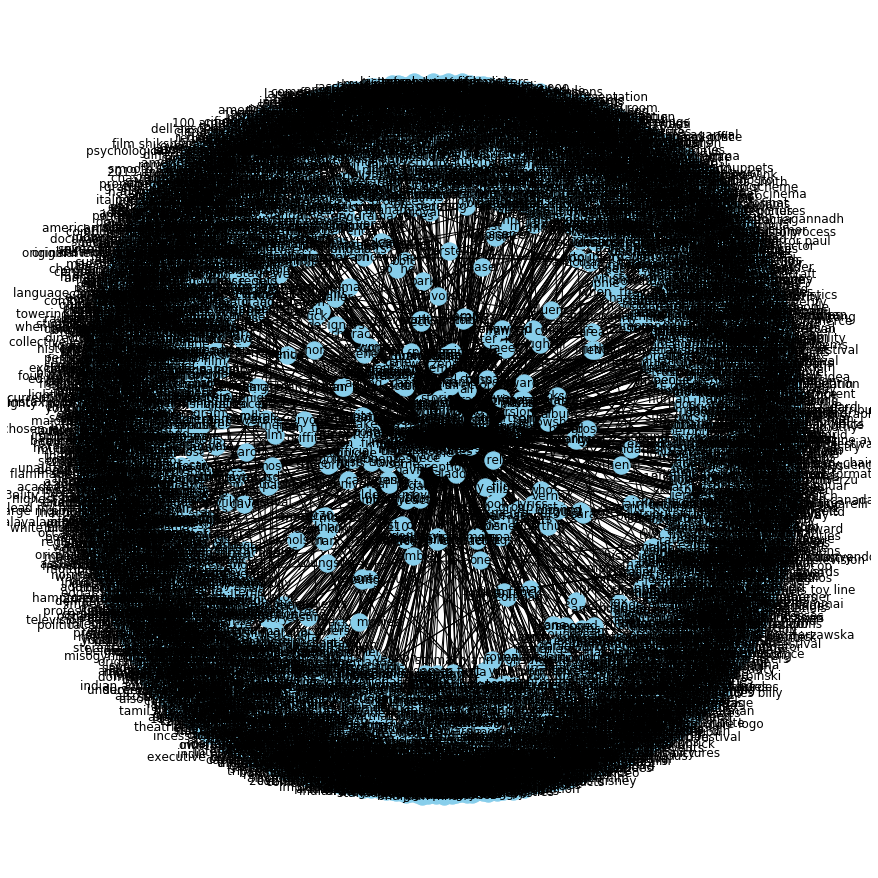

In [7]:
source = [i[0] for i in entity_pairs] #주어 추출
target = [i[1] for i in entity_pairs] #목적어 추출

kg_df = pd.DataFrame({
    'source' : source,
    'target' : target,
    'edge' : relations
})

#방향 그래프 생성
import matplotlib.pyplot as plt
G = nx.from_pandas_edgelist(kg_df, 'source', 'target', edge_attr = True,
                           create_using = nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = 
       plt.cm.Blues, pos = pos)
plt.show()

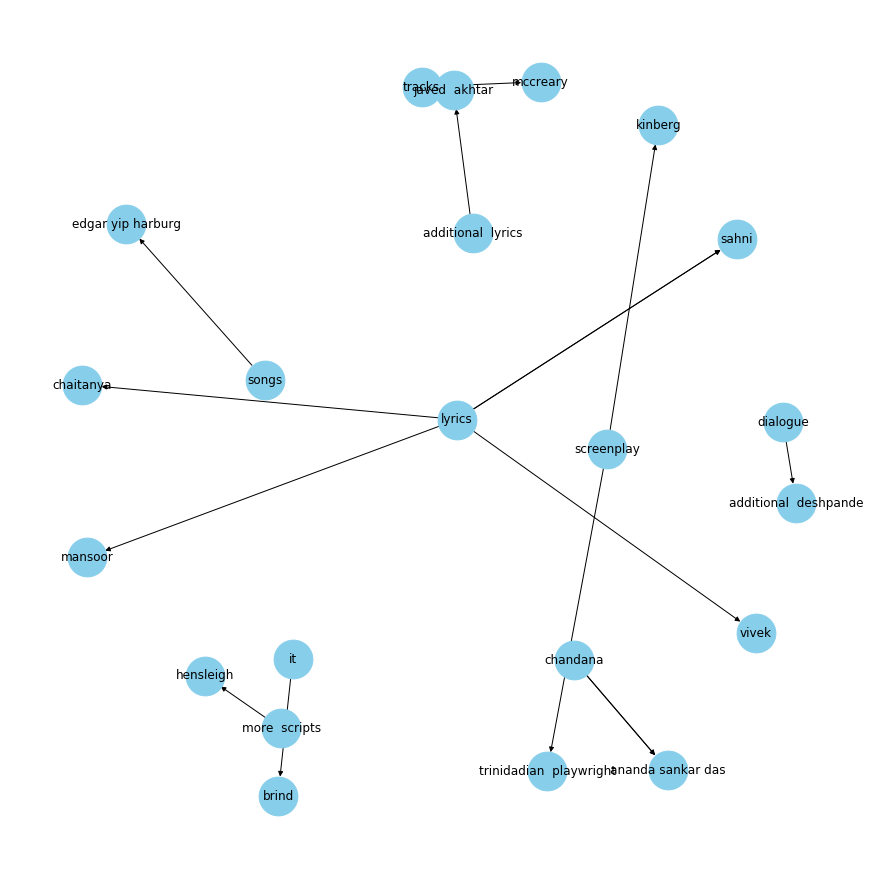

In [8]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge'] == "written by"], 'source', 'target', edge_attr = True,
                           create_using = nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels = True, node_color = 'skyblue', node_size = 1500, edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

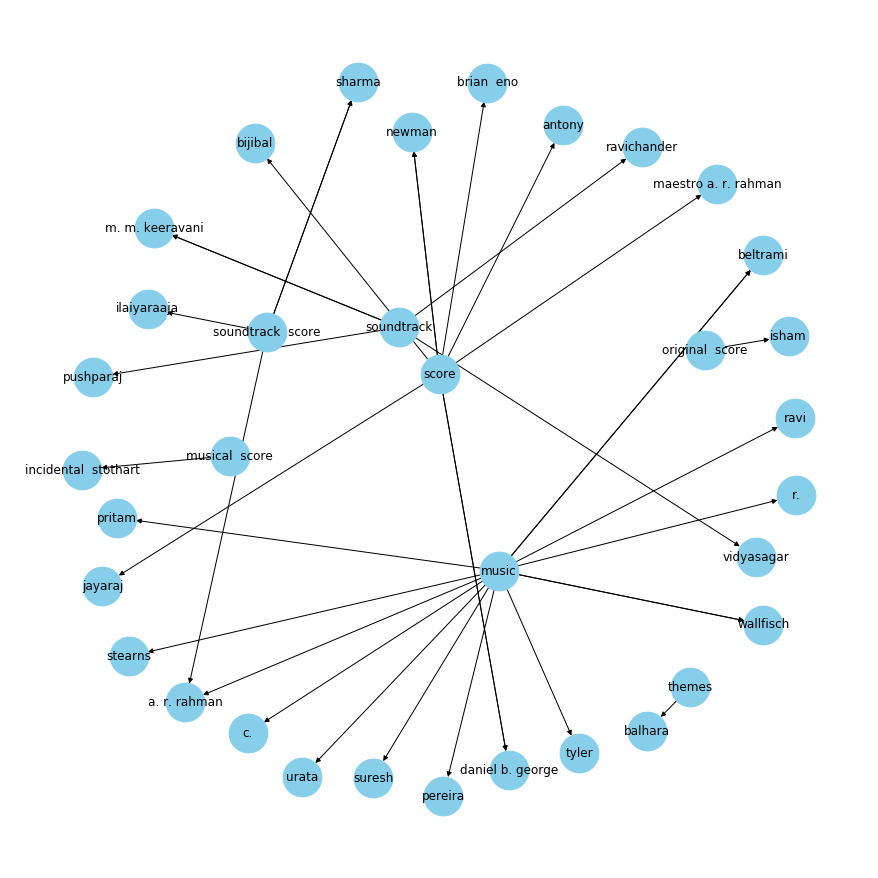

In [9]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge'] == "composed by"], 'source', 'target', edge_attr = True,
                           create_using = nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels = True, node_color = 'skyblue', node_size = 1500, edge_cmap = plt.cm.Blues, pos = pos)
plt.show()